# <span style='font-family:"Times New Roman"'> <span styel=''> **METRICS EXPLORATION**

## <span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
*March 2020*

**Goal:** In this notebook, we gather all the visualizations of the cohort based on the metrics for the 6 subgroups we defined in *group_exploration.ipynb*. We create different function to plot scatters, densities, barplots, pie plots to compare different metrics (Cancer Type, Variant Classification, Mutation/Gene Count, VAF1/VAF2, CCF1/CCF2, Purity, Vaf, Ccf, max_tp53_vaf, max_tp53,ccf, tp53_spots)

The Notebook is divided in 3 parts:
 
* **1. Count Plots**
* **2. Density Plots**
* **3. Scatter Plots**



**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

---

In [196]:
%run -i '../../utils/setup_environment.ipy'
from utils.analysis_tools import *

import warnings, math

warnings.filterwarnings('ignore')
import ptitprince as pt
import IPython.display
from itertools import cycle, islice
from lifelines import KaplanMeierFitter

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

---
# 1. Count Plots

In this part, we define functions to visualize summaries for the following metrics:
* Cancer Type
* Variant Classification
* Mutation/Gene Count
* Tp53 Spots

In [2]:
master = pd.read_pickle(data_path + 'merged_data/master_file.pkl')
subgroups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '0_HETLOSS']
mut_subgroups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH']

master.head()

Sample_Id           Tumor_Id Patient_Id  \
0  P-0034223-T01-IM6_P-0034223-N01-IM6  P-0034223-T01-IM6  P-0034223   
1  P-0009819-T01-IM5_P-0009819-N01-IM5  P-0009819-T01-IM5  P-0009819   
2  P-0025956-T01-IM6_P-0025956-N01-IM6  P-0025956-T01-IM6  P-0025956   
3  P-0027408-T01-IM6_P-0027408-N01-IM6  P-0027408-T01-IM6  P-0027408   
4  P-0006554-T01-IM5_P-0006554-N01-IM5  P-0006554-T01-IM5  P-0006554   

                  Cancer_Type Sample_Type    purity    ploidy  \
0               Breast Cancer  Metastasis  0.941111  2.241830   
1             Prostate Cancer     Primary  0.275237  2.681075   
2  Non-Small Cell Lung Cancer     Primary  0.185874  3.496971   
3  Non-Small Cell Lung Cancer  Metastasis  0.308886  1.811066   
4                      Glioma     Primary  0.715208  1.910719   

   samples_per_patient Overall Survival Status  Overall Survival (Months)  \
0                  1.0                  LIVING                        NaN   
1                  1.0                  LIVING                     23.441   
2                  1.0                DECEASED                      3.584   
3                  1.0                  LIVING                     22.586   
4                  1.0                  LIVING                     26.170   

   MSI Score                               key_1               vc_1  ccf_1  \
0       0.55                                None               None    NaN   
1       0.00                                None               None    NaN   
2       0.00                                None               None    NaN   
3       0.27  P-0027408-T01-IM6_17_7578409_CT_TC  Missense_Mutation  0.925   
4       1.30                                None               None    NaN   

      vaf_1      HGVSp_1 spot_1 key_2  vc_2  ccf_2  vaf_2 HGVSp_2 spot_2  \
0       NaN         None   None  None  None    NaN    NaN    None   None   
1       NaN         None   None  None  None    NaN    NaN    None   None   
2       NaN         None   None  None  None    NaN    NaN    None   None   
3  0.168901  p.Arg174Glu    174  None  None    NaN    NaN    None   None   
4       NaN         None   None  None  None    NaN    NaN    None   None   

  key_3  vc_3  ccf_3  vaf_3 HGVSp_3 spot_3 key_4  vc_4  ccf_4  vaf_4 HGVSp_4  \
0  None  None    NaN    NaN    None   None  None  None    NaN    NaN    None   
1  None  None    NaN    NaN    None   None  None  None    NaN    NaN    None   
2  None  None    NaN    NaN    None   None  None  None    NaN    NaN    None   
3  None  None    NaN    NaN    None   None  None  None    NaN    NaN    None   
4  None  None    NaN    NaN    None   None  None  None    NaN    NaN    None   

  spot_4 key_5  vc_5  ccf_5  vaf_5 HGVSp_5 spot_5  tp53_count  tcn  mcn  lcn  \
0   None  None  None    NaN    NaN    None   None           0  2.0  1.0  1.0   
1   None  None  None    NaN    NaN    None   None           0  1.0  1.0  0.0   
2   None  None  None    NaN    NaN    None   None           0  NaN  NaN  NaN   
3   None  None  None    NaN    NaN    None   None           1  1.0  1.0  0.0   
4   None  None  None    NaN    NaN    None   None           0  2.0  NaN  NaN   

   seg_length       cn_state        cf  wgd  mutation_count  gene_count  \
0  80668592.0        DIPLOID  1.000000 -1.0               6         6.0   
1  80668309.0        HETLOSS  0.154578 -1.0               3         3.0   
2         NaN            NaN       NaN  NaN               6         6.0   
3  25260272.0        HETLOSS  0.315621 -1.0              21        19.0   
4   7465132.0  INDETERMINATE       NaN  NaN              47        39.0   

    max_vaf  exp_nb_1  exp_nb_2  exp_nb_3  exp_nb_4  exp_nb_5   cn_group  \
0  0.901899       NaN       NaN       NaN       NaN       NaN  WILD_TYPE   
1  0.148014       NaN       NaN       NaN       NaN       NaN       LOSS   
2  0.200000       NaN       NaN       NaN       NaN       NaN       None   
3  0.192475  0.924711       NaN       NaN       NaN       NaN       LOSS   
4  0.706897       NaN  

In [182]:
sns.set_style("whitegrid", {'grid.color': '0.98'})
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
def def_fig_set(figsize=(15,12), number = 6):
    fig=plt.figure(figsize=figsize)
    if number == 6:
        ax1 = plt.subplot2grid(shape=(3,7), loc=(0,0), colspan=3)
        ax2 = plt.subplot2grid((3,7), (0,4), colspan=3)
        ax3 = plt.subplot2grid((3,7), (1,0), colspan=3)
        ax4 = plt.subplot2grid((3,7), (1,4), colspan=3)
        ax5 = plt.subplot2grid((3,7), (2,0), colspan=3)
        ax6 = plt.subplot2grid((3,7), (2,4), colspan=3)
    
    if number == 5:
        ax1 = plt.subplot2grid(shape=(3,7), loc=(0,0), colspan=3)
        ax2 = plt.subplot2grid((3,7), (0,4), colspan=3)
        ax3 = plt.subplot2grid((3,7), (1,0), colspan=3)
        ax4 = plt.subplot2grid((3,7), (1,4), colspan=3)
        ax5 = plt.subplot2grid((3,7), (2,2), colspan=3)
    
    if number == 4:
        ax1 = plt.subplot2grid(shape=(3,7), loc=(0,0), colspan=3)
        ax2 = plt.subplot2grid((3,7), (0,4), colspan=3)
        ax3 = plt.subplot2grid((3,7), (1,0), colspan=3)
        ax4 = plt.subplot2grid((3,7), (1,4), colspan=3)
    
    annotate_axes(fig)
    
    return fig

def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])


my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
my_colors_set = []
# We define 10 colors from each colors
for color in my_colors:
    to_append = []
    for i in range(1,11):
        to_append.append(lighten_color(color, amount=0.1*i))
    my_colors_set.append(to_append)
#my_colors_set

### Cancer Type

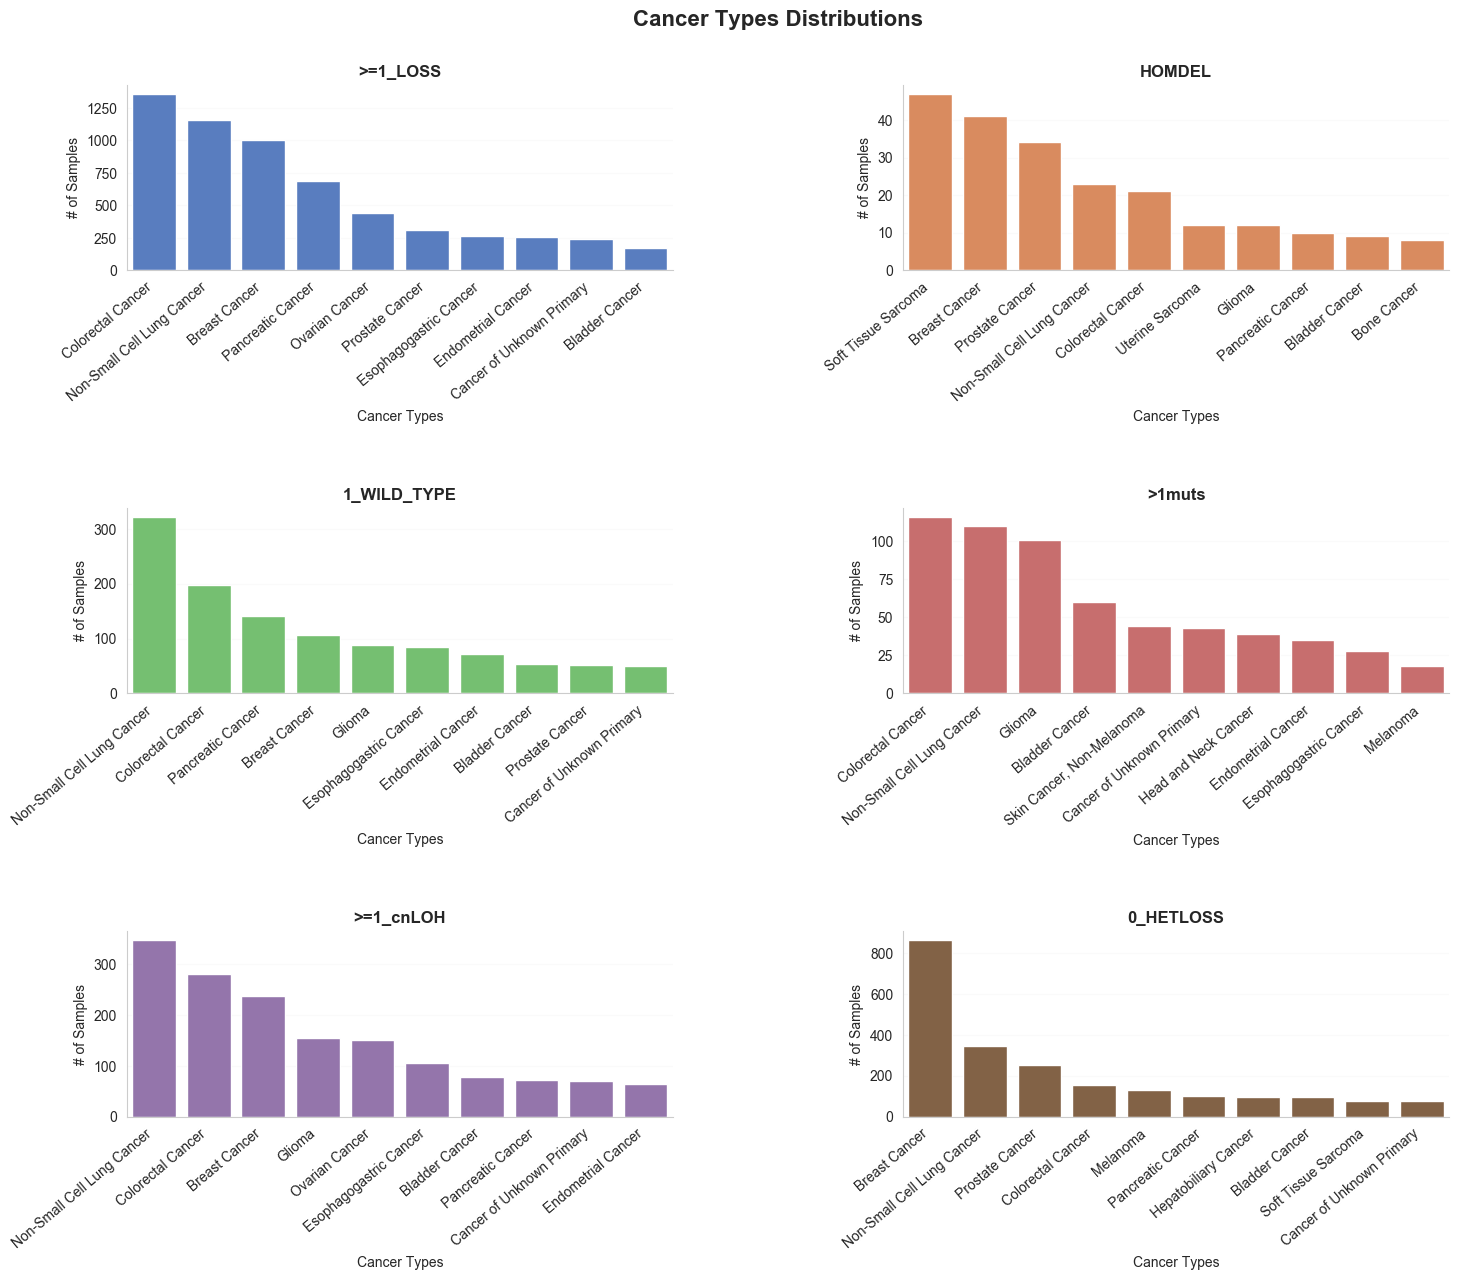

In [4]:
fig = def_fig_set()
fig.suptitle('Cancer Types Distributions', fontsize=16, weight='bold', y=1)
my_colors = list(islice(cycle(list(sns.color_palette("muted"))), None, 6))
fig.tight_layout(pad=5, w_pad=0.5, h_pad=15)

for ax, subgroup,i in zip(fig.axes, subgroups, range(len(subgroups))):
    data = master[master['mut_cn_group'] == subgroup]
    data_cancer = pd.DataFrame(get_groupby(data, 'Cancer_Type', 'count')).sort_values(by=['count'], ascending=False).head(10)
    sns.barplot(y='count', x=data_cancer.index, data=data_cancer, ax=ax, color=my_colors[i])
    ax.set_xlabel('Cancer Types')
    ax.set_ylabel('# of Samples')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(subgroup, weight = 'bold')

### Variant Classification

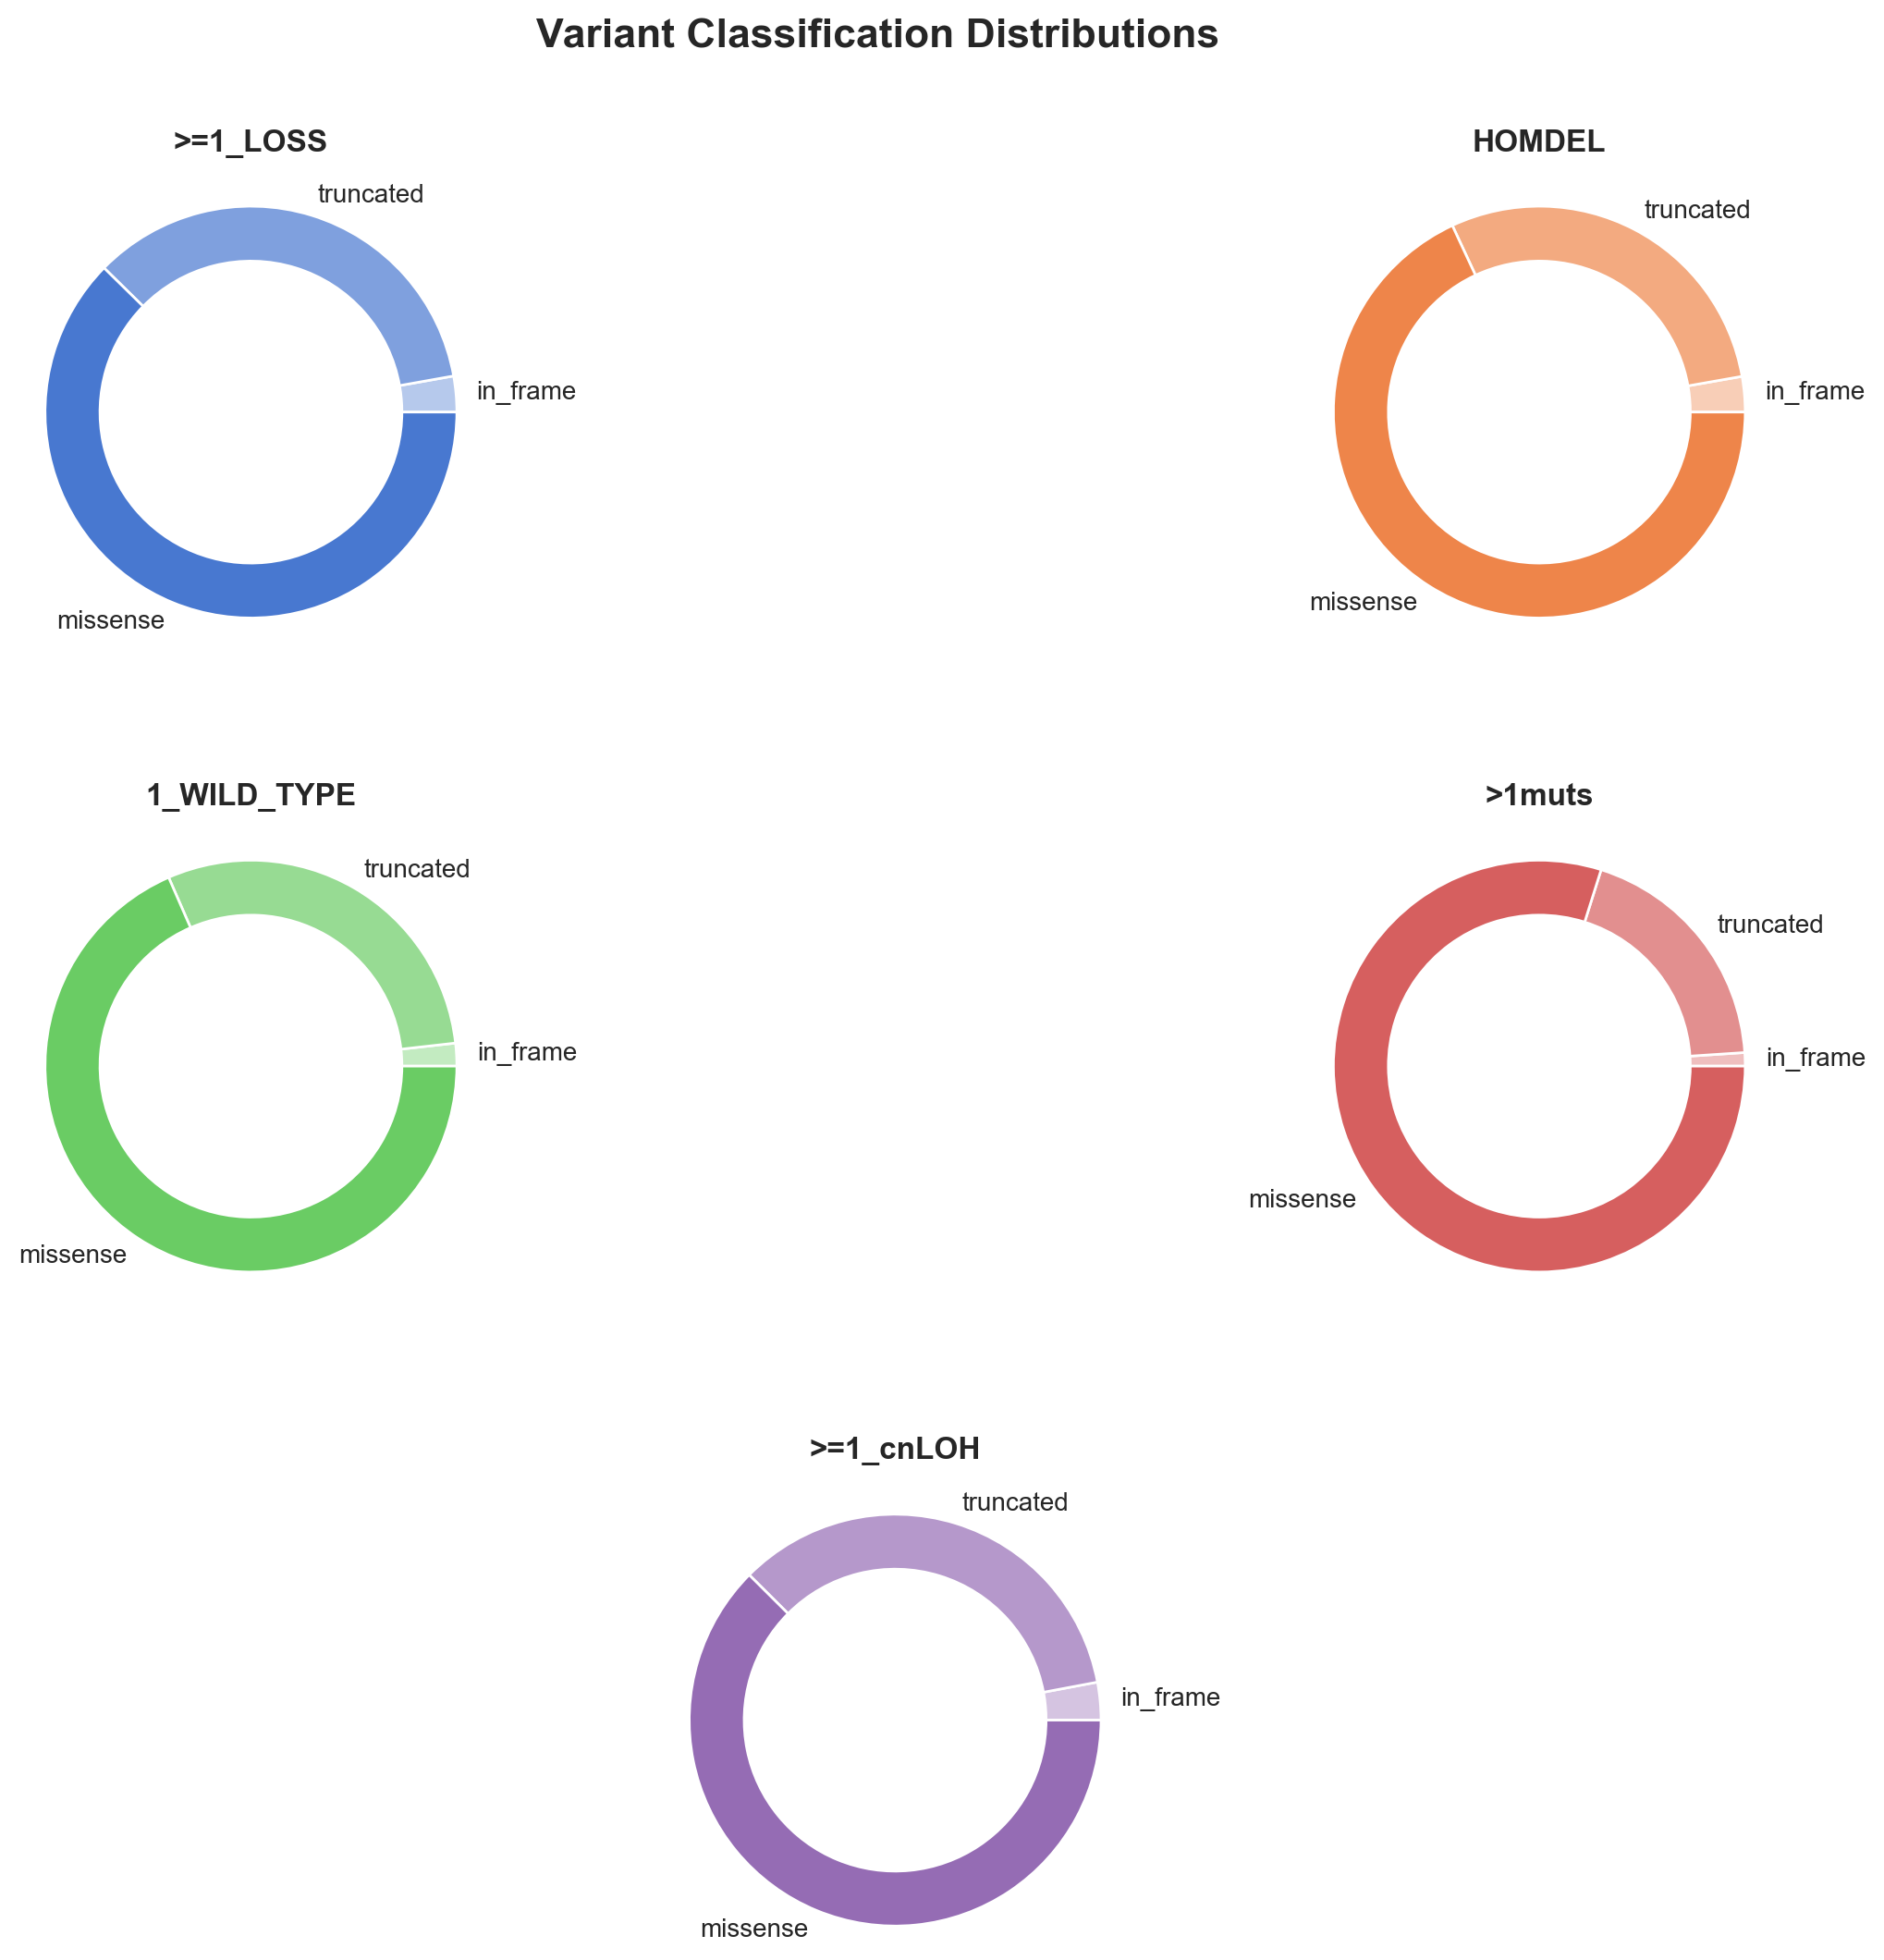

In [7]:
fig = def_fig_set(number = 5)
fig.tight_layout(pad=10, w_pad=0.5, h_pad=10)
fig.suptitle('Variant Classification Distributions', fontsize=16, weight='bold')

for ax, subgroup,i in zip(fig.axes, mut_subgroups, range(len(subgroups))):
    data = master[master['mut_cn_group'] == subgroup]
    data_1 = get_groupby(data,'vc_group_1', 'count'); data_2 = get_groupby(data,'vc_group_2', 'count'); data_3 = get_groupby(data,'vc_group_3', 'count') ; data_4 = get_groupby(data,'vc_group_4', 'count') ; data_5 = get_groupby(data,'vc_group_5', 'count') 
    count = (data_1+data_2+data_3+data_4+data_5).fillna(data_1).fillna(data_2).fillna(data_3).fillna(data_4).fillna(data_5).sort_values(by=['count'])
    
    mypie, _ = ax.pie(list(count['count']), radius=1.5,labels=list(count.index), labeldistance=1.1,rotatelabels=False, colors=[my_colors_set[i][3],my_colors_set[i][6],my_colors_set[i][9]])
    plt.setp(mypie, width=0.4, edgecolor='white')
    ax.set_title(subgroup, weight = 'bold', pad=35)

### Mutation/Gene Count

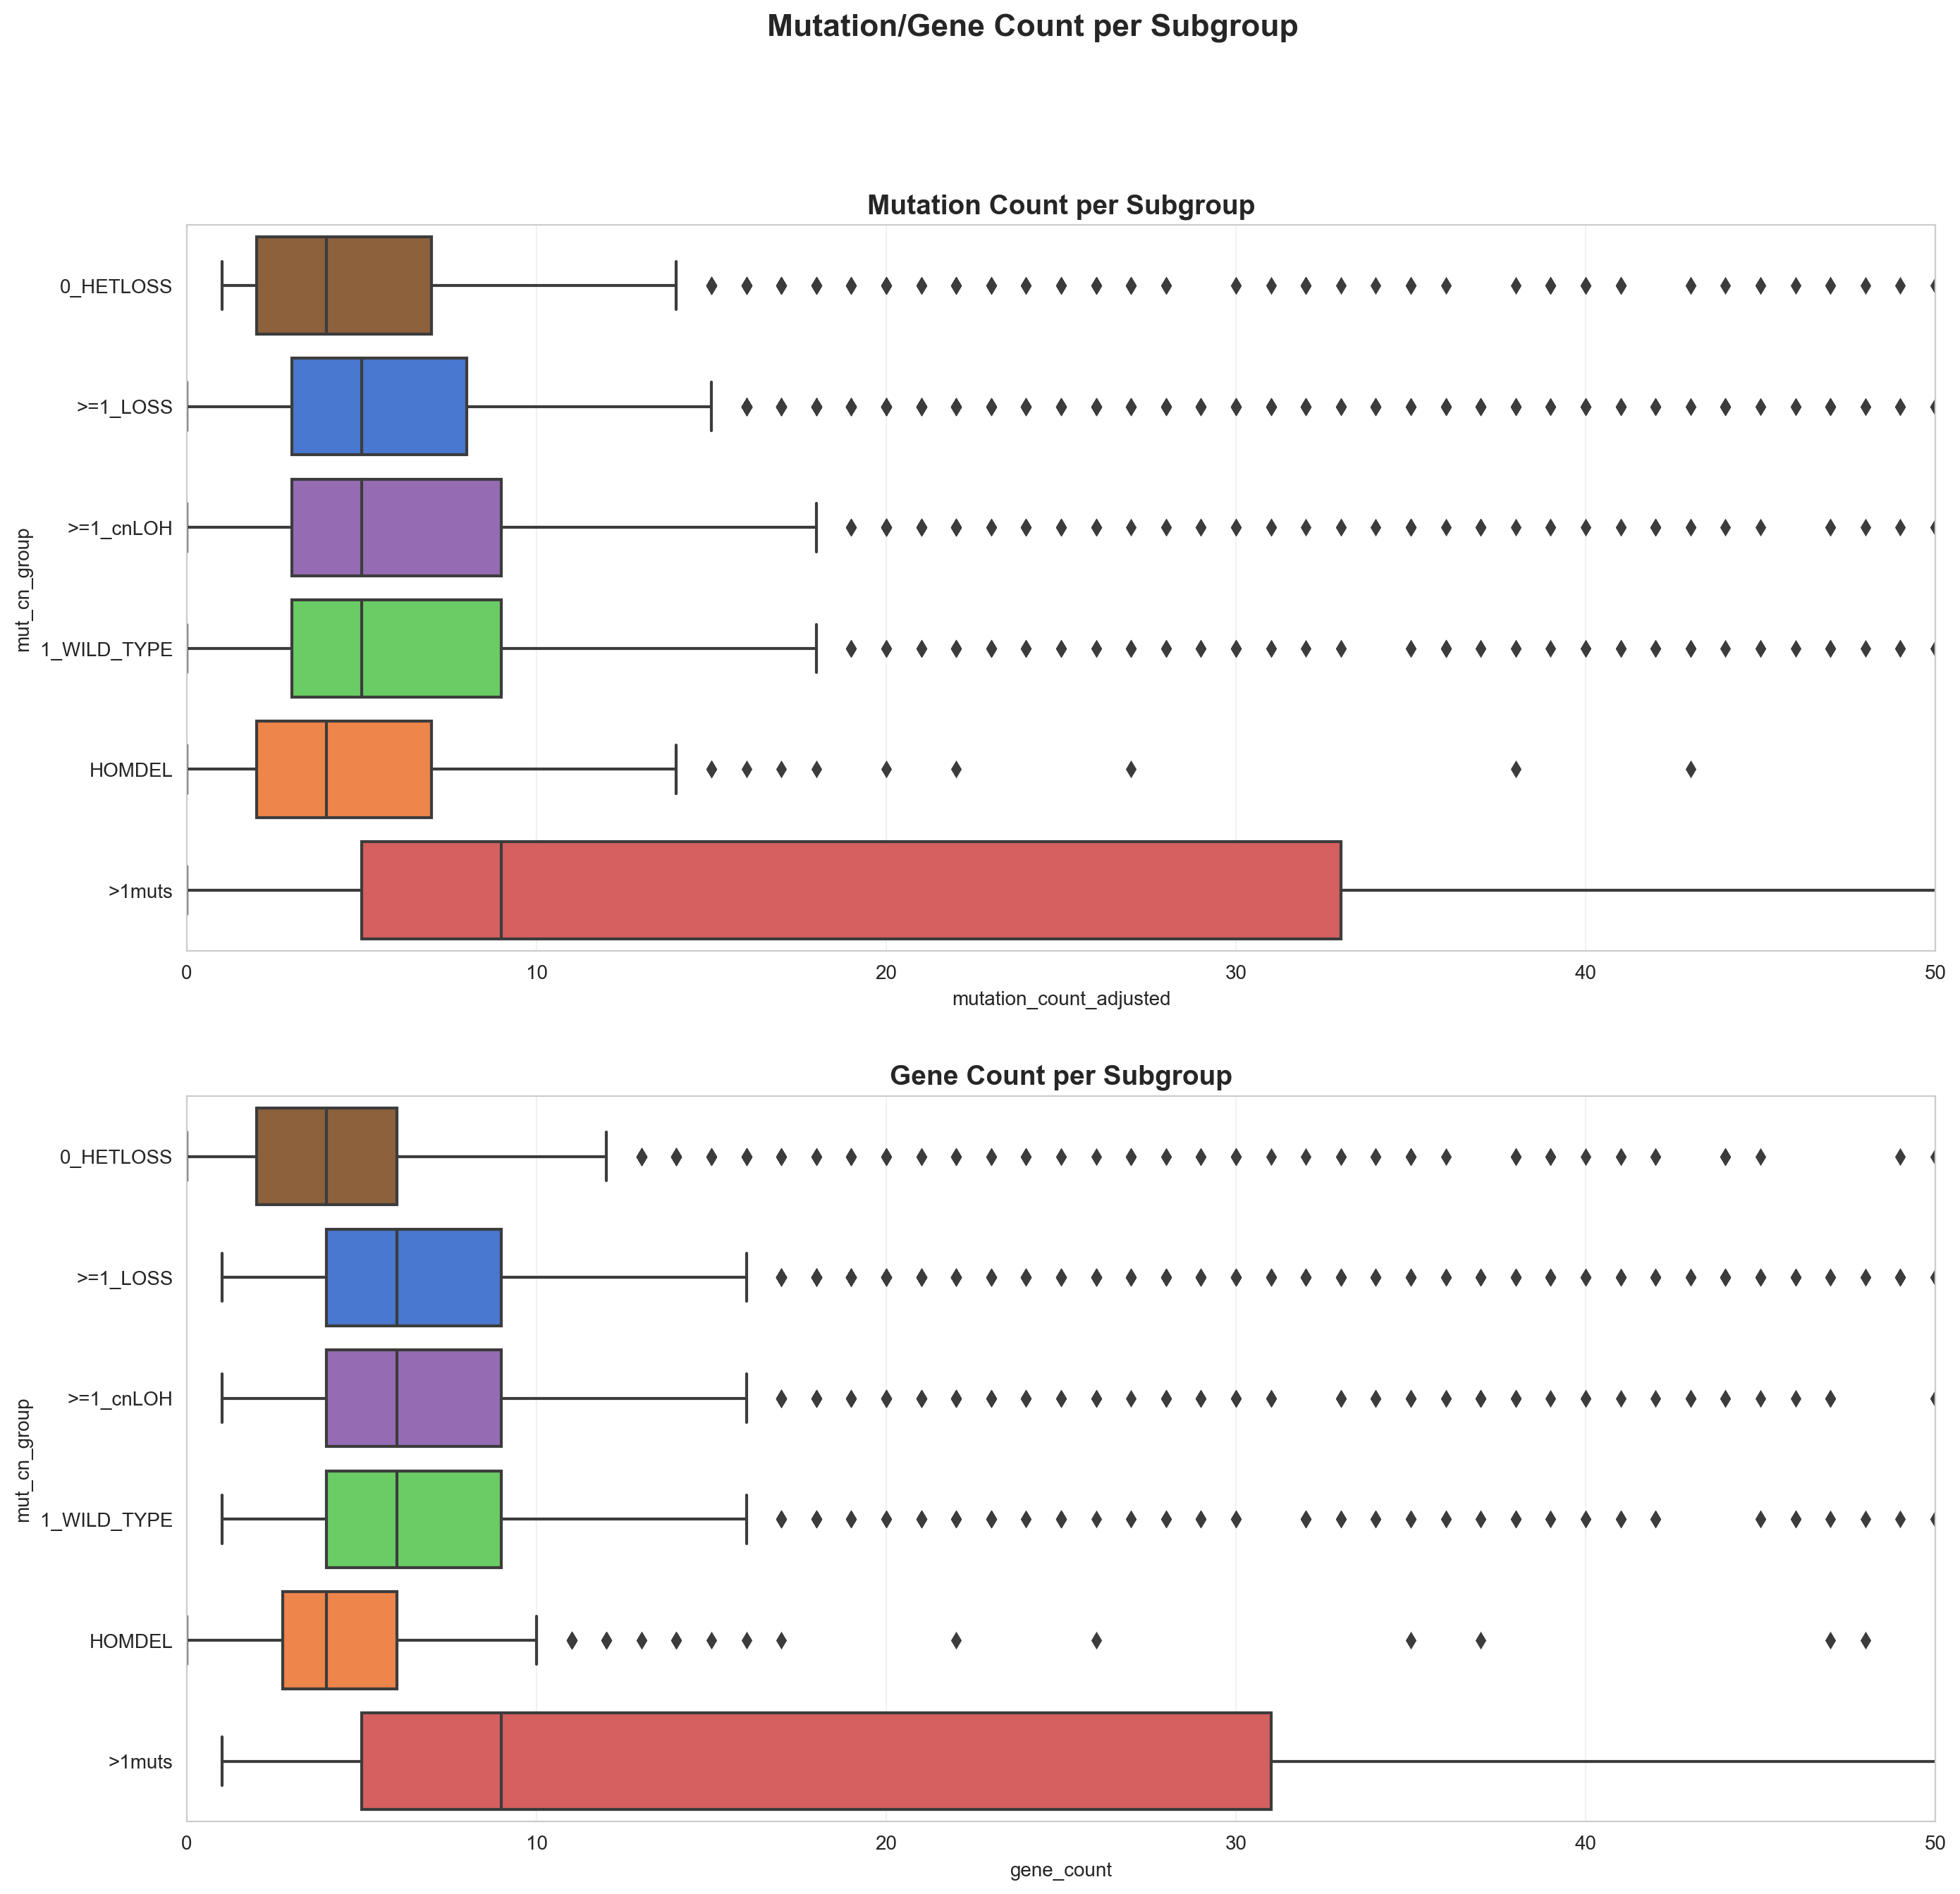

In [8]:
fig=plt.figure(figsize=(16,15))
fig.suptitle('Mutation/Gene Count per Subgroup', fontsize=16, weight='bold')
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0), colspan=1)
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0), colspan=1)
ax1.set_xlim(0, 50)
ax2.set_xlim(0, 50)

data = master[['tp53_count', 'mut_cn_group', 'mutation_count','gene_count']]
data['mutation_count_adjusted'] = data['mutation_count'] - data['tp53_count']

sns.boxplot(y="mut_cn_group", x="mutation_count_adjusted",data=data,ax=ax1, dodge=False, palette=my_colors).set_title('Mutation Count per Subgroup', weight='bold', fontsize=14)
'''sns.swarmplot(y="mut_cn_group", x="mutation_count_adjusted",
              data=data, 
              ax=ax1,
              color='grey',
              alpha=0.75)'''
sns.boxplot(y="mut_cn_group", x="gene_count",data=data,ax=ax2, dodge=False, palette=my_colors).set_title('Gene Count per Subgroup', weight='bold',fontsize=14)
#dx="mutation_count_adjusted"; dy="mut_cn_group"; ort="h"; pal = my_colors; sigma = .2; dhue = "mut_cn_group"; dhue_order=subgroups
#pt.RainCloud(x = dx, y = dy, data = data, palette = pal, bw = sigma, hue=dhue, hue_order=dhue_order,
#width_viol = .6, ax = ax, orient = ort)

my_colors_remixed = [my_colors[5], my_colors[0], my_colors[4], my_colors[2], my_colors[1], my_colors[3]]
for ax in fig.axes:
    for box,i in zip(ax.artists,range(6)):
        box.set_facecolor(my_colors_remixed[i])

### TP53 Spots

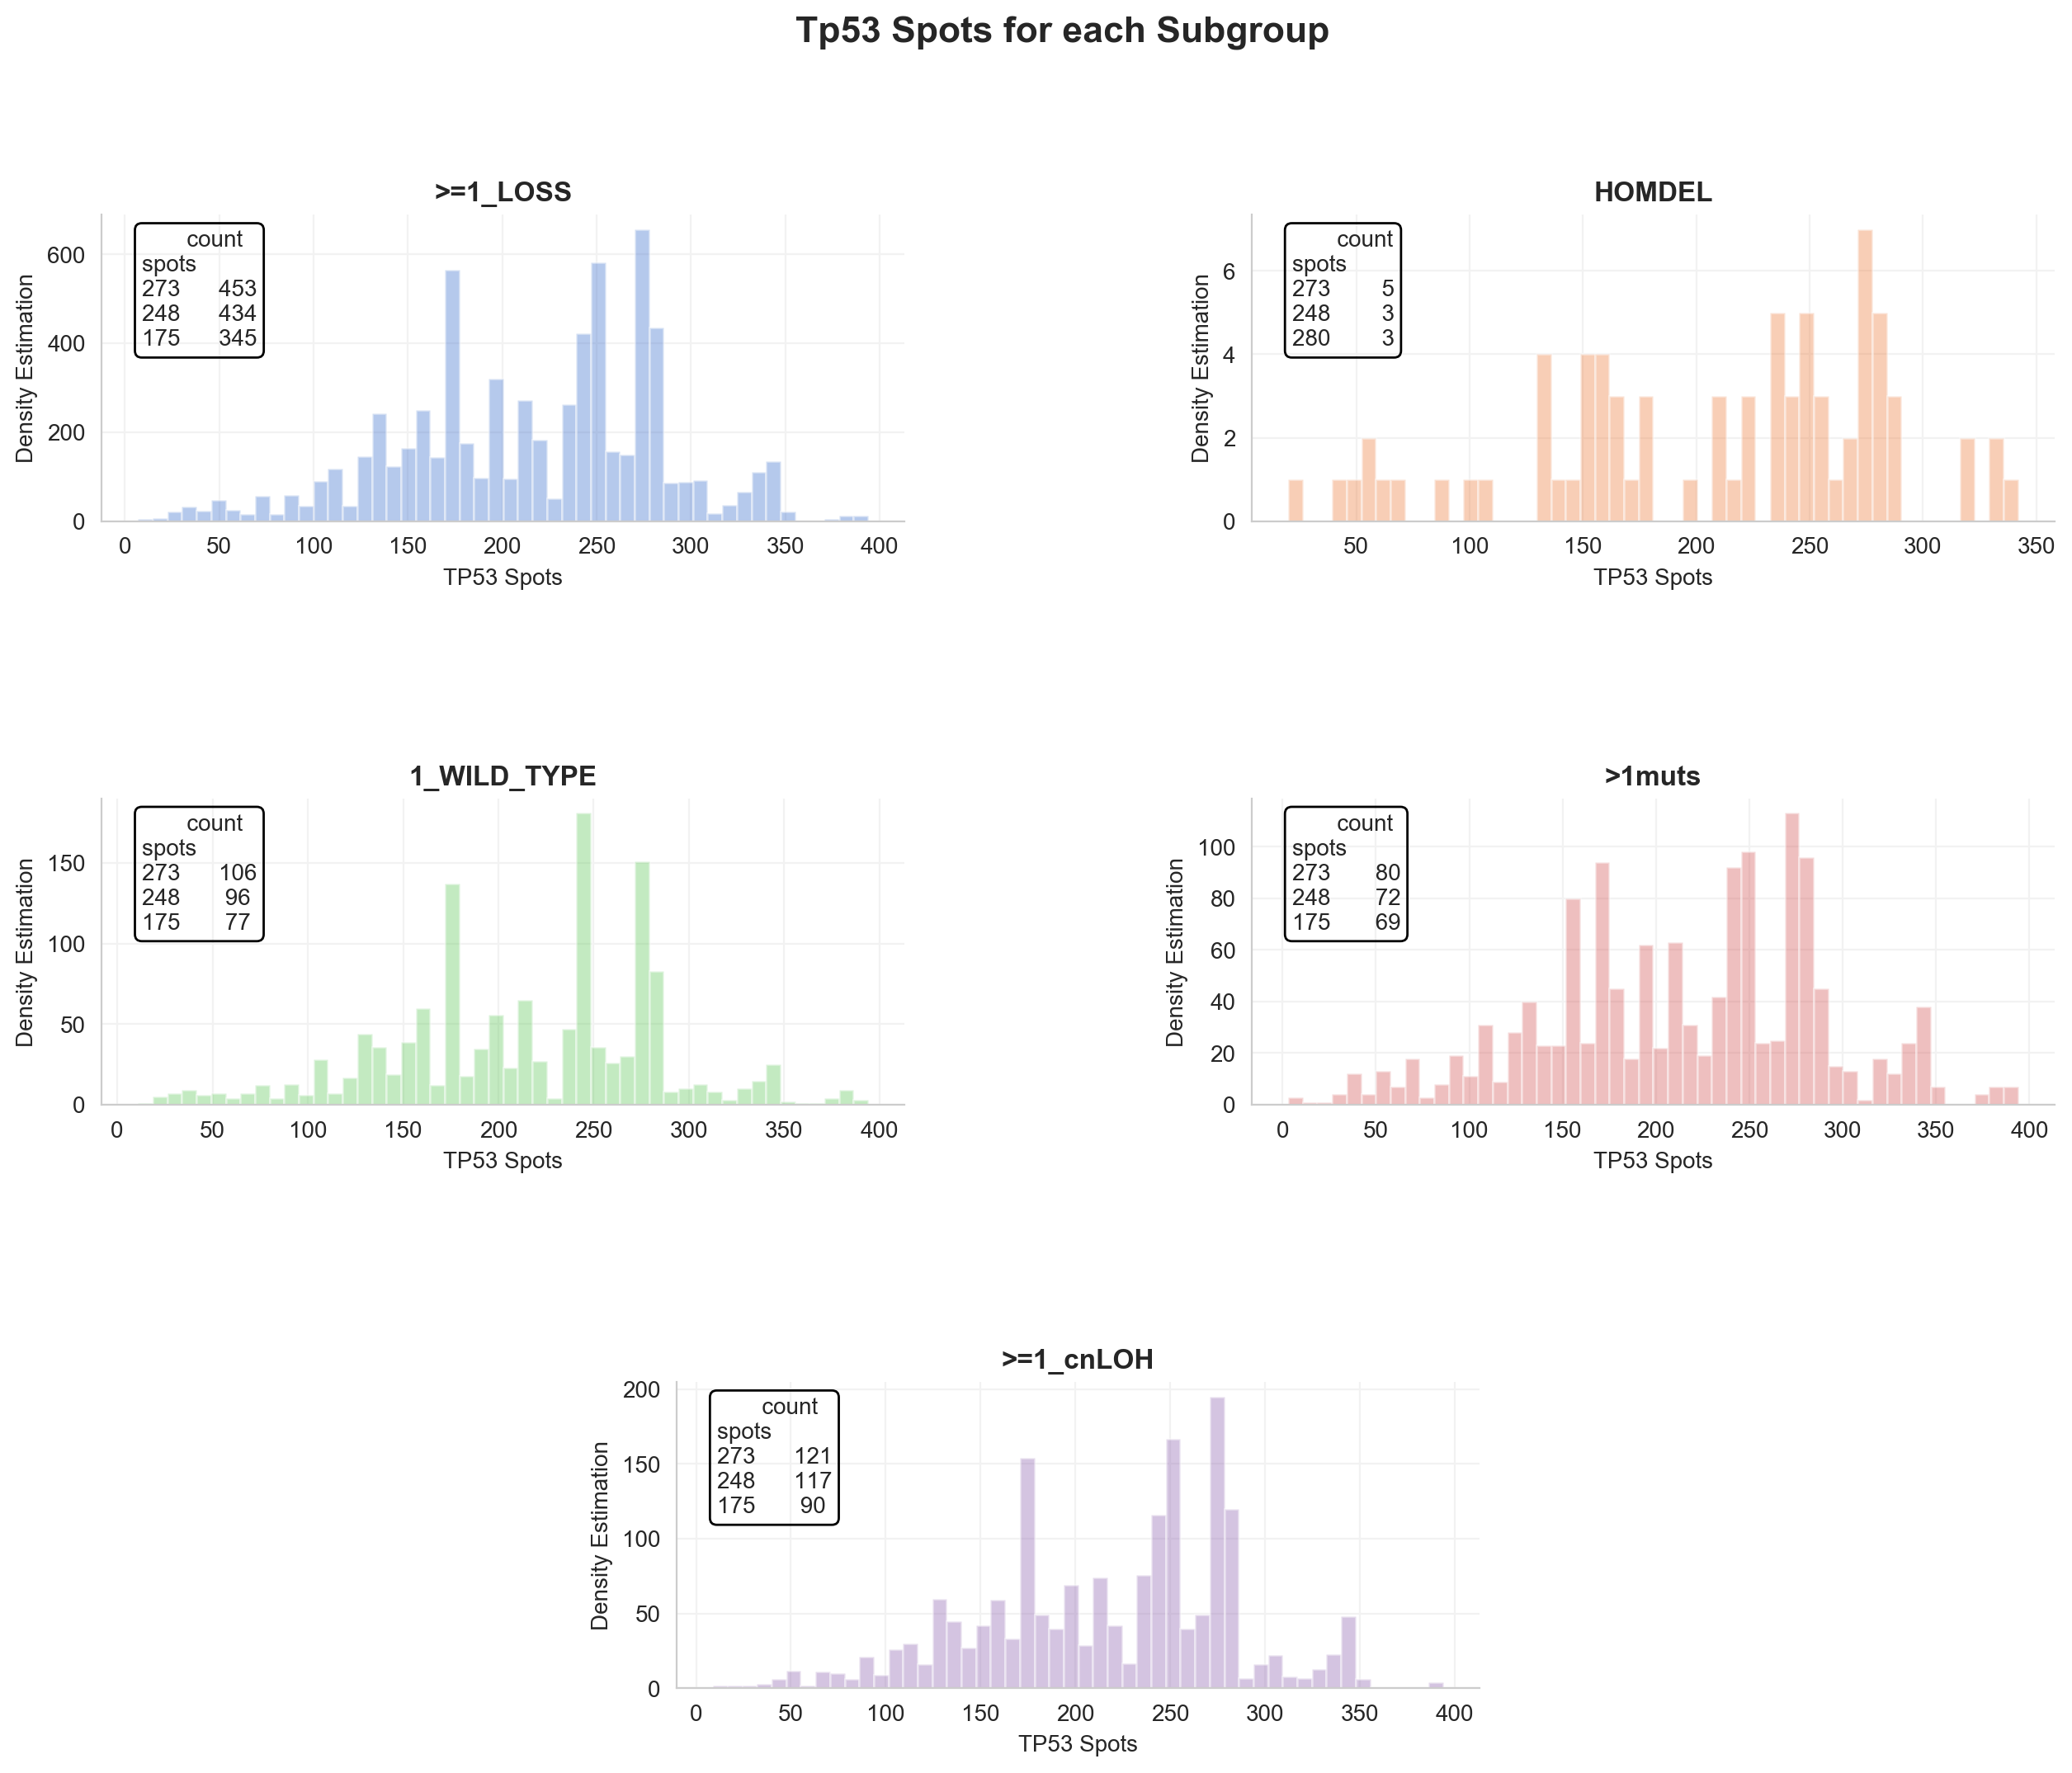

In [10]:
fig = def_fig_set(number = 5)
fig.tight_layout(pad=10, w_pad=0.5, h_pad=10)
fig.suptitle('Tp53 Spots for each Subgroup', fontsize=16, weight='bold')

for ax, subgroup,i in zip(fig.axes, mut_subgroups, range(len(subgroups))):
    data = master[master['mut_cn_group'] == subgroup]
    
    data_spots = list(data['spot_1']) + list(data['spot_2']) + list(data['spot_3']) + list(data['spot_4']) + list(data['spot_5'])
    data_spot_df = pd.DataFrame(data_spots, columns=['spots']).dropna()
    count = pd.DataFrame(data_spot_df.groupby(['spots']).size(), columns=['count']).sort_values(by=['count'], ascending=False)
    count = pd.DataFrame(count, index = count.index.drop('nan')).head(3)
    
    sns.distplot(data_spots, bins=50, kde=False, color=my_colors[i], ax=ax)
    ax.set_xlabel('TP53 Spots')
    ax.set_ylabel('Density Estimation')
    ax.set_title(subgroup, weight = 'bold')
    ax.text(.05, .95, str(count), transform=ax.transAxes, ha="left", va="top", bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

---
# 2. Density Plots

In [90]:
def get_densities(master:pd.DataFrame, metrics:str, fig_title:str, xlabel, ylabel,  number=6, met_prim:str = None):
    # We initialize the figure
    fig = def_fig_set(number = number)
    fig.tight_layout(pad=10, w_pad=0.5, h_pad=10)
    fig.suptitle(fig_title, fontsize=16, weight='bold')
    
    # We differentiate the groups if we have 
    if number==6: groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '0_HETLOSS']
    if number==5: groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH']
        
    for ax, group,i in zip(fig.axes, groups, range(len(groups))):
        data = master[master['mut_cn_group'] == group]
        if met_prim:
            data = data[data['Sample_Type'] == met_prim]
        sns.distplot(data[metrics], hist=False,kde_kws={'clip': (0.0, 1.0), "shade": True}, ax=ax, color=my_colors[i])
        ax.set_xlim([0,1])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        
        # Adding MEan and Median Information
        mean=round(data[metrics].mean(),2) ; median=round(data[metrics].median(),2)
        string = 'Mean: '+ str(mean) +'\nMedian: ' + str(median)
        ax.axvline(mean, color='g', linestyle='-', label='Mean: '+ str(mean))
        ax.axvline(median, color='b', linestyle='-', label='Median: ' + str(median))
        ax.legend()
        
        ax.set_title(group, weight = 'bold')

### Purity

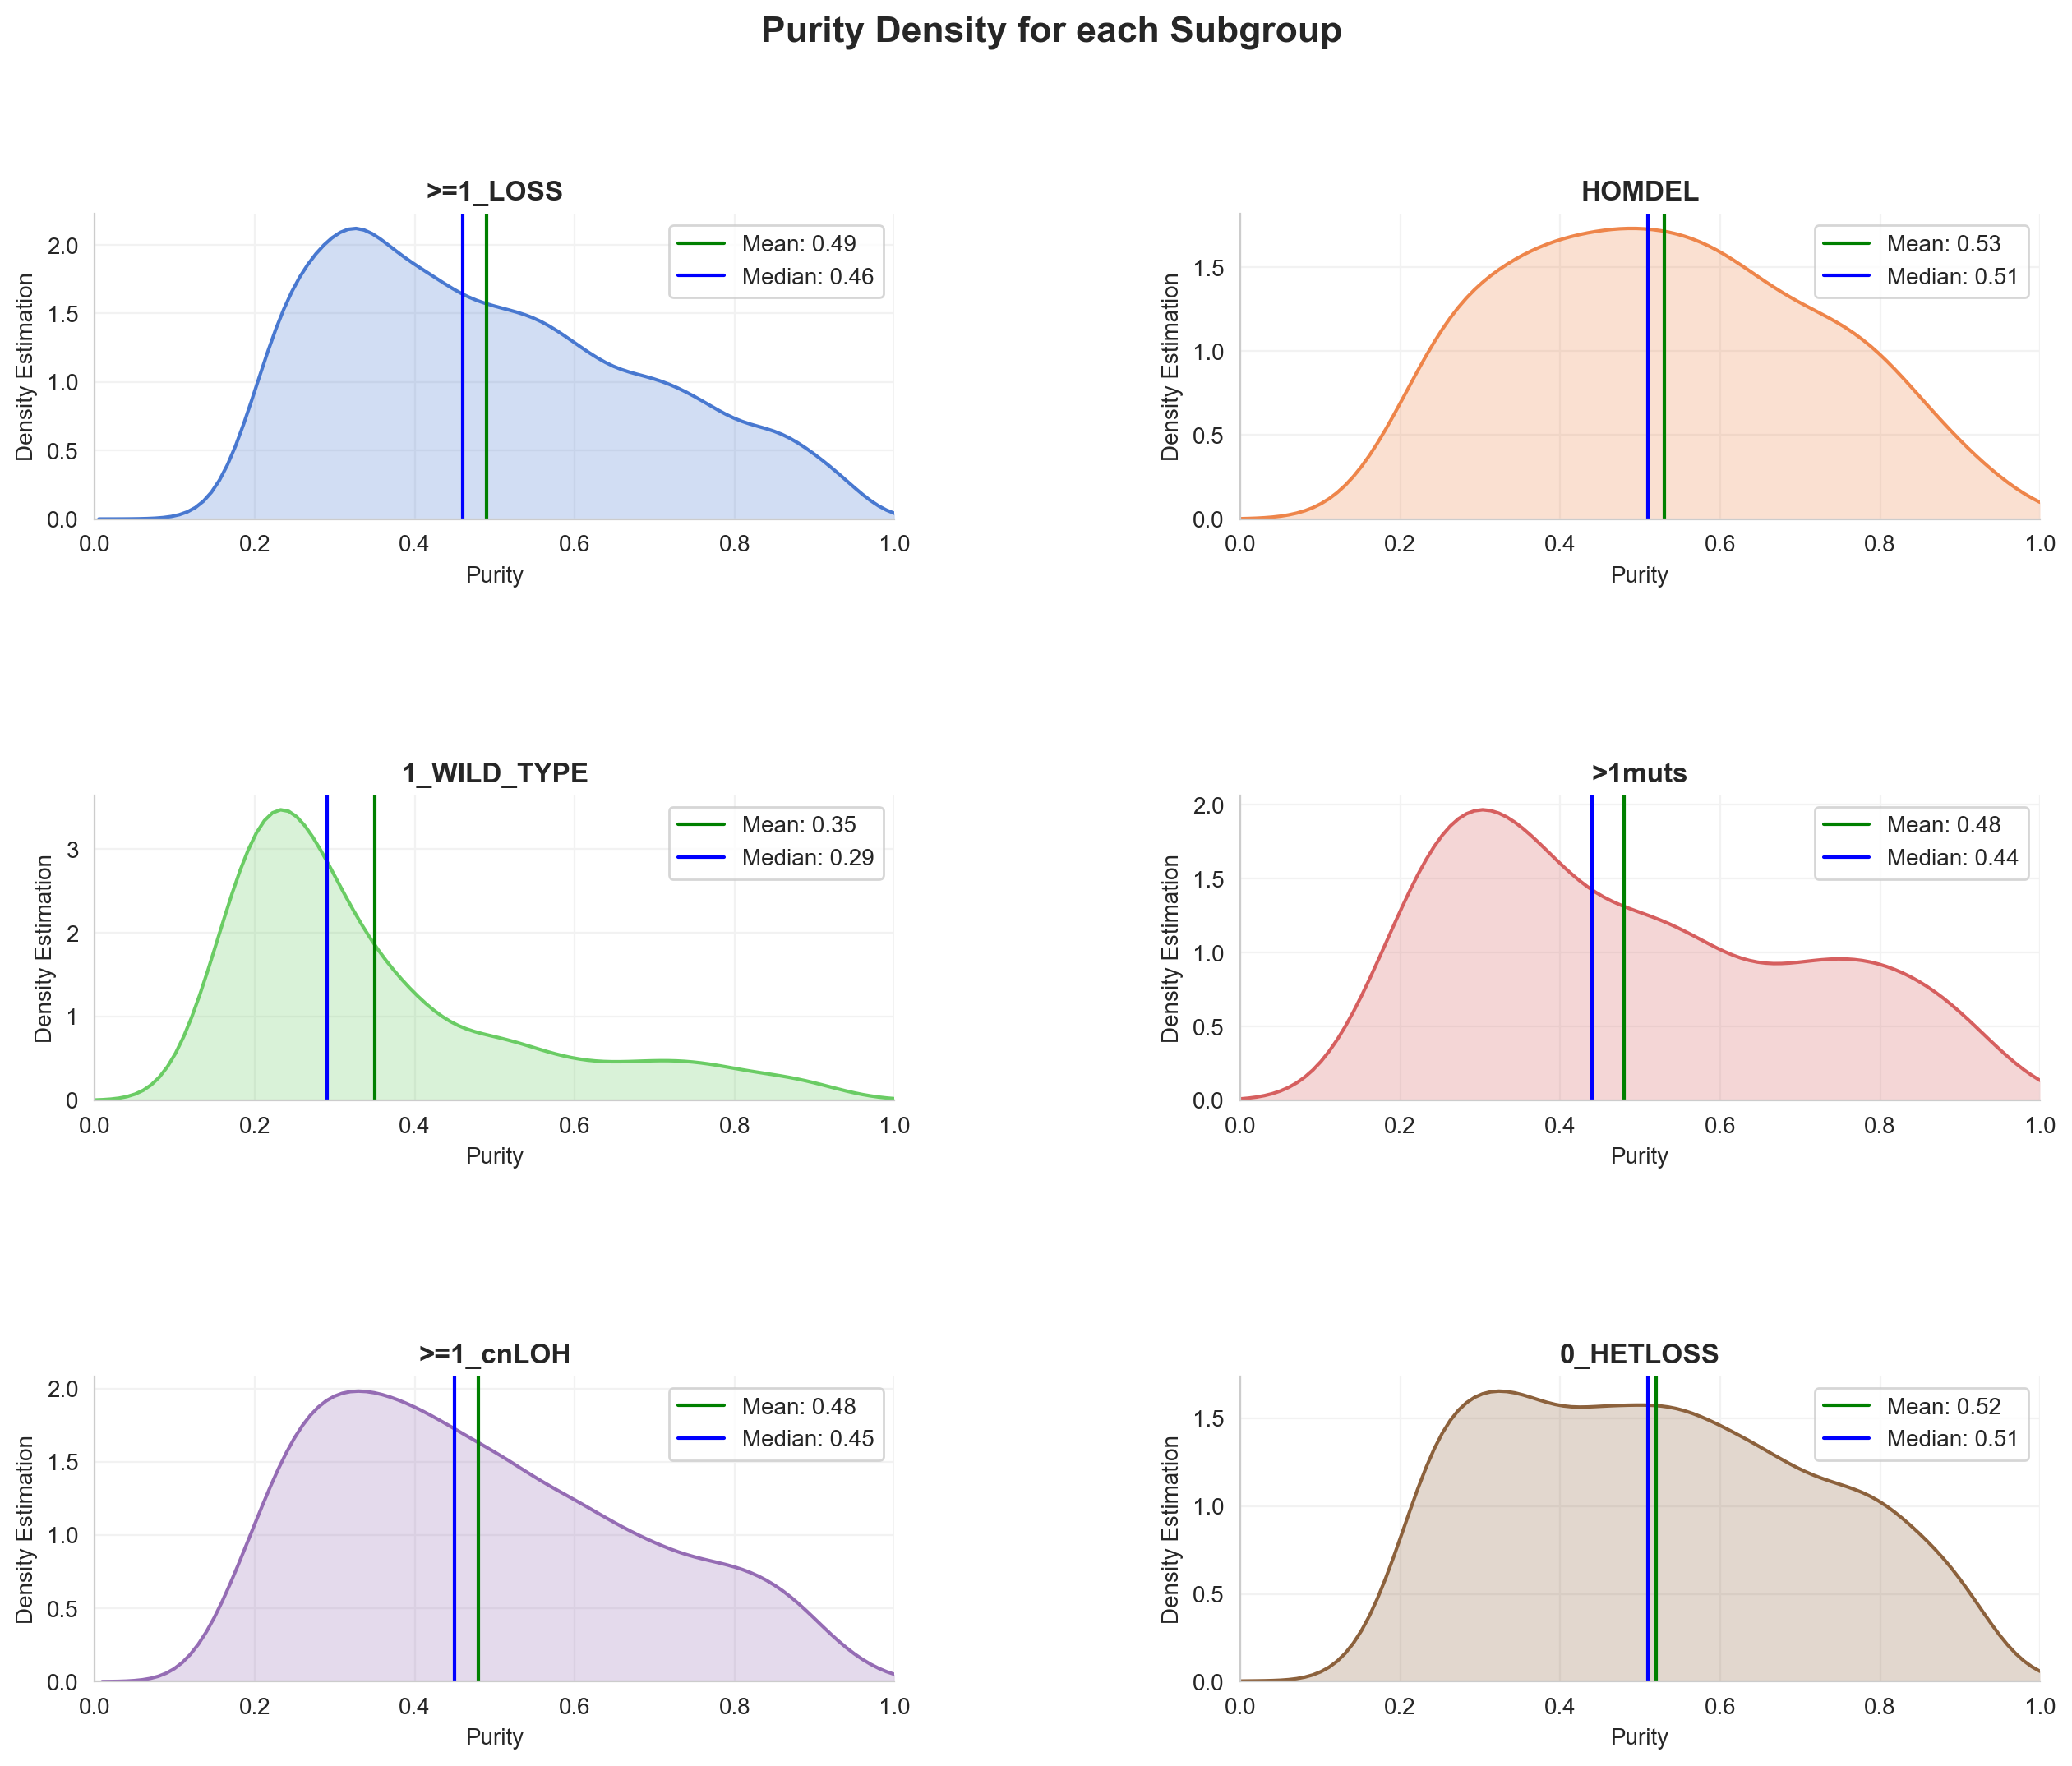

In [91]:
# Purity Comparison for all samples
get_densities(master, 'purity', fig_title='Purity Density for each Subgroup', xlabel='Purity', ylabel='Density Estimation',  number=6)

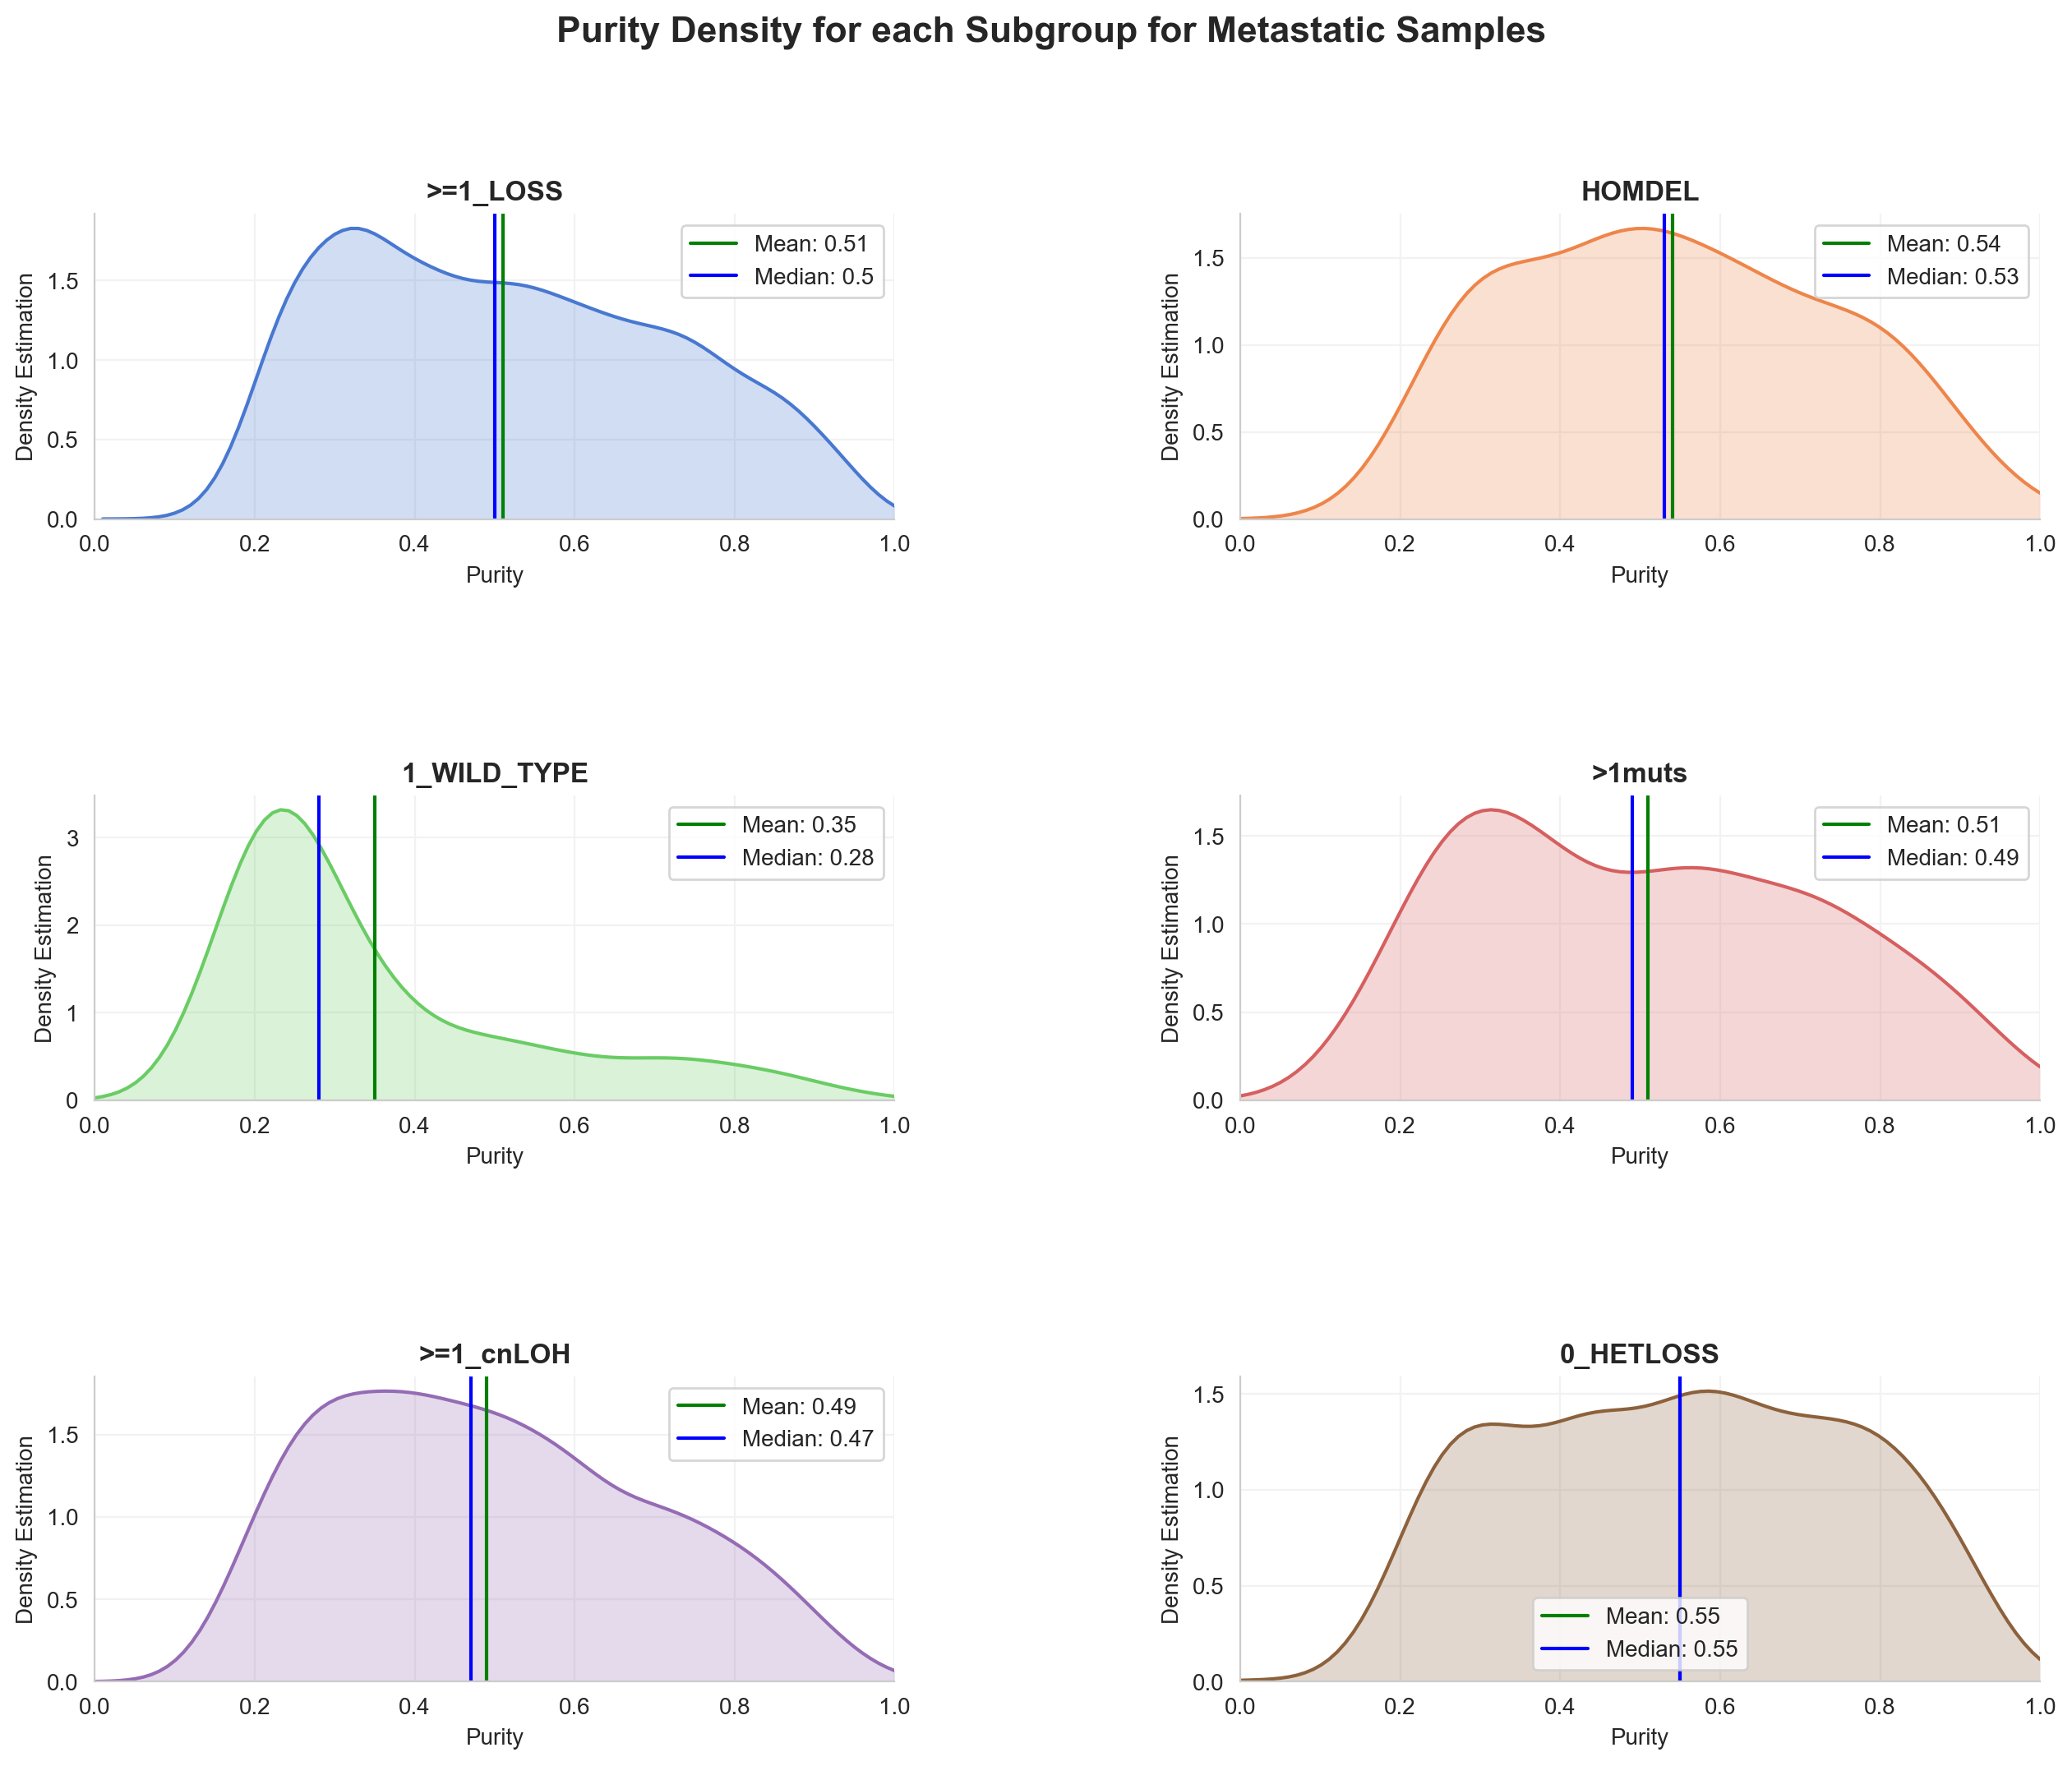

In [92]:
# Purity Comparison for Metastatic Samples
get_densities(master, 'purity', fig_title='Purity Density for each Subgroup for Metastatic Samples', xlabel='Purity', ylabel='Density Estimation',  number=6, met_prim='Metastasis')

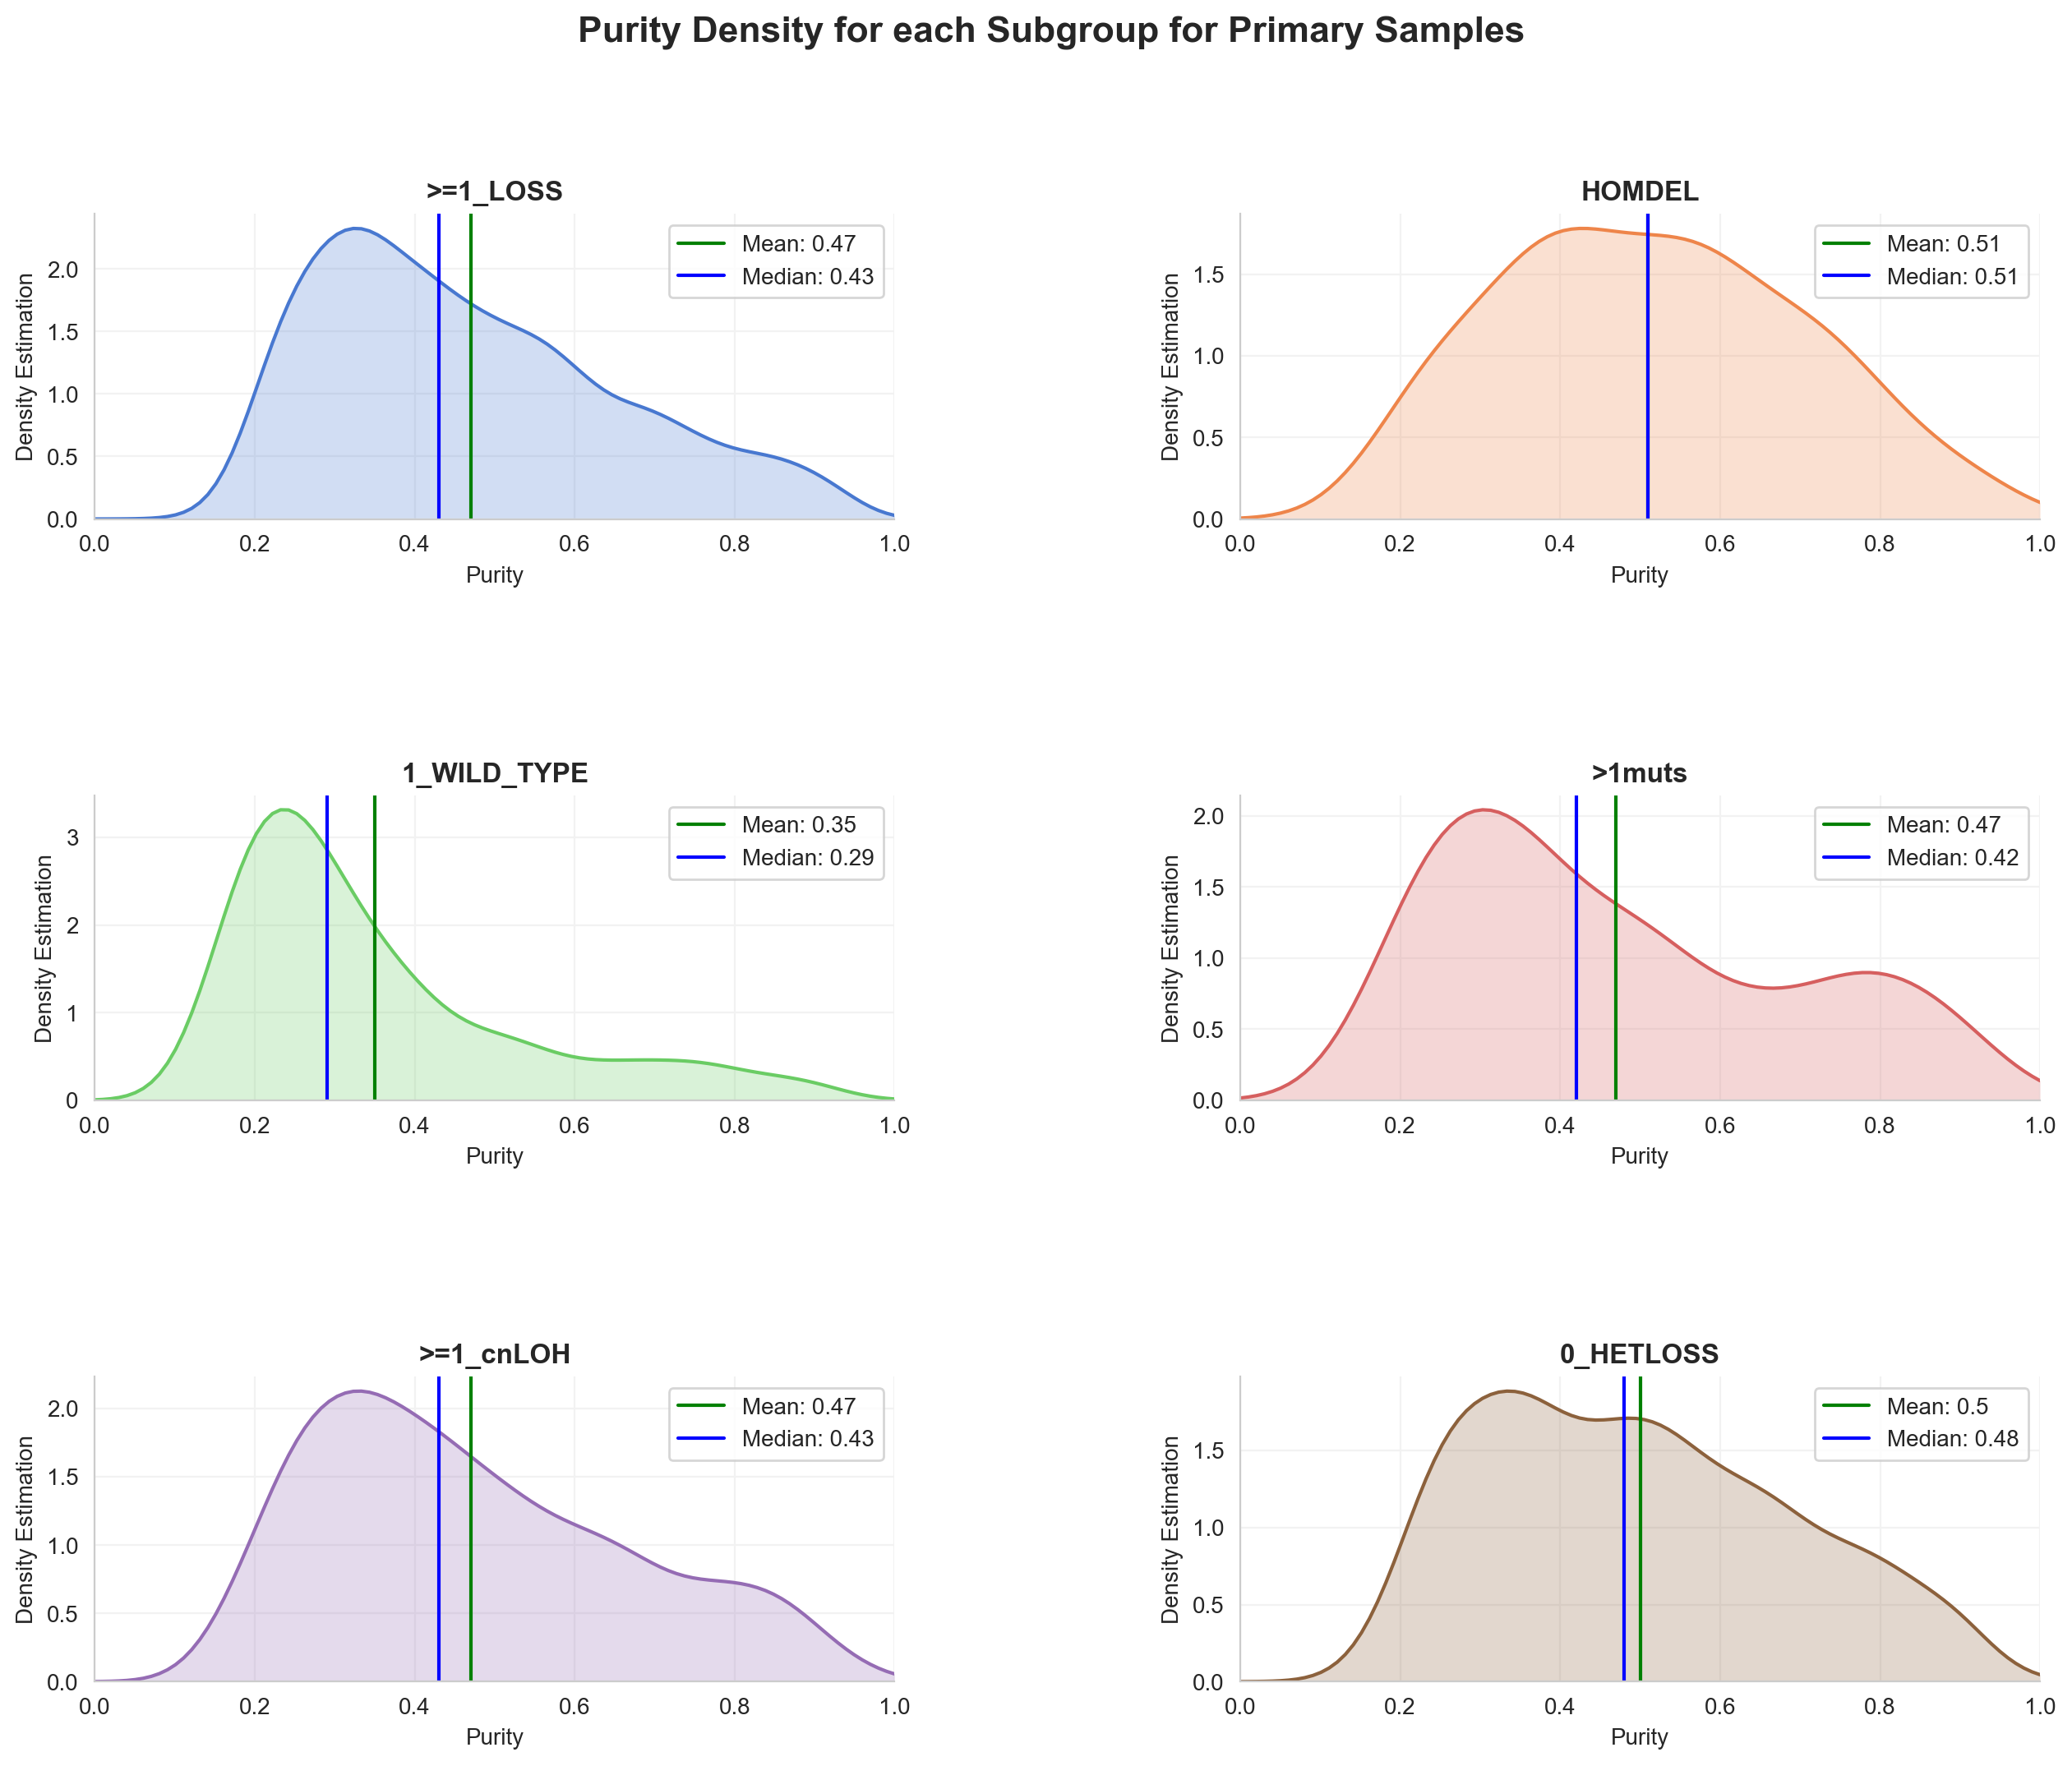

In [93]:
# Purity Comparison for Primary Samples
get_densities(master, 'purity', fig_title='Purity Density for each Subgroup for Primary Samples', xlabel='Purity', ylabel='Density Estimation',  number=6, met_prim='Primary')

### Cancer Cell Fraction

In [102]:
# We need to prepare the data as in the master we have 5 ccf columns 
data_1 = master[['Sample_Type','mut_cn_group', 'ccf_1']] ; data_2 = master[['Sample_Type','mut_cn_group', 'ccf_2']] ; data_3 = master[['Sample_Type','mut_cn_group', 'ccf_3']] ; data_4 = master[['Sample_Type','mut_cn_group', 'ccf_4']] ; data_5 = master[['Sample_Type','mut_cn_group', 'ccf_5']]
data_1 = data_1.rename(columns={'ccf_1': 'ccf'}) ; data_2 = data_2.rename(columns={'ccf_2': 'ccf'}) ; data_3 = data_3.rename(columns={'ccf_3': 'ccf'}) ; data_4 = data_4.rename(columns={'ccf_4': 'ccf'}) ; data_5 = data_5.rename(columns={'ccf_5': 'ccf'}) ;
data_ccf = data_1.append([data_2, data_3, data_4, data_5]).dropna(subset=['ccf'])

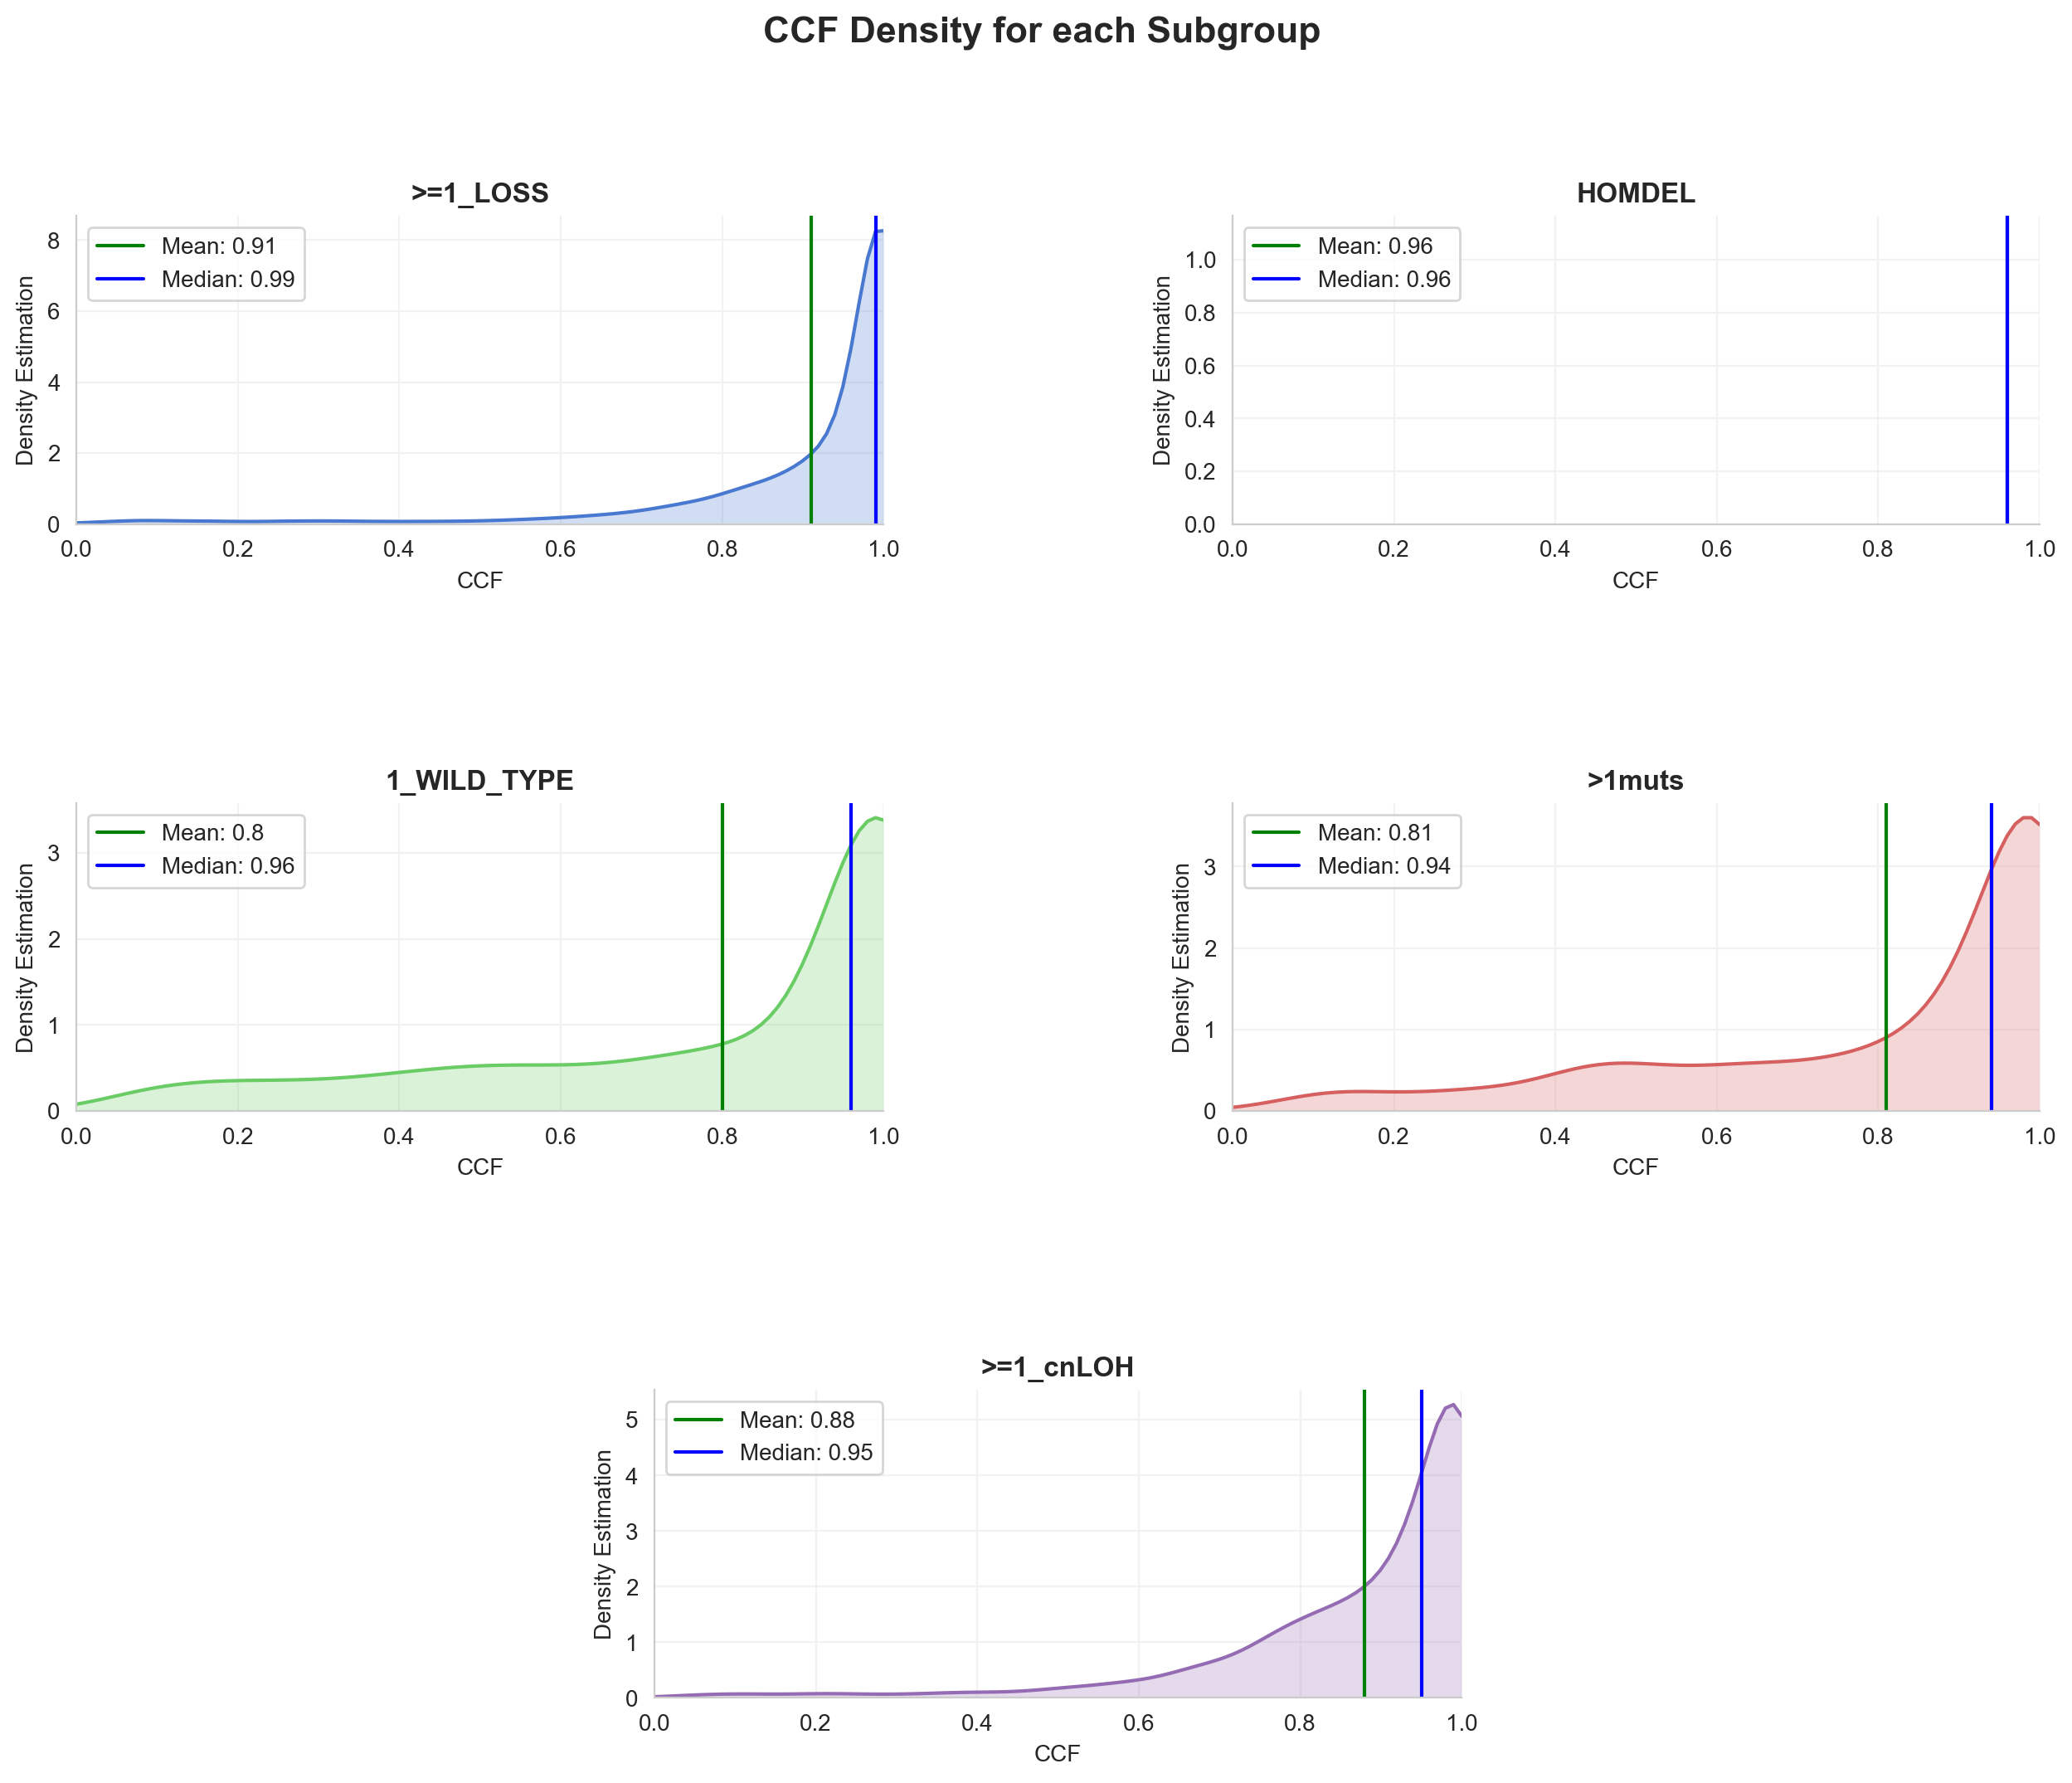

In [103]:
# CCF Density Comparison for all samples
get_densities(data_ccf, 'ccf', fig_title='CCF Density for each Subgroup', xlabel='CCF', ylabel='Density Estimation',  number=5)

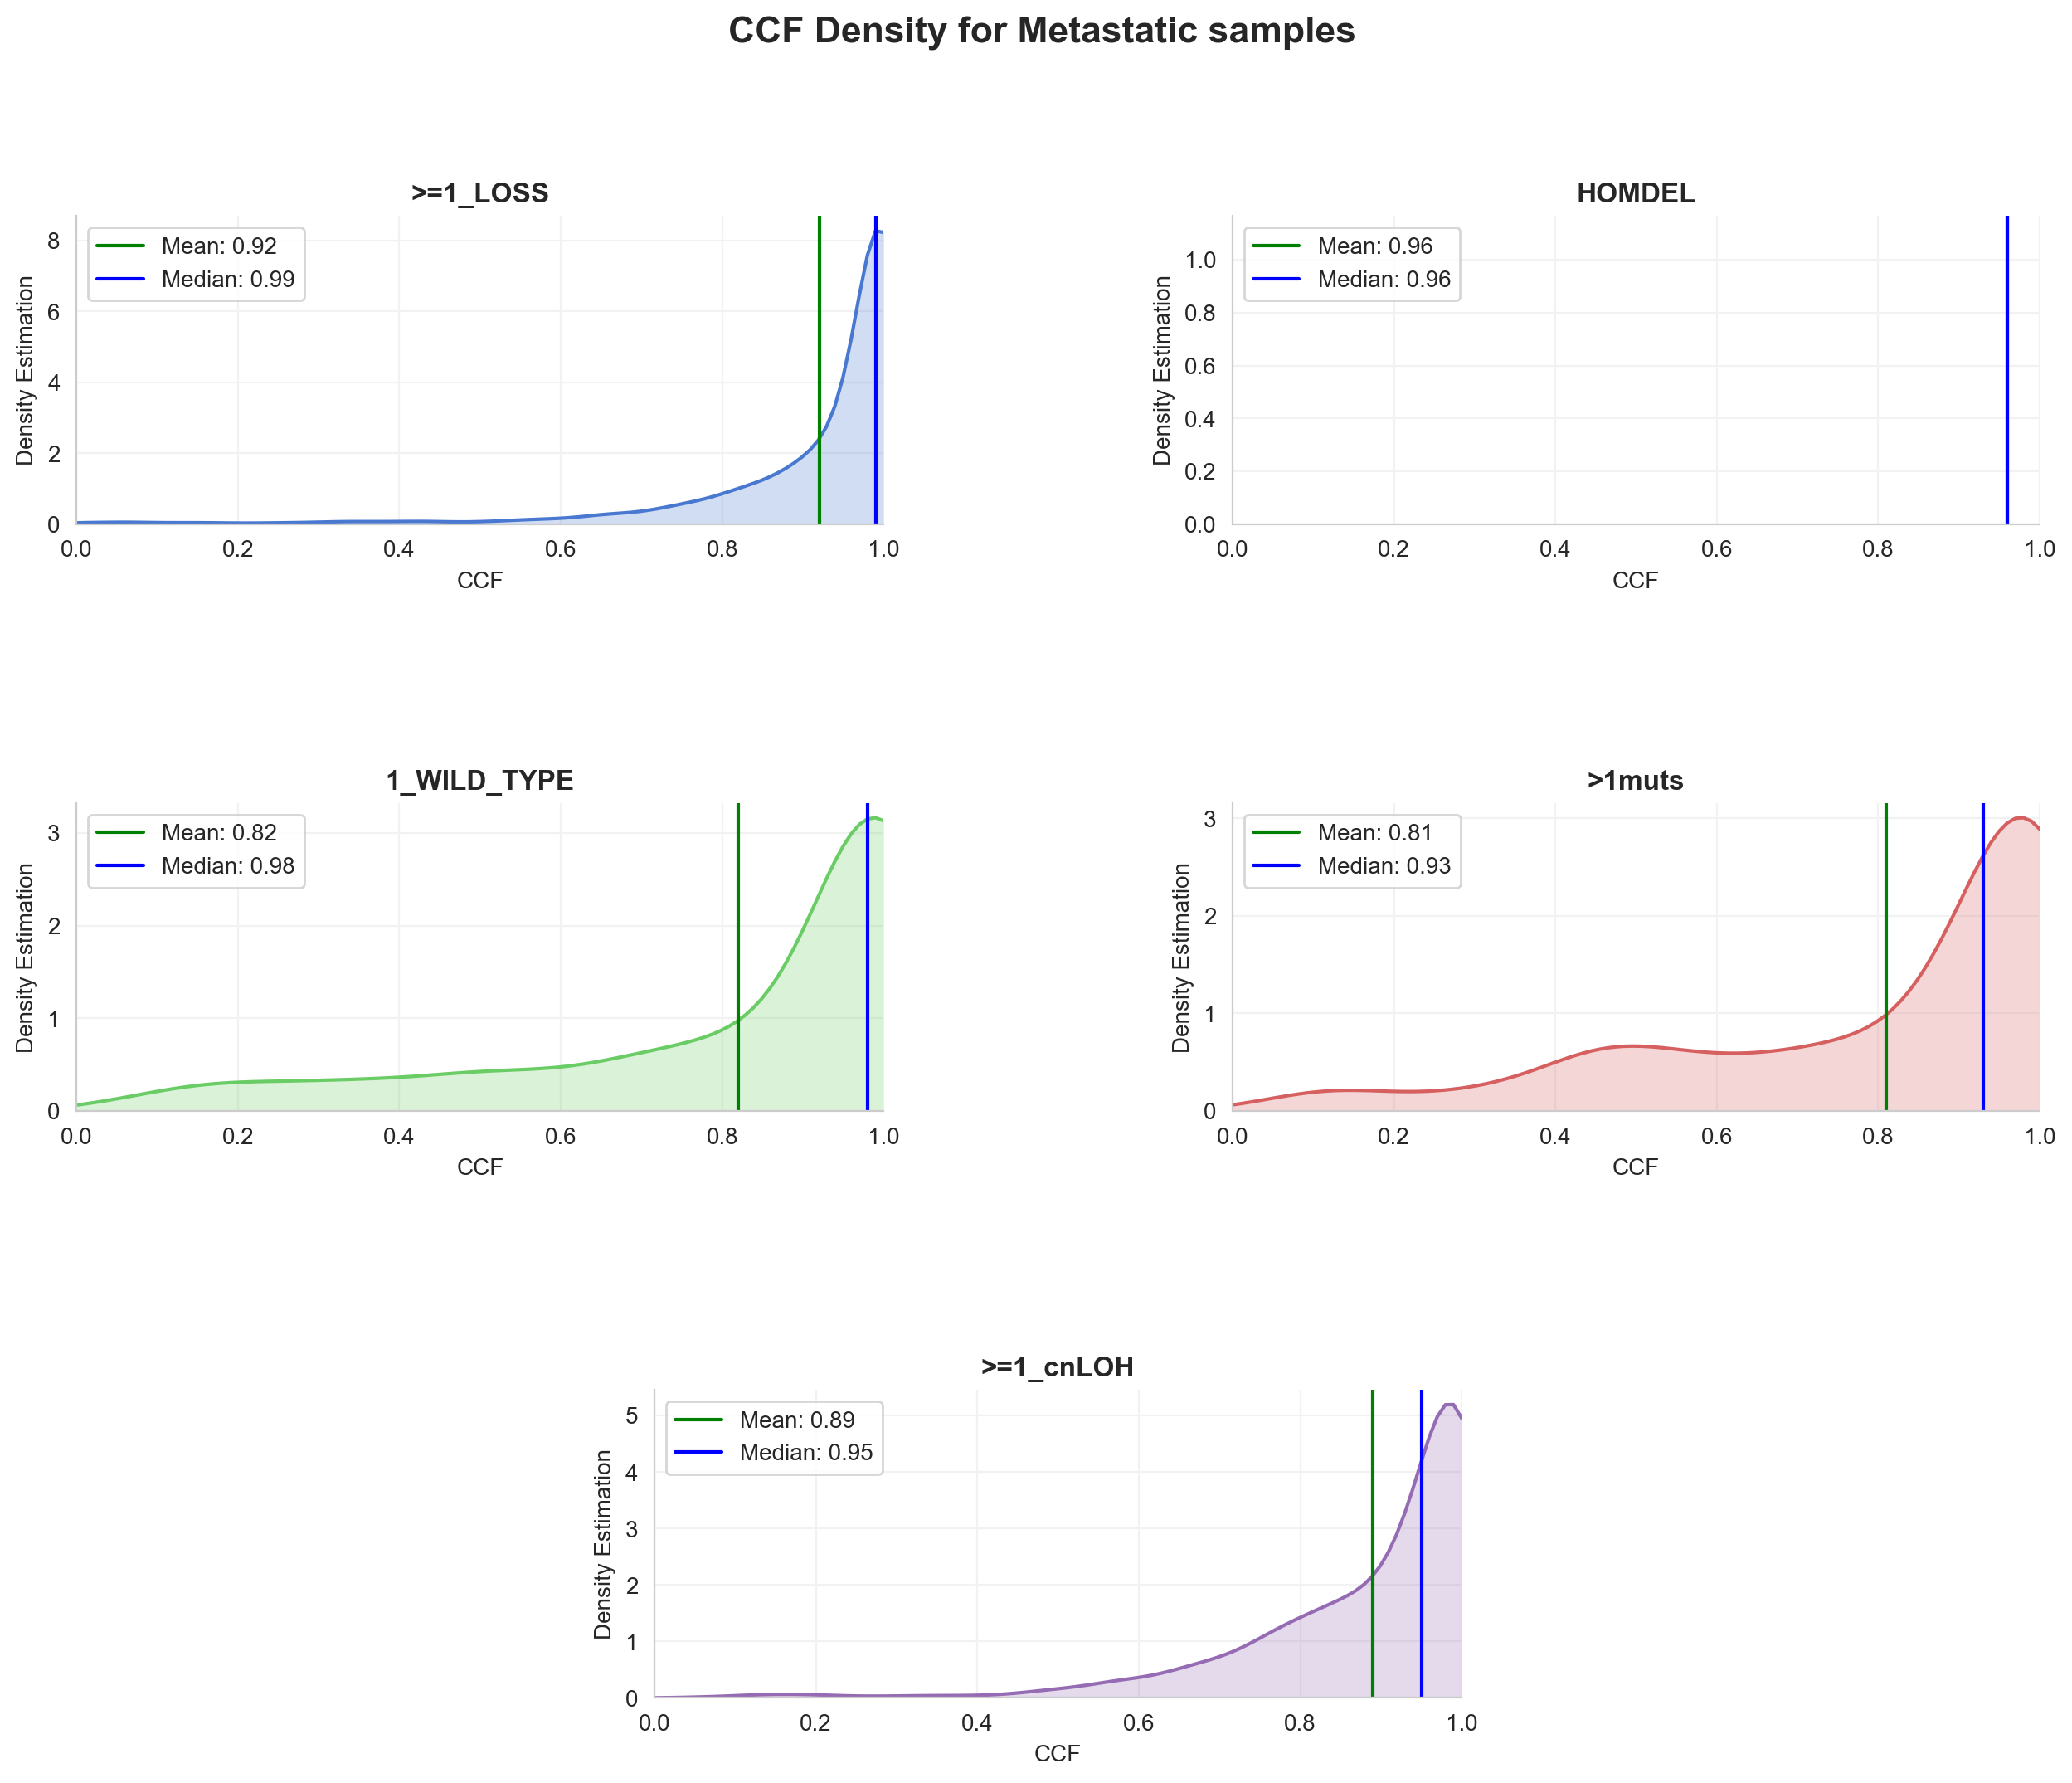

In [104]:
# CCF Density Comparison for Metastatic samples
get_densities(data_ccf, 'ccf', fig_title='CCF Density for Metastatic samples', xlabel='CCF', ylabel='Density Estimation',  number=5, met_prim='Metastasis')

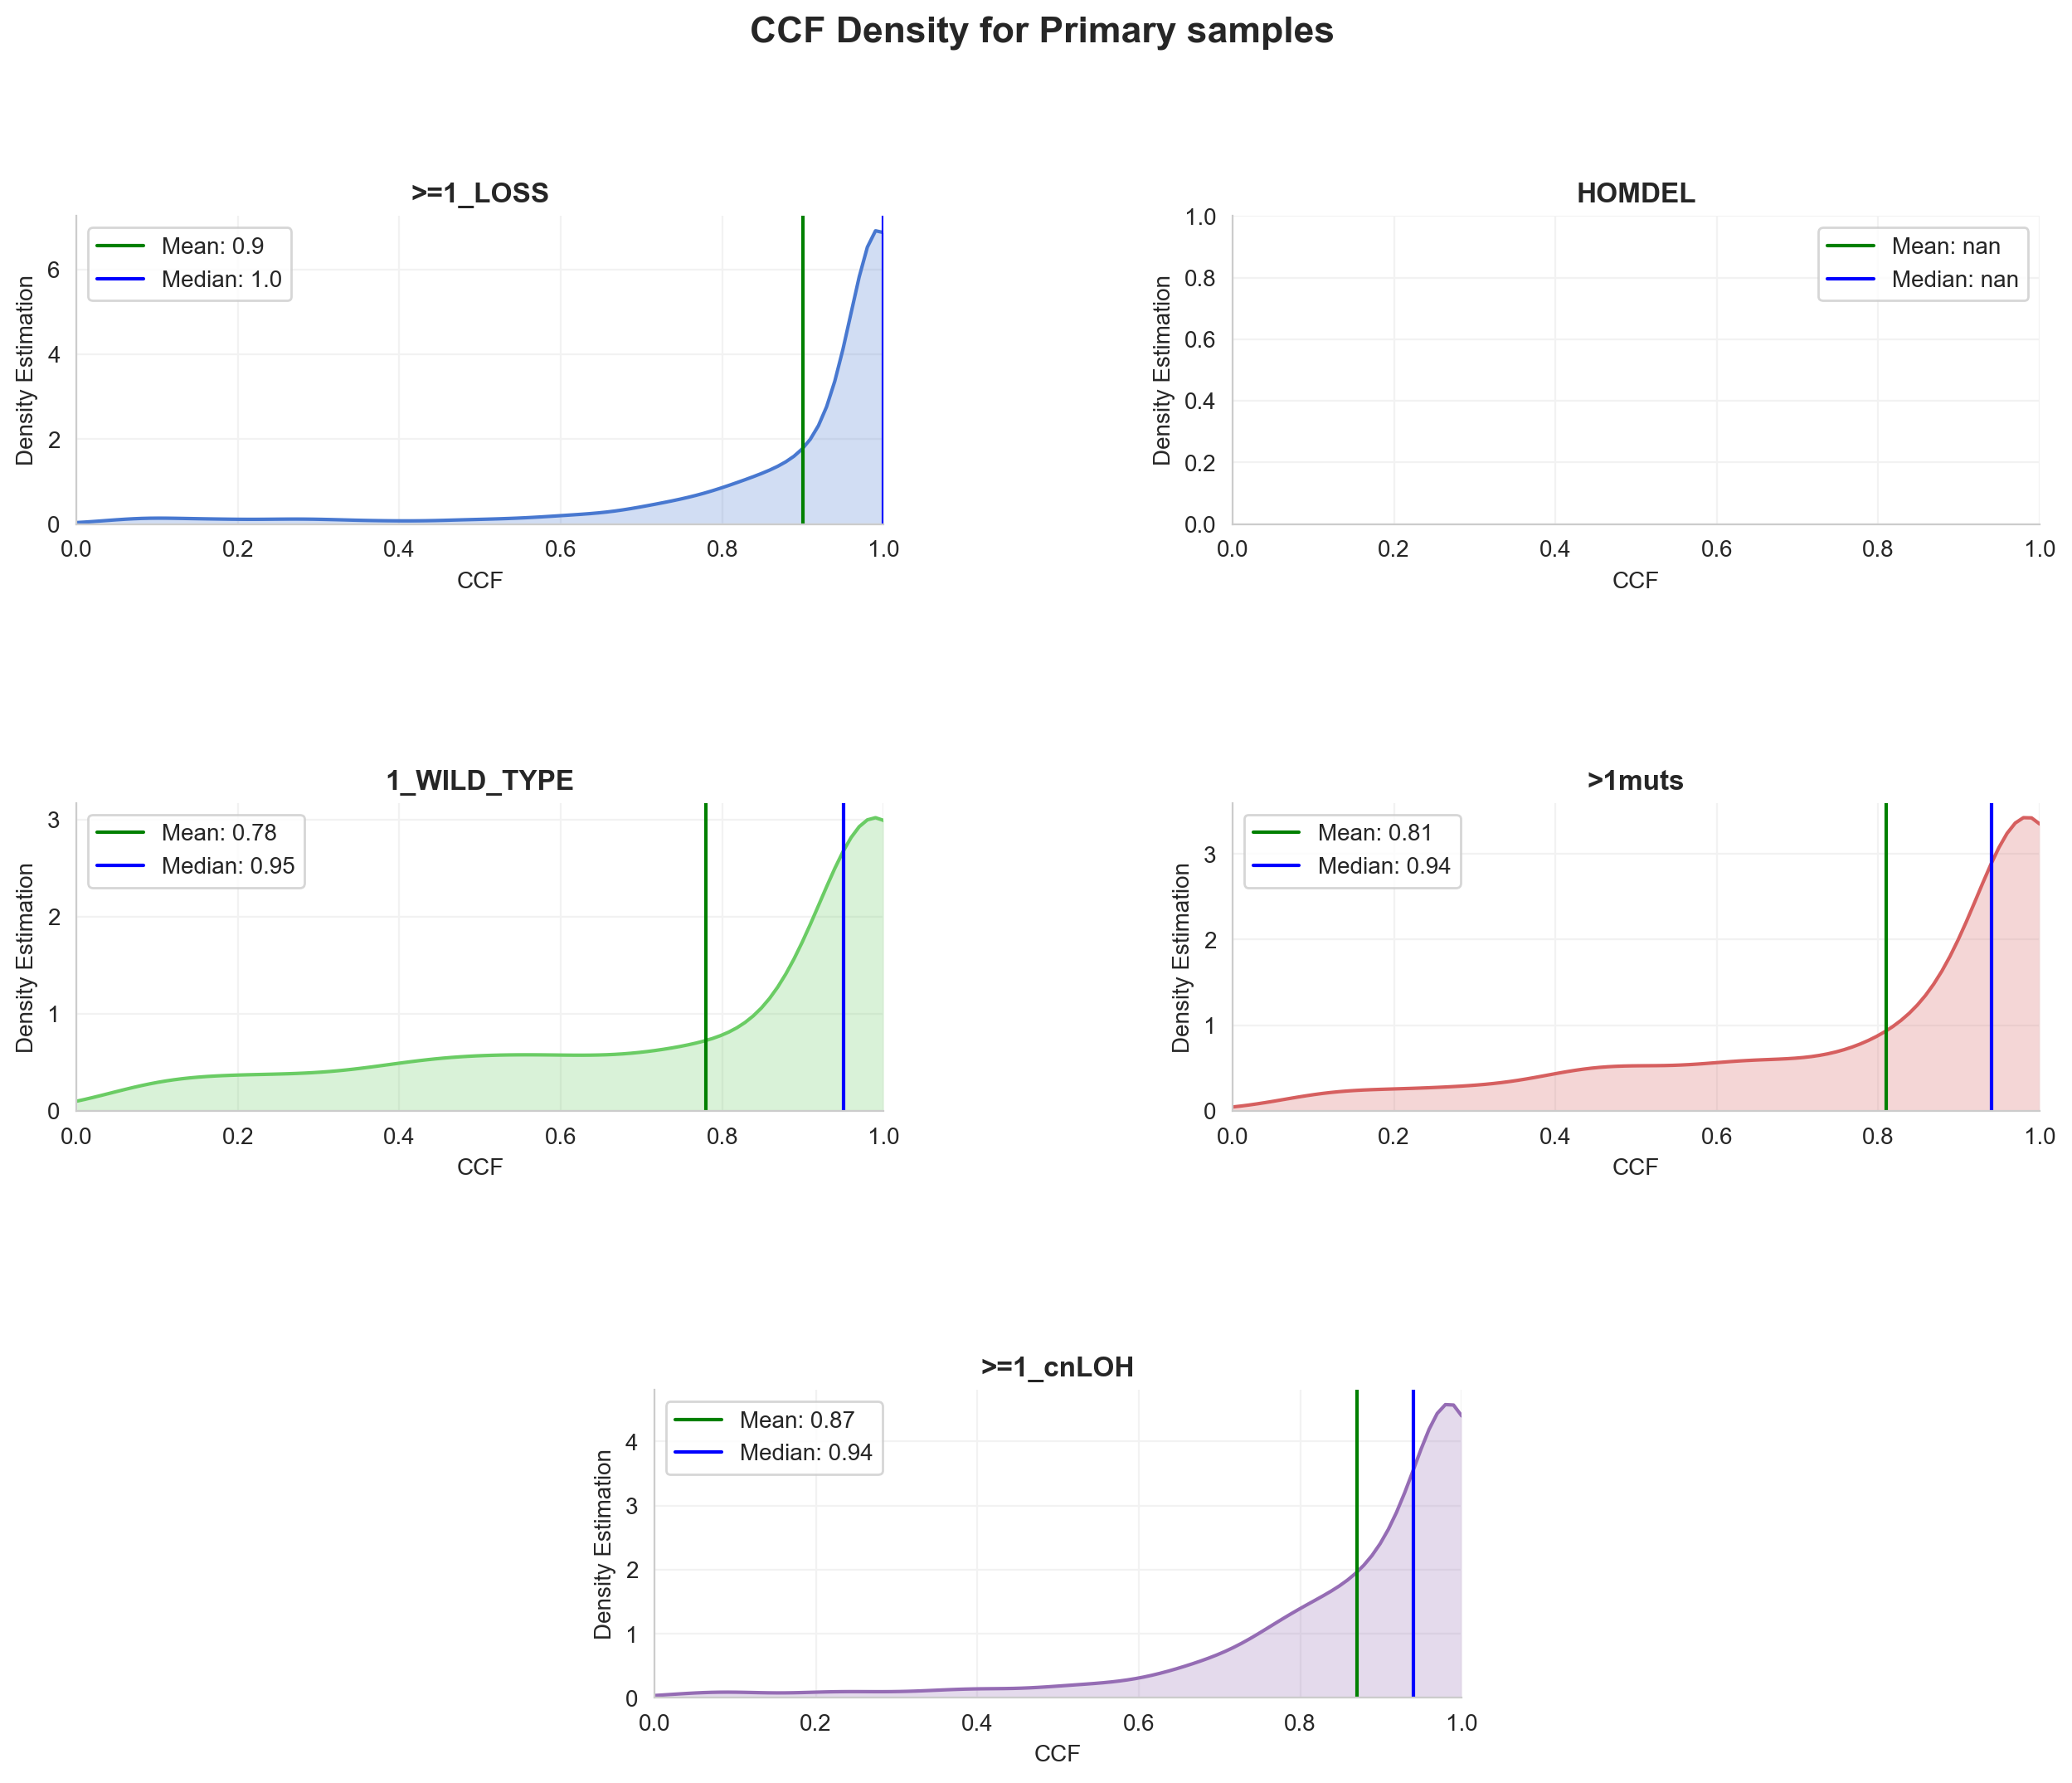

In [105]:
# CCF Density Comparison for Primary samples
get_densities(data_ccf, 'ccf', fig_title='CCF Density for Primary samples', xlabel='CCF', ylabel='Density Estimation',  number=5, met_prim='Primary')

### TP53 Variant Allele Frequency

In [101]:
# We need to prepare the data as in the master we have 5 vaff columns 
data_1 = master[['Sample_Type','mut_cn_group', 'vaf_1']] ; data_2 = master[['Sample_Type','mut_cn_group', 'vaf_2']] ; data_3 = master[['Sample_Type','mut_cn_group', 'vaf_3']] ; data_4 = master[['Sample_Type','mut_cn_group', 'vaf_4']] ; data_5 = master[['Sample_Type','mut_cn_group', 'vaf_5']]
data_1 = data_1.rename(columns={'vaf_1': 'vaf'}) ; data_2 = data_2.rename(columns={'vaf_2': 'vaf'}) ; data_3 = data_3.rename(columns={'vaf_3': 'vaf'}) ; data_4 = data_4.rename(columns={'vaf_4': 'vaf'}) ; data_5 = data_5.rename(columns={'vaf_5': 'vaf'}) ;
data_vaf = data_1.append([data_2, data_3, data_4, data_5]).dropna(subset=['vaf'])

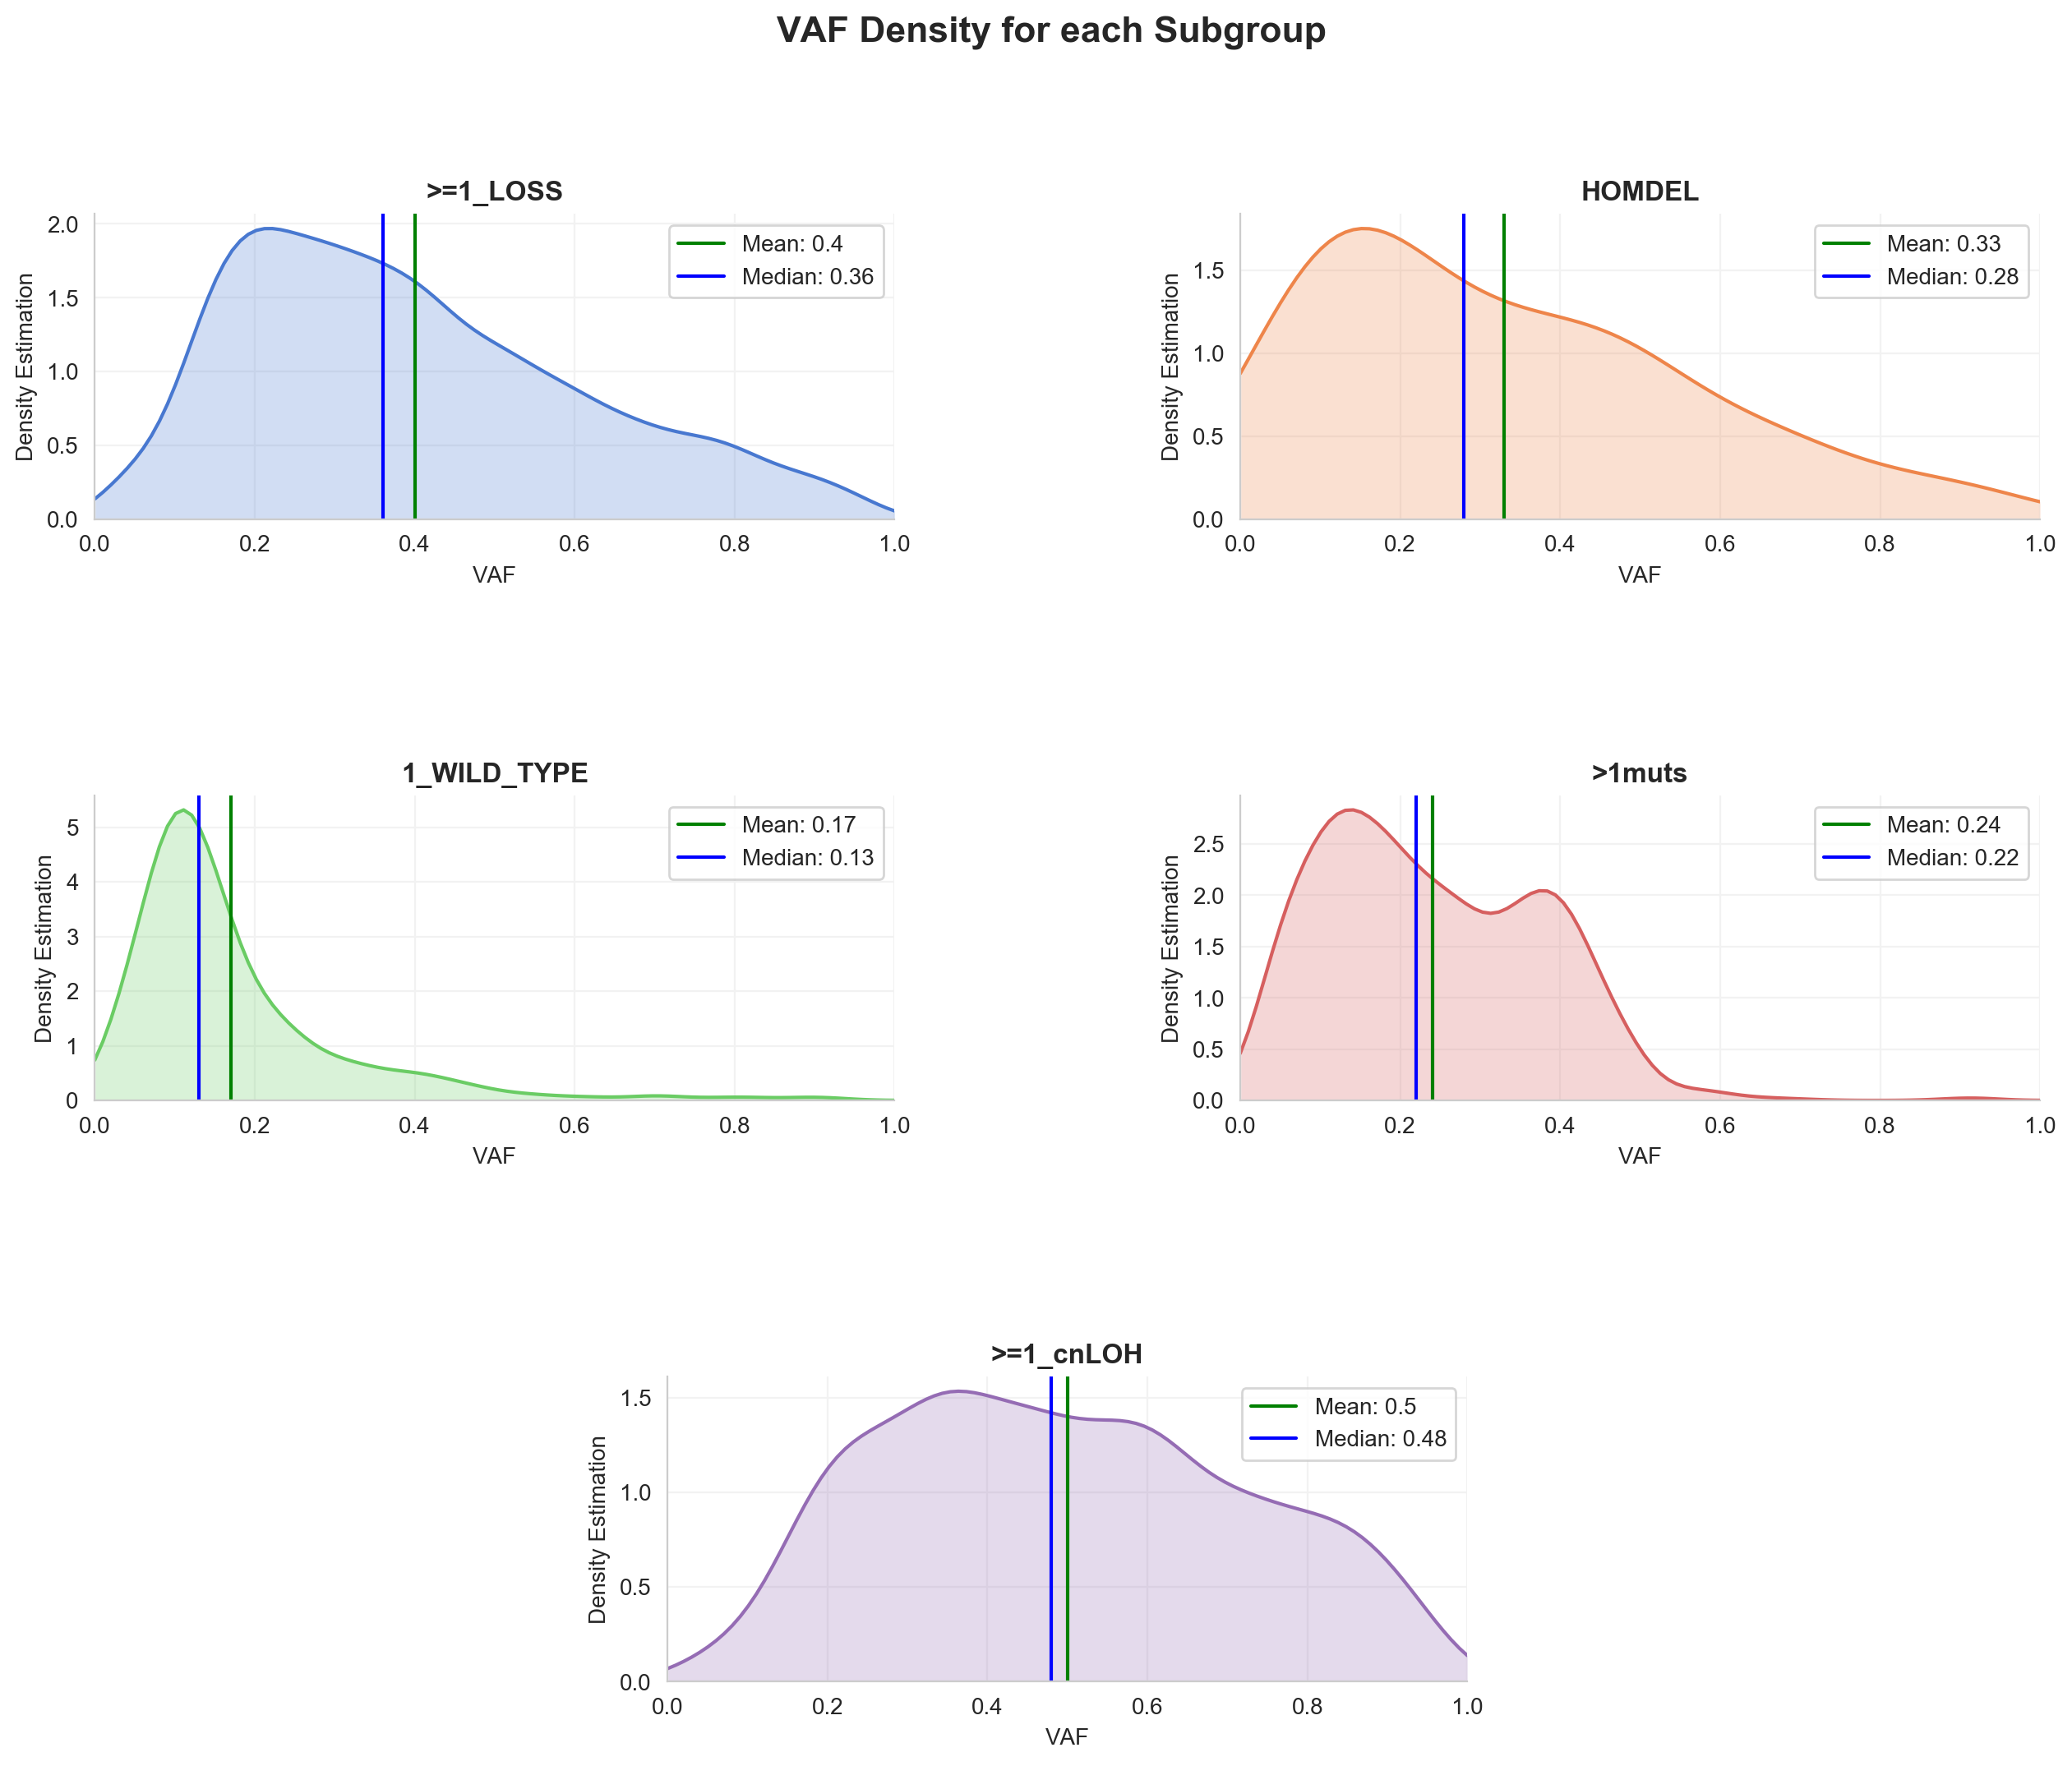

In [109]:
# VAF Density Comparison for all samples
get_densities(data_vaf, 'vaf', fig_title='VAF Density for each Subgroup', xlabel='VAF', ylabel='Density Estimation',  number=5)

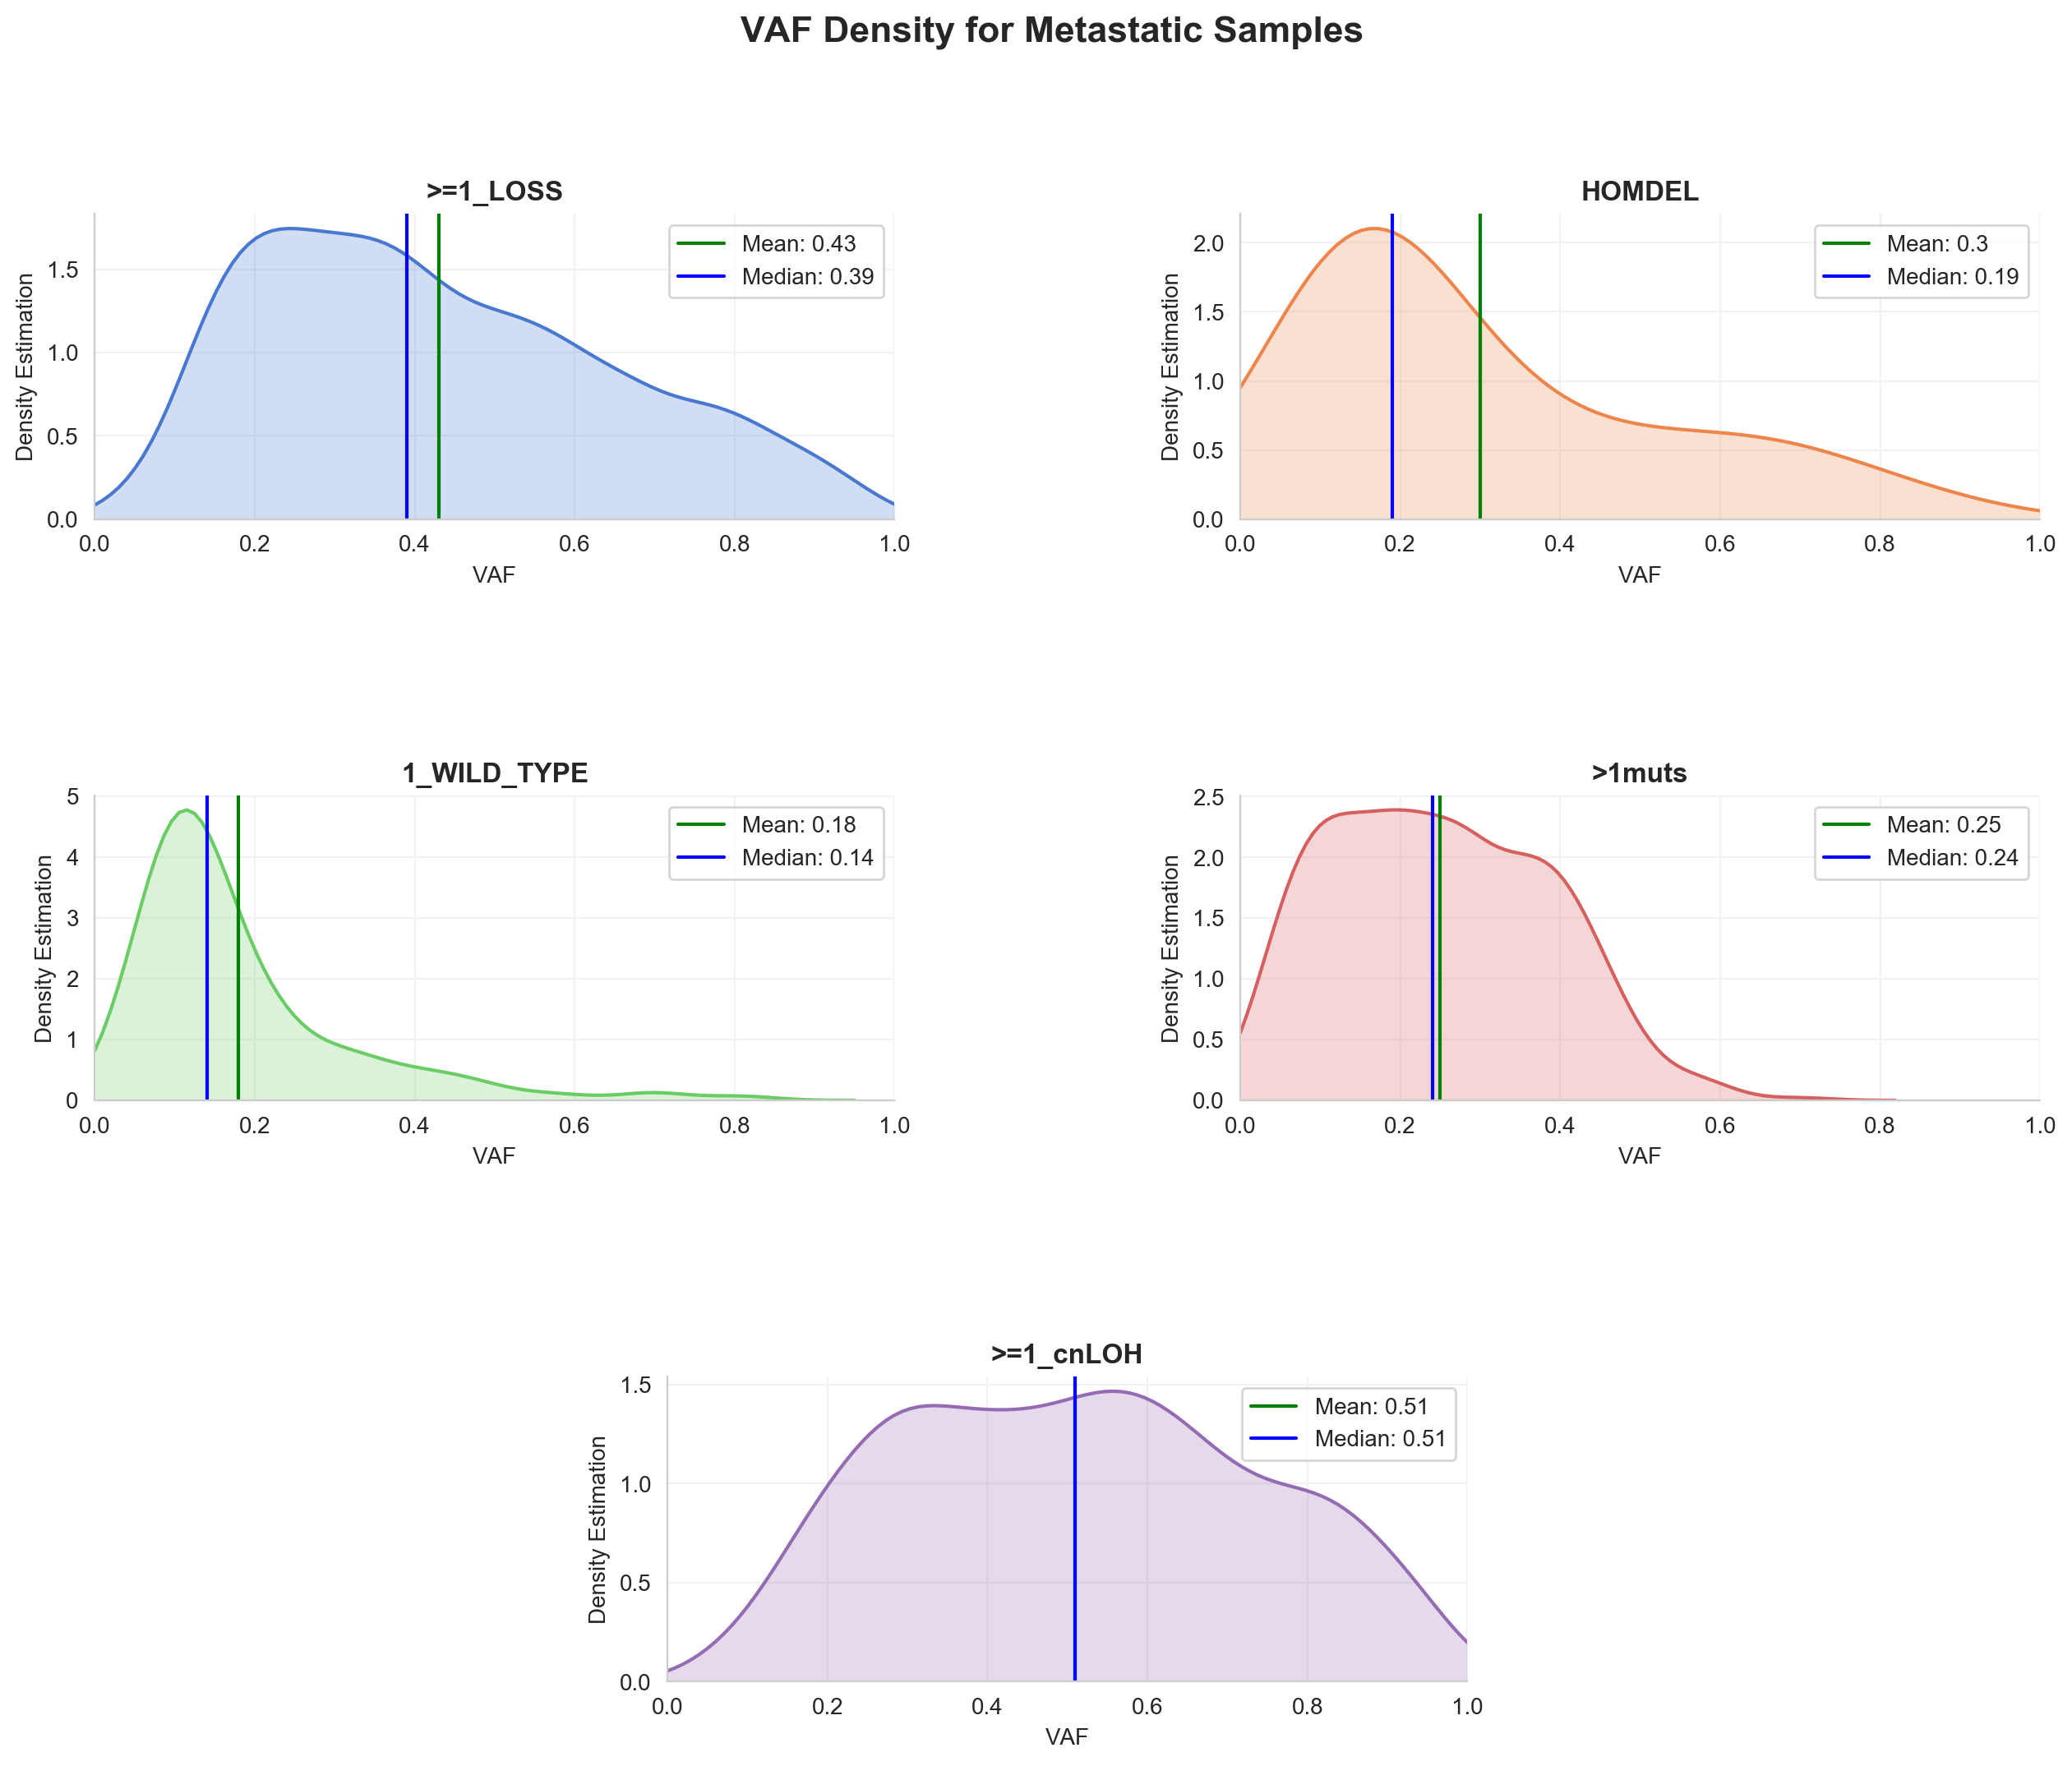

In [110]:
# VAF Density Comparison for Metastatic samples
get_densities(data_vaf, 'vaf', fig_title='VAF Density for Metastatic Samples', xlabel='VAF', ylabel='Density Estimation',  number=5, met_prim='Metastasis')

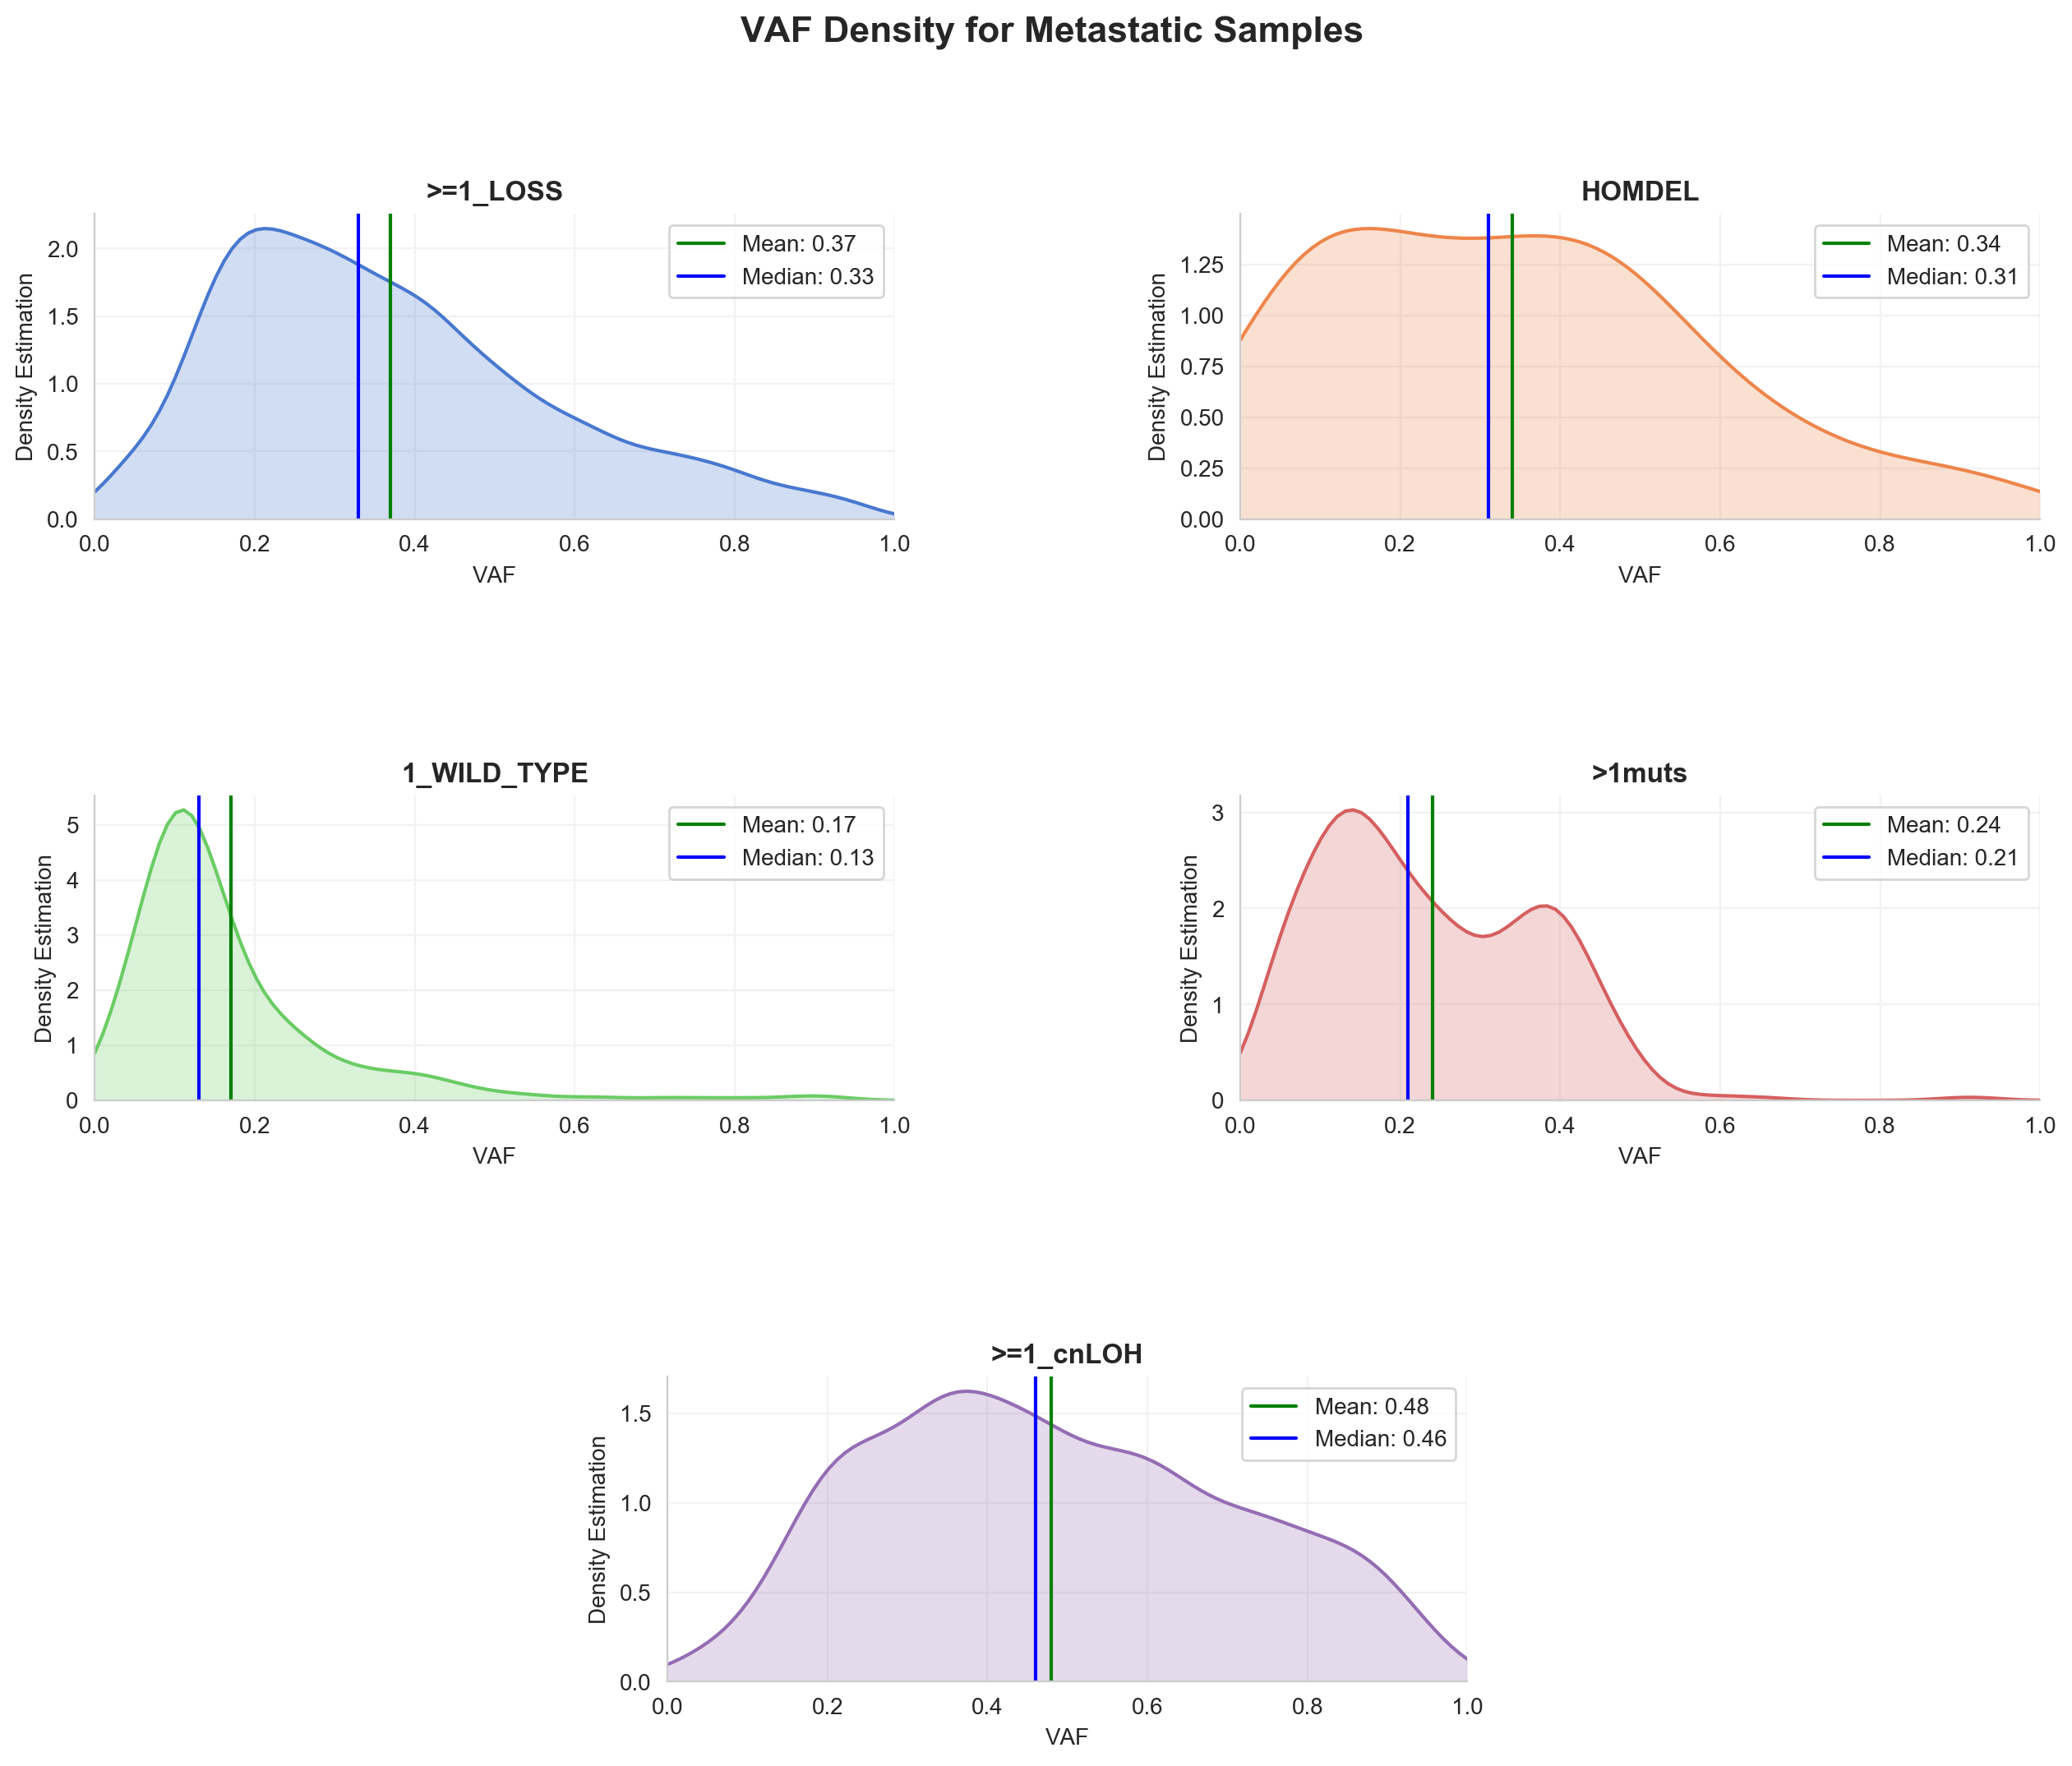

In [111]:
# VAF Density Comparison for Primary samples
get_densities(data_vaf, 'vaf', fig_title='VAF Density for Primary Samples', xlabel='VAF', ylabel='Density Estimation',  number=5, met_prim='Primary')

### Max TP53 CCF

In [153]:
# We need to preprocess the data to have a single column with the max_tp53_ccf per sample
data_vaf = master[['Sample_Type','mut_cn_group', 'ccf_1', 'ccf_2', 'ccf_3','ccf_4','ccf_5']]
max_table_ccf = pd.DataFrame(np.sort(data_vaf[['ccf_1', 'ccf_2', 'ccf_3','ccf_4','ccf_5']].fillna(0).values)[:,-1:], columns=['largest'])

max_table_ccf = pd.concat([data_vaf.reset_index(), max_table_ccf], axis=1)

# We remove samples with largest == 0
max_table_ccf = max_table_ccf[max_table_ccf['largest'] != 0]
max_table_ccf = max_table_ccf.dropna(subset=['largest'])

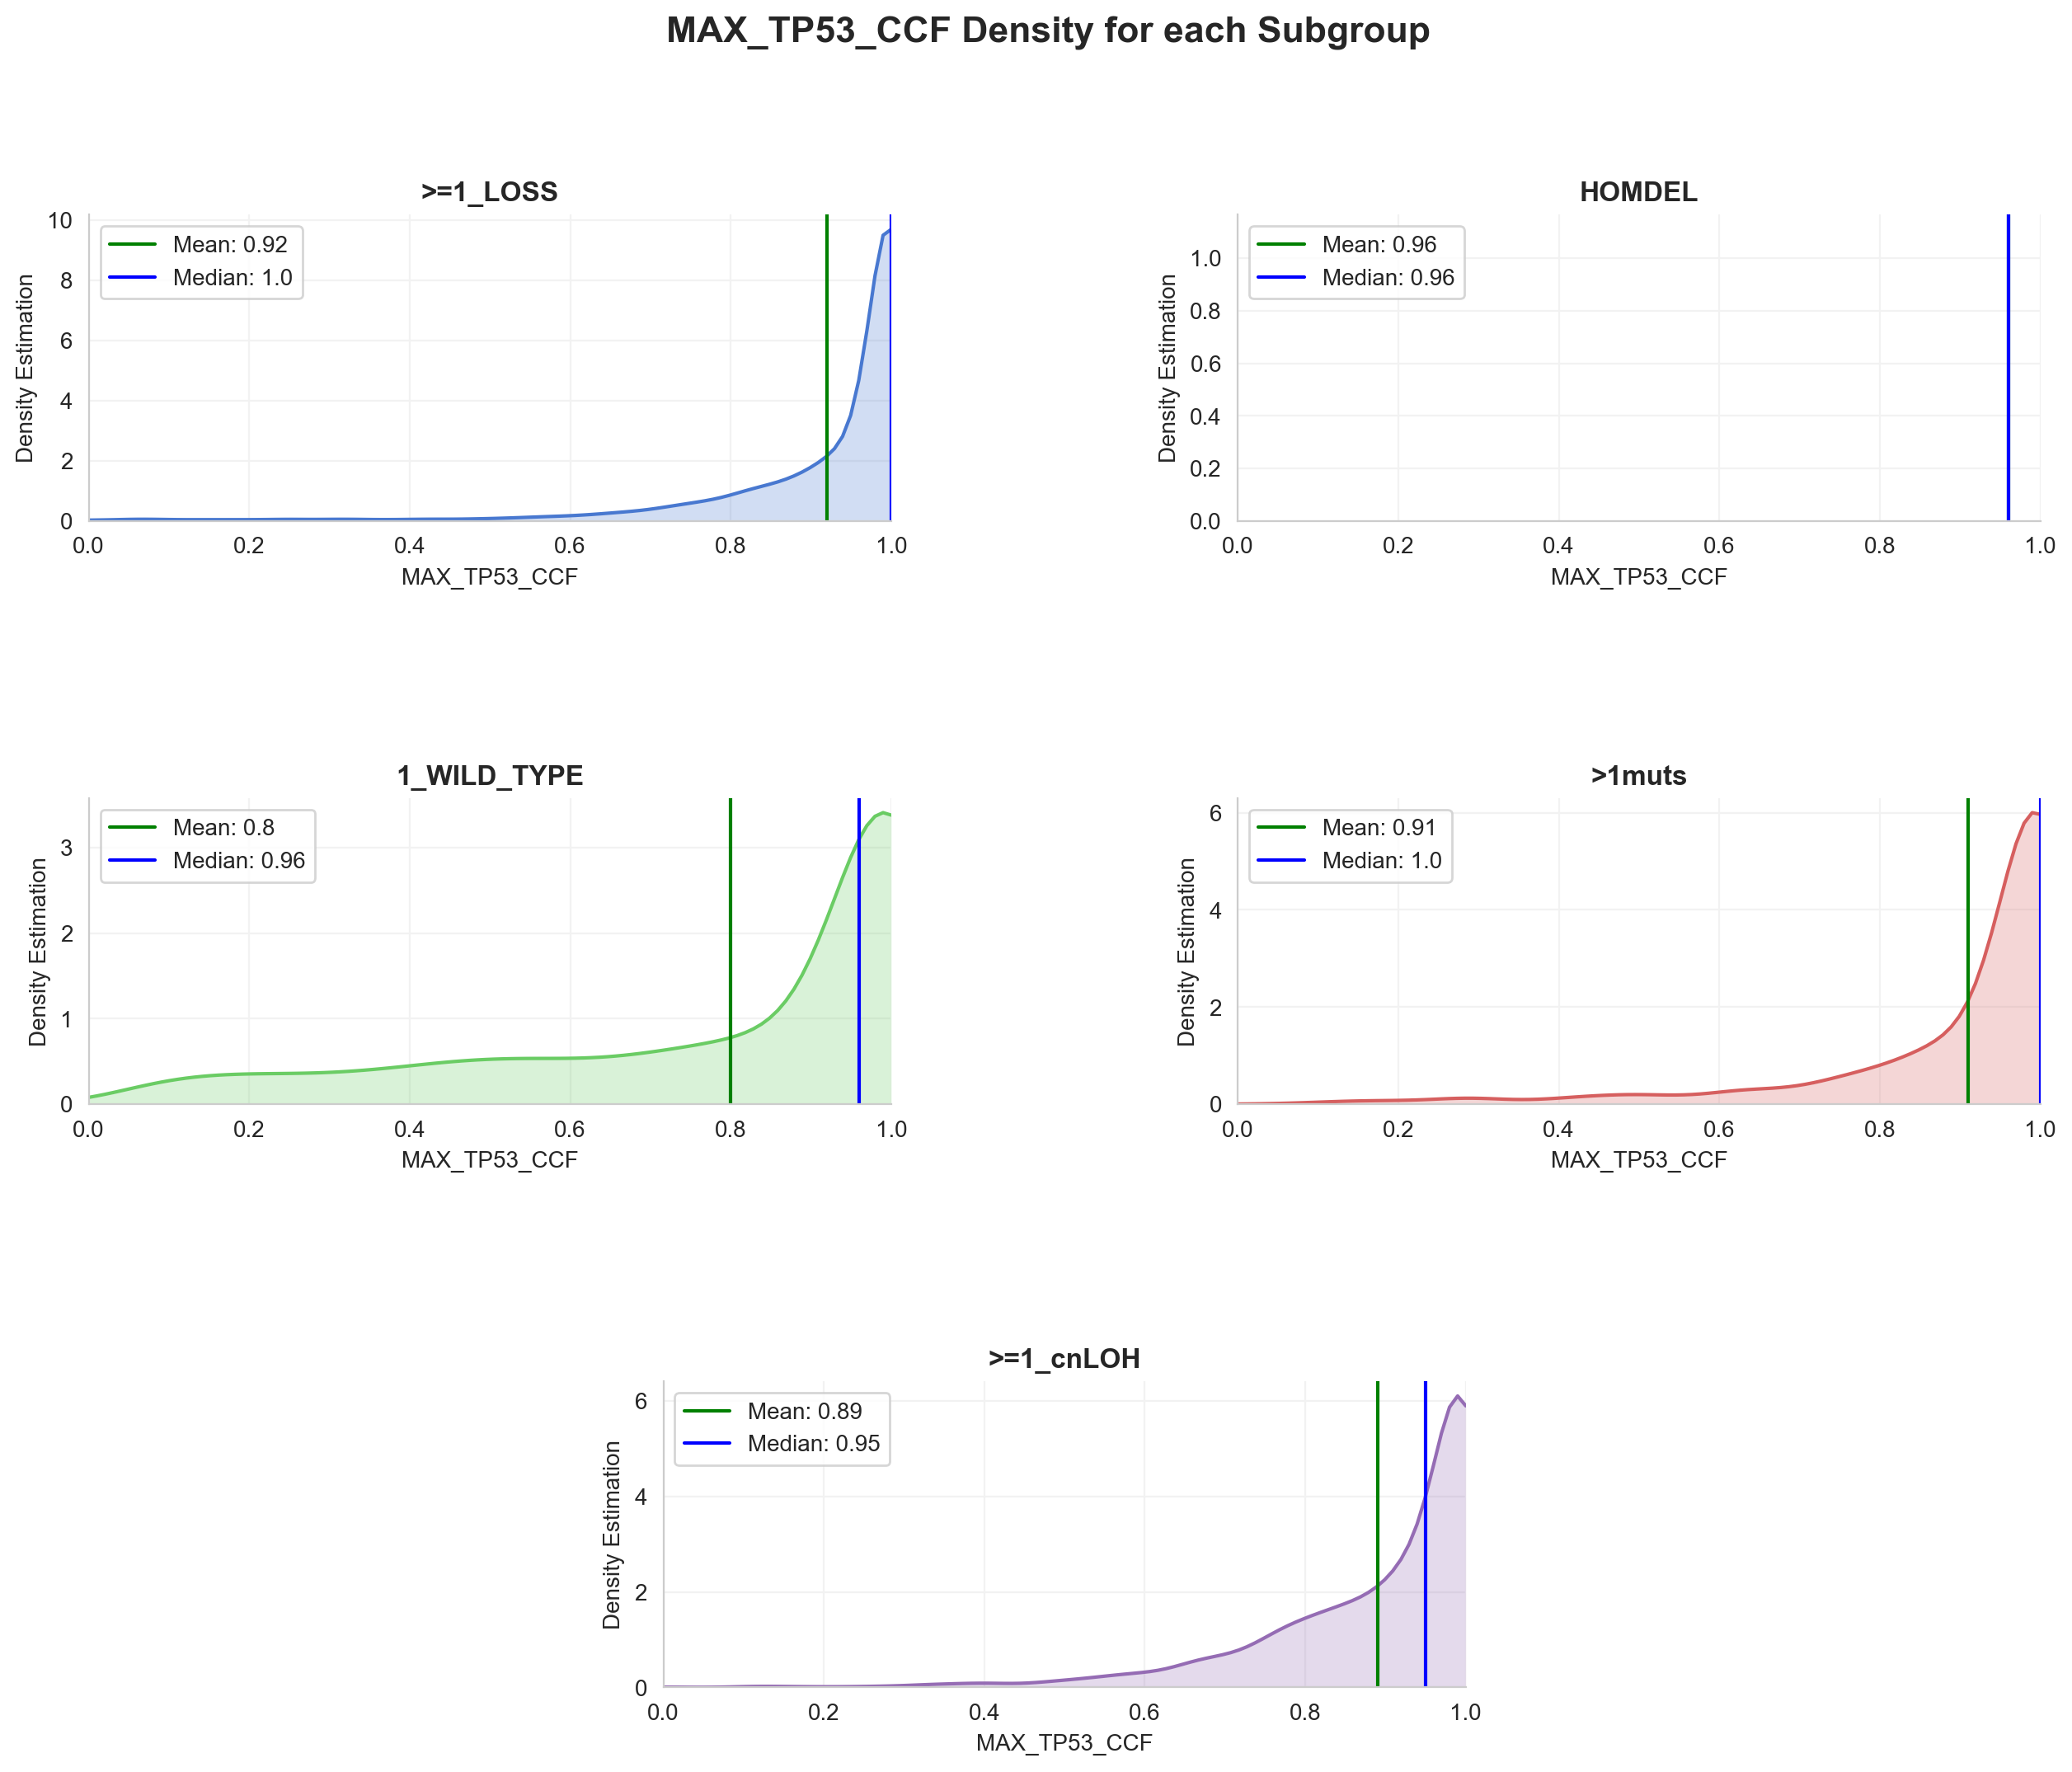

In [154]:
# MAX_CCF Density Comparison for all samples
get_densities(max_table_ccf, 'largest', fig_title='MAX_TP53_CCF Density for each Subgroup', xlabel='MAX_TP53_CCF', ylabel='Density Estimation',  number=5)

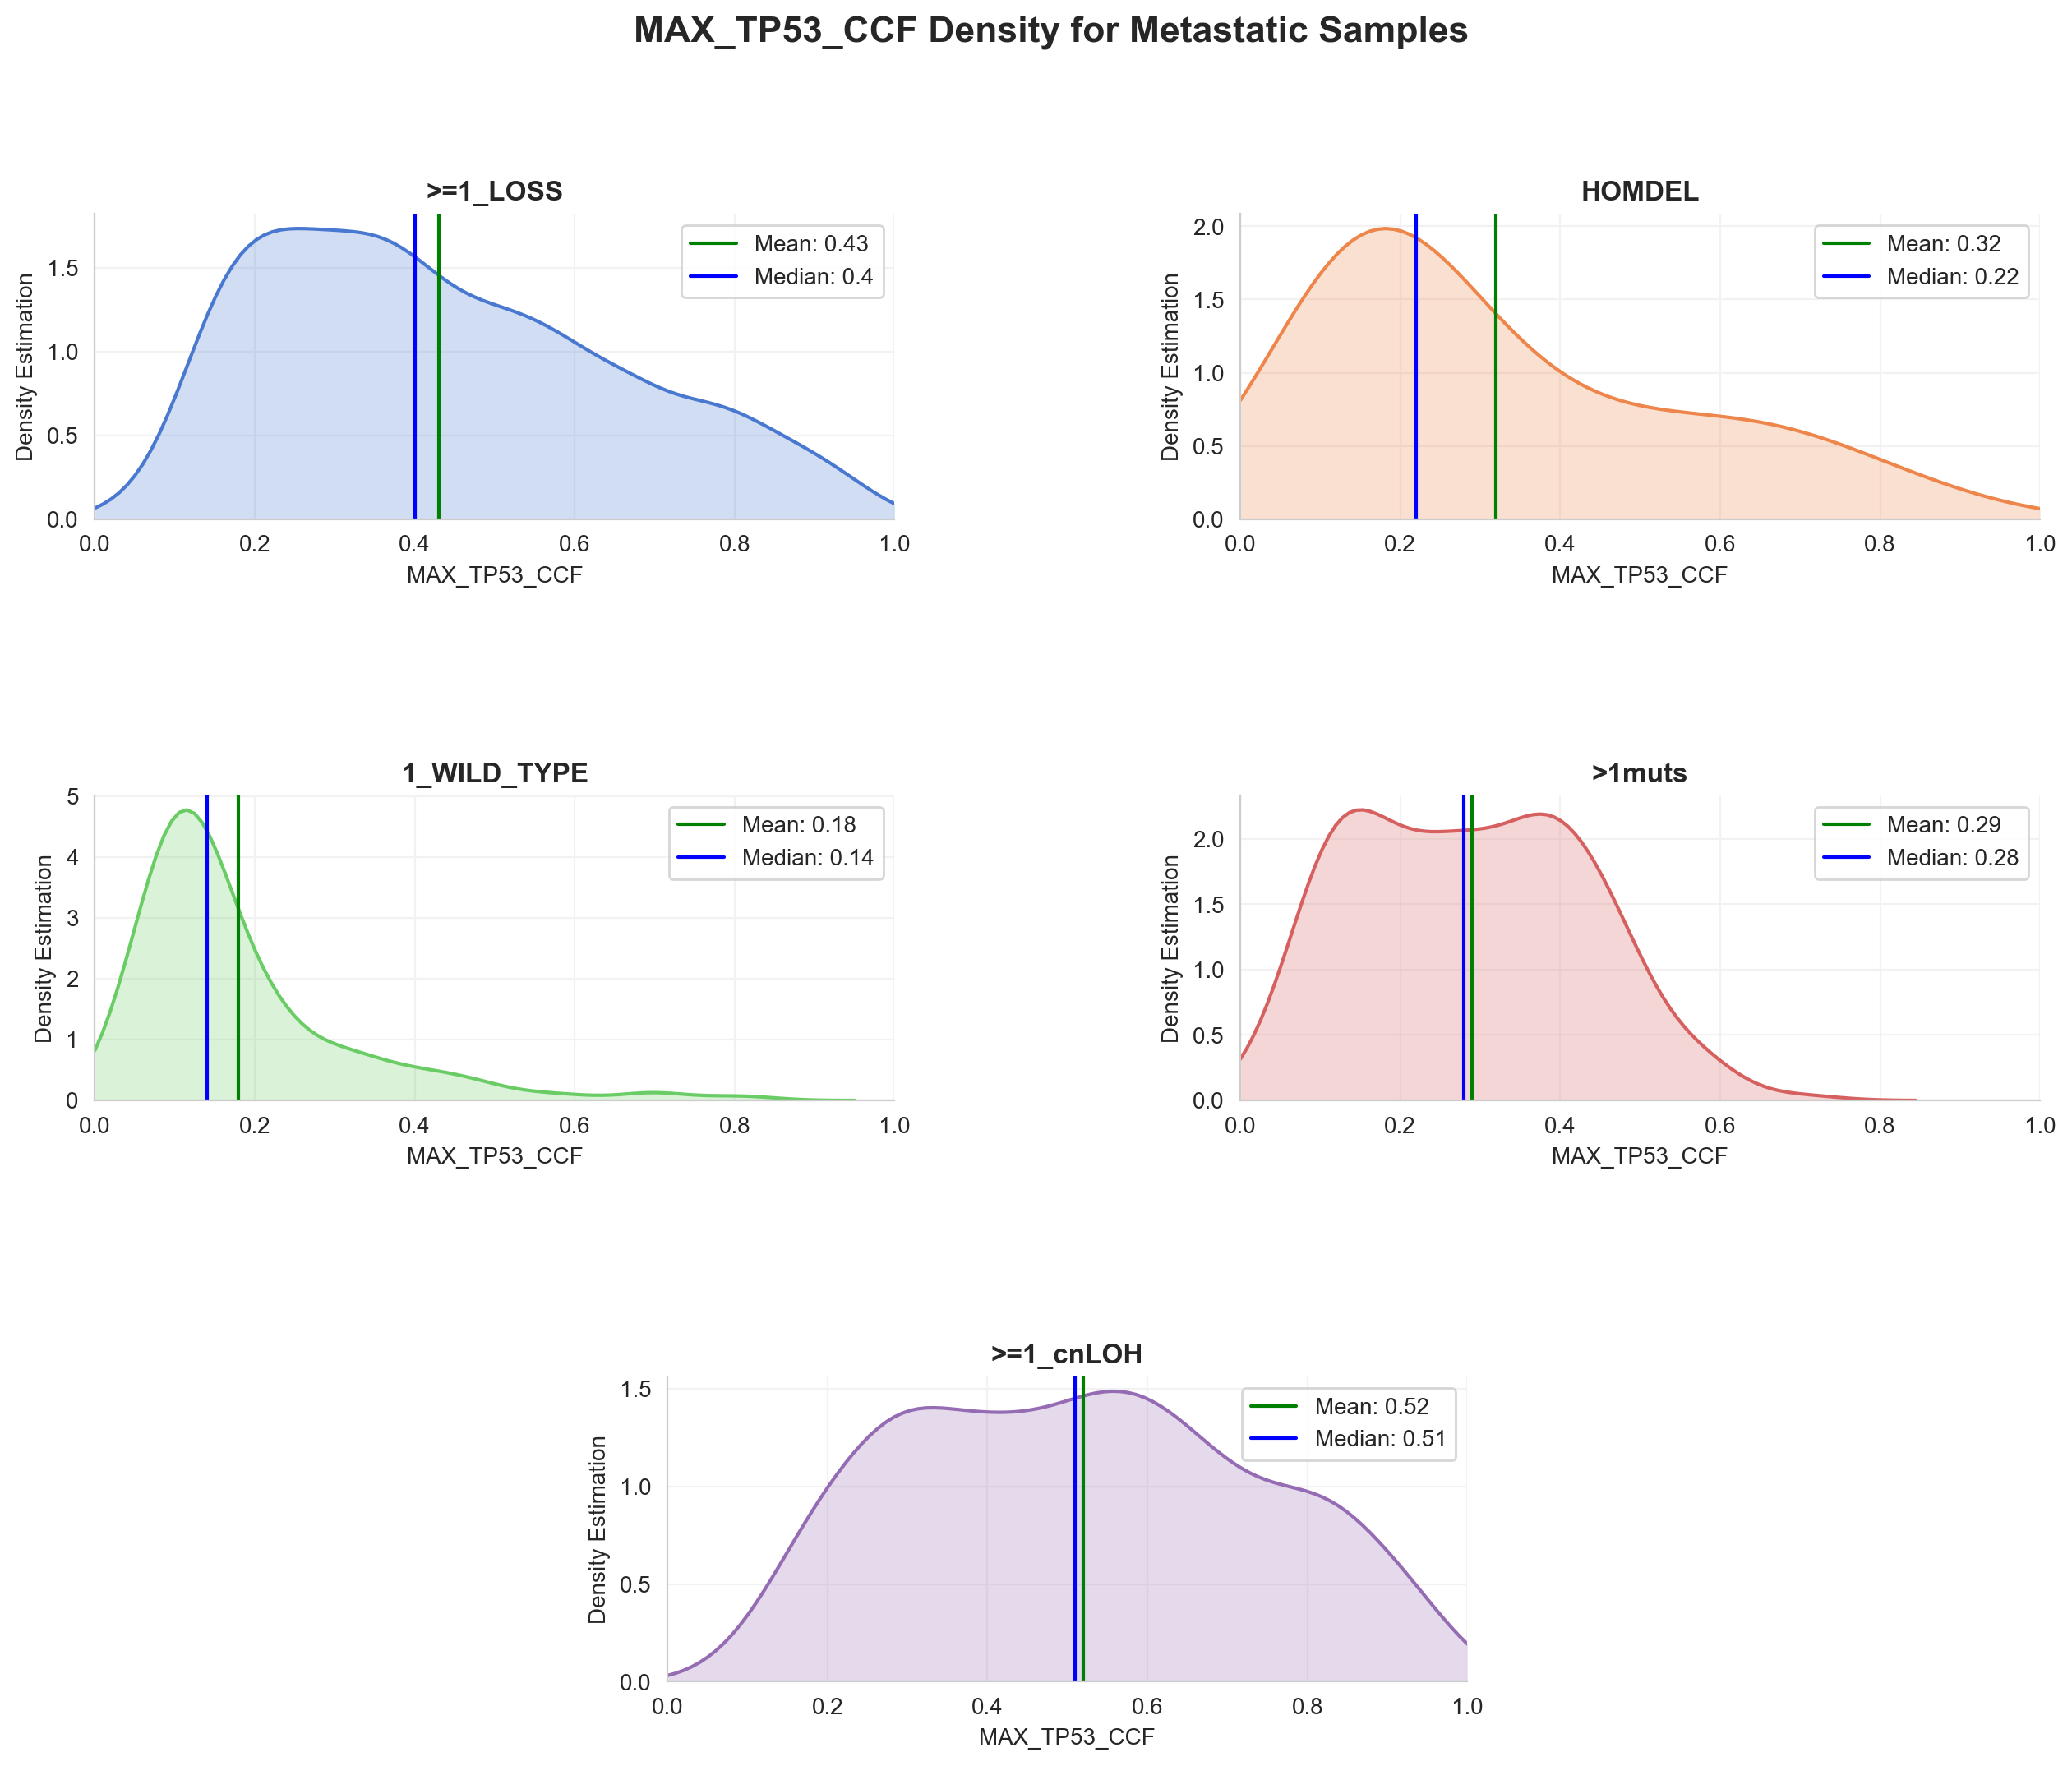

In [155]:
# MAX_CCF Density Comparison for Metastatic samples
get_densities(max_table_, 'largest', fig_title='MAX_TP53_CCF Density for Metastatic Samples', xlabel='MAX_TP53_CCF', ylabel='Density Estimation',  number=5, met_prim='Metastasis')

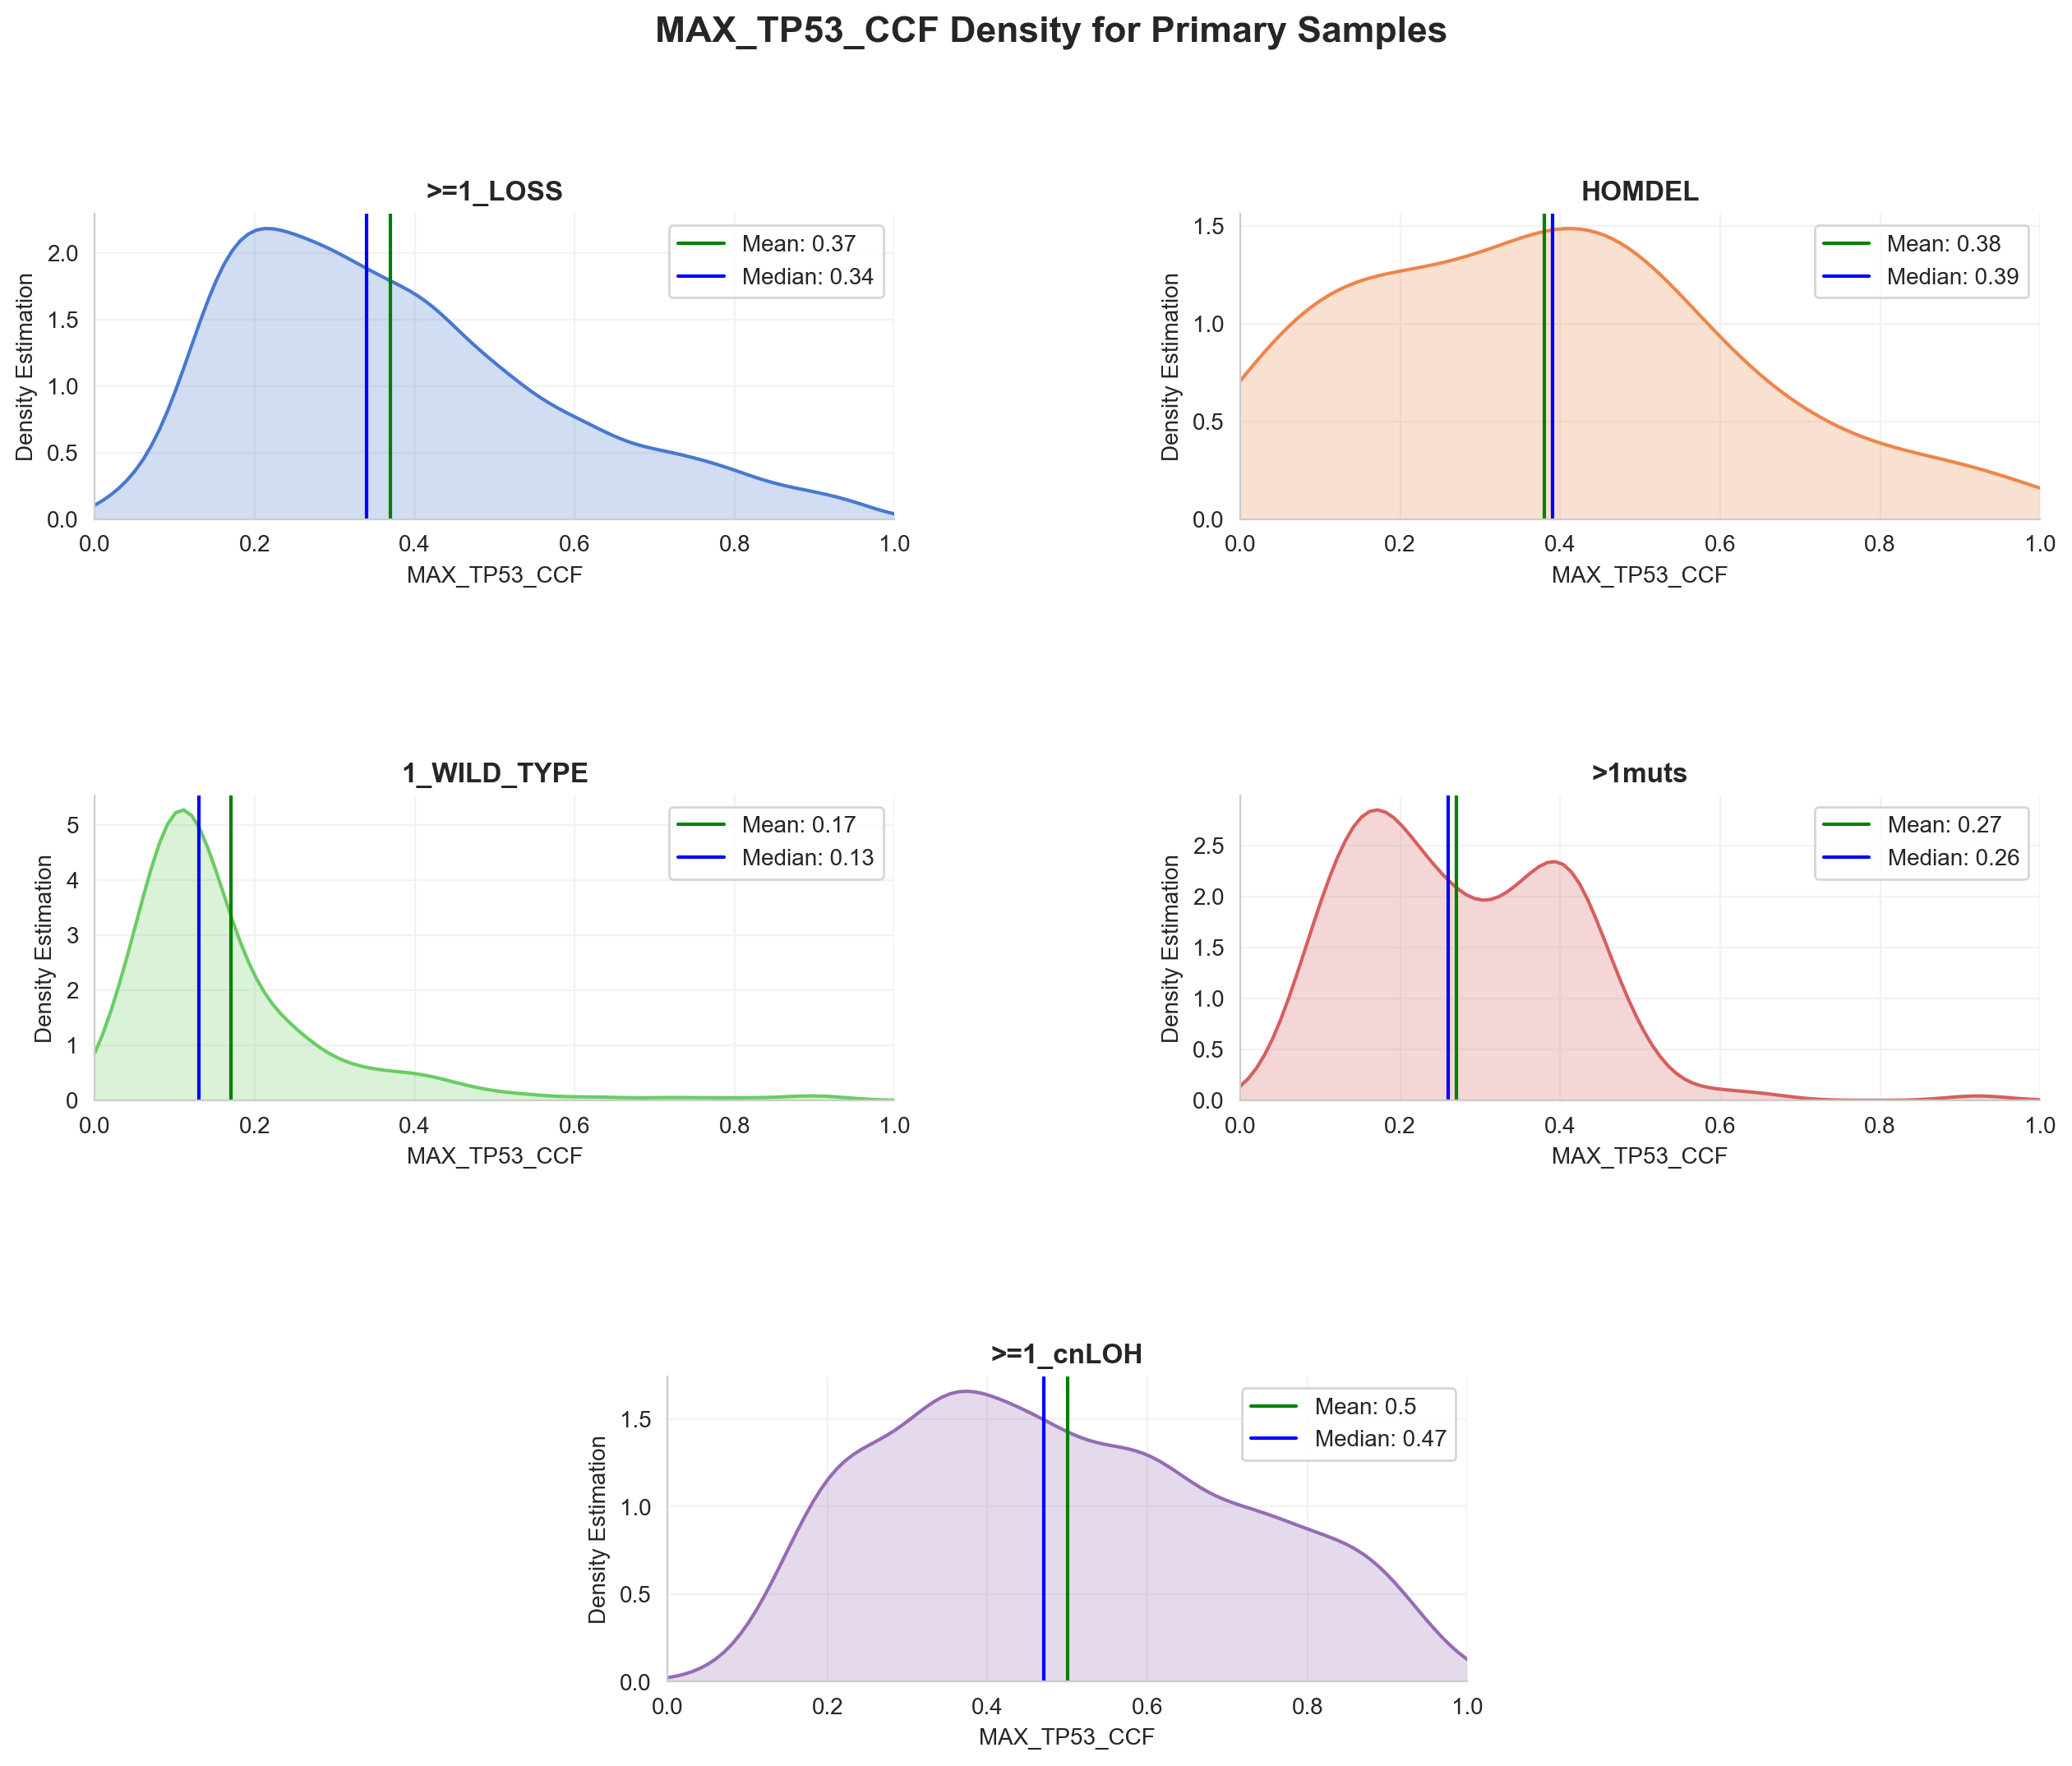

In [156]:
# MAX_CCF Density Comparison for Primary samples
get_densities(max_table_vaf, 'largest', fig_title='MAX_TP53_CCF Density for Primary Samples', xlabel='MAX_TP53_CCF', ylabel='Density Estimation',  number=5, met_prim='Primary')

### Max TP53 VAF

In [147]:
# We need to preprocess the data to have a single column with the max_tp53_vaf per sample
data_vaf = master[['Sample_Type','mut_cn_group', 'vaf_1', 'vaf_2', 'vaf_3','vaf_4','vaf_5']]
max_table_vaf = pd.DataFrame(np.sort(data_vaf[['vaf_1', 'vaf_2', 'vaf_3','vaf_4','vaf_5']].fillna(0).values)[:,-1:], columns=['largest'])

max_table_vaf = pd.concat([data_vaf.reset_index(), max_table_vaf], axis=1)

# We remove samples with largest == 0
max_table_vaf = max_table_vaf[max_table_vaf['largest'] != 0]
max_table_vaf = max_table_vaf.dropna(subset=['largest'])

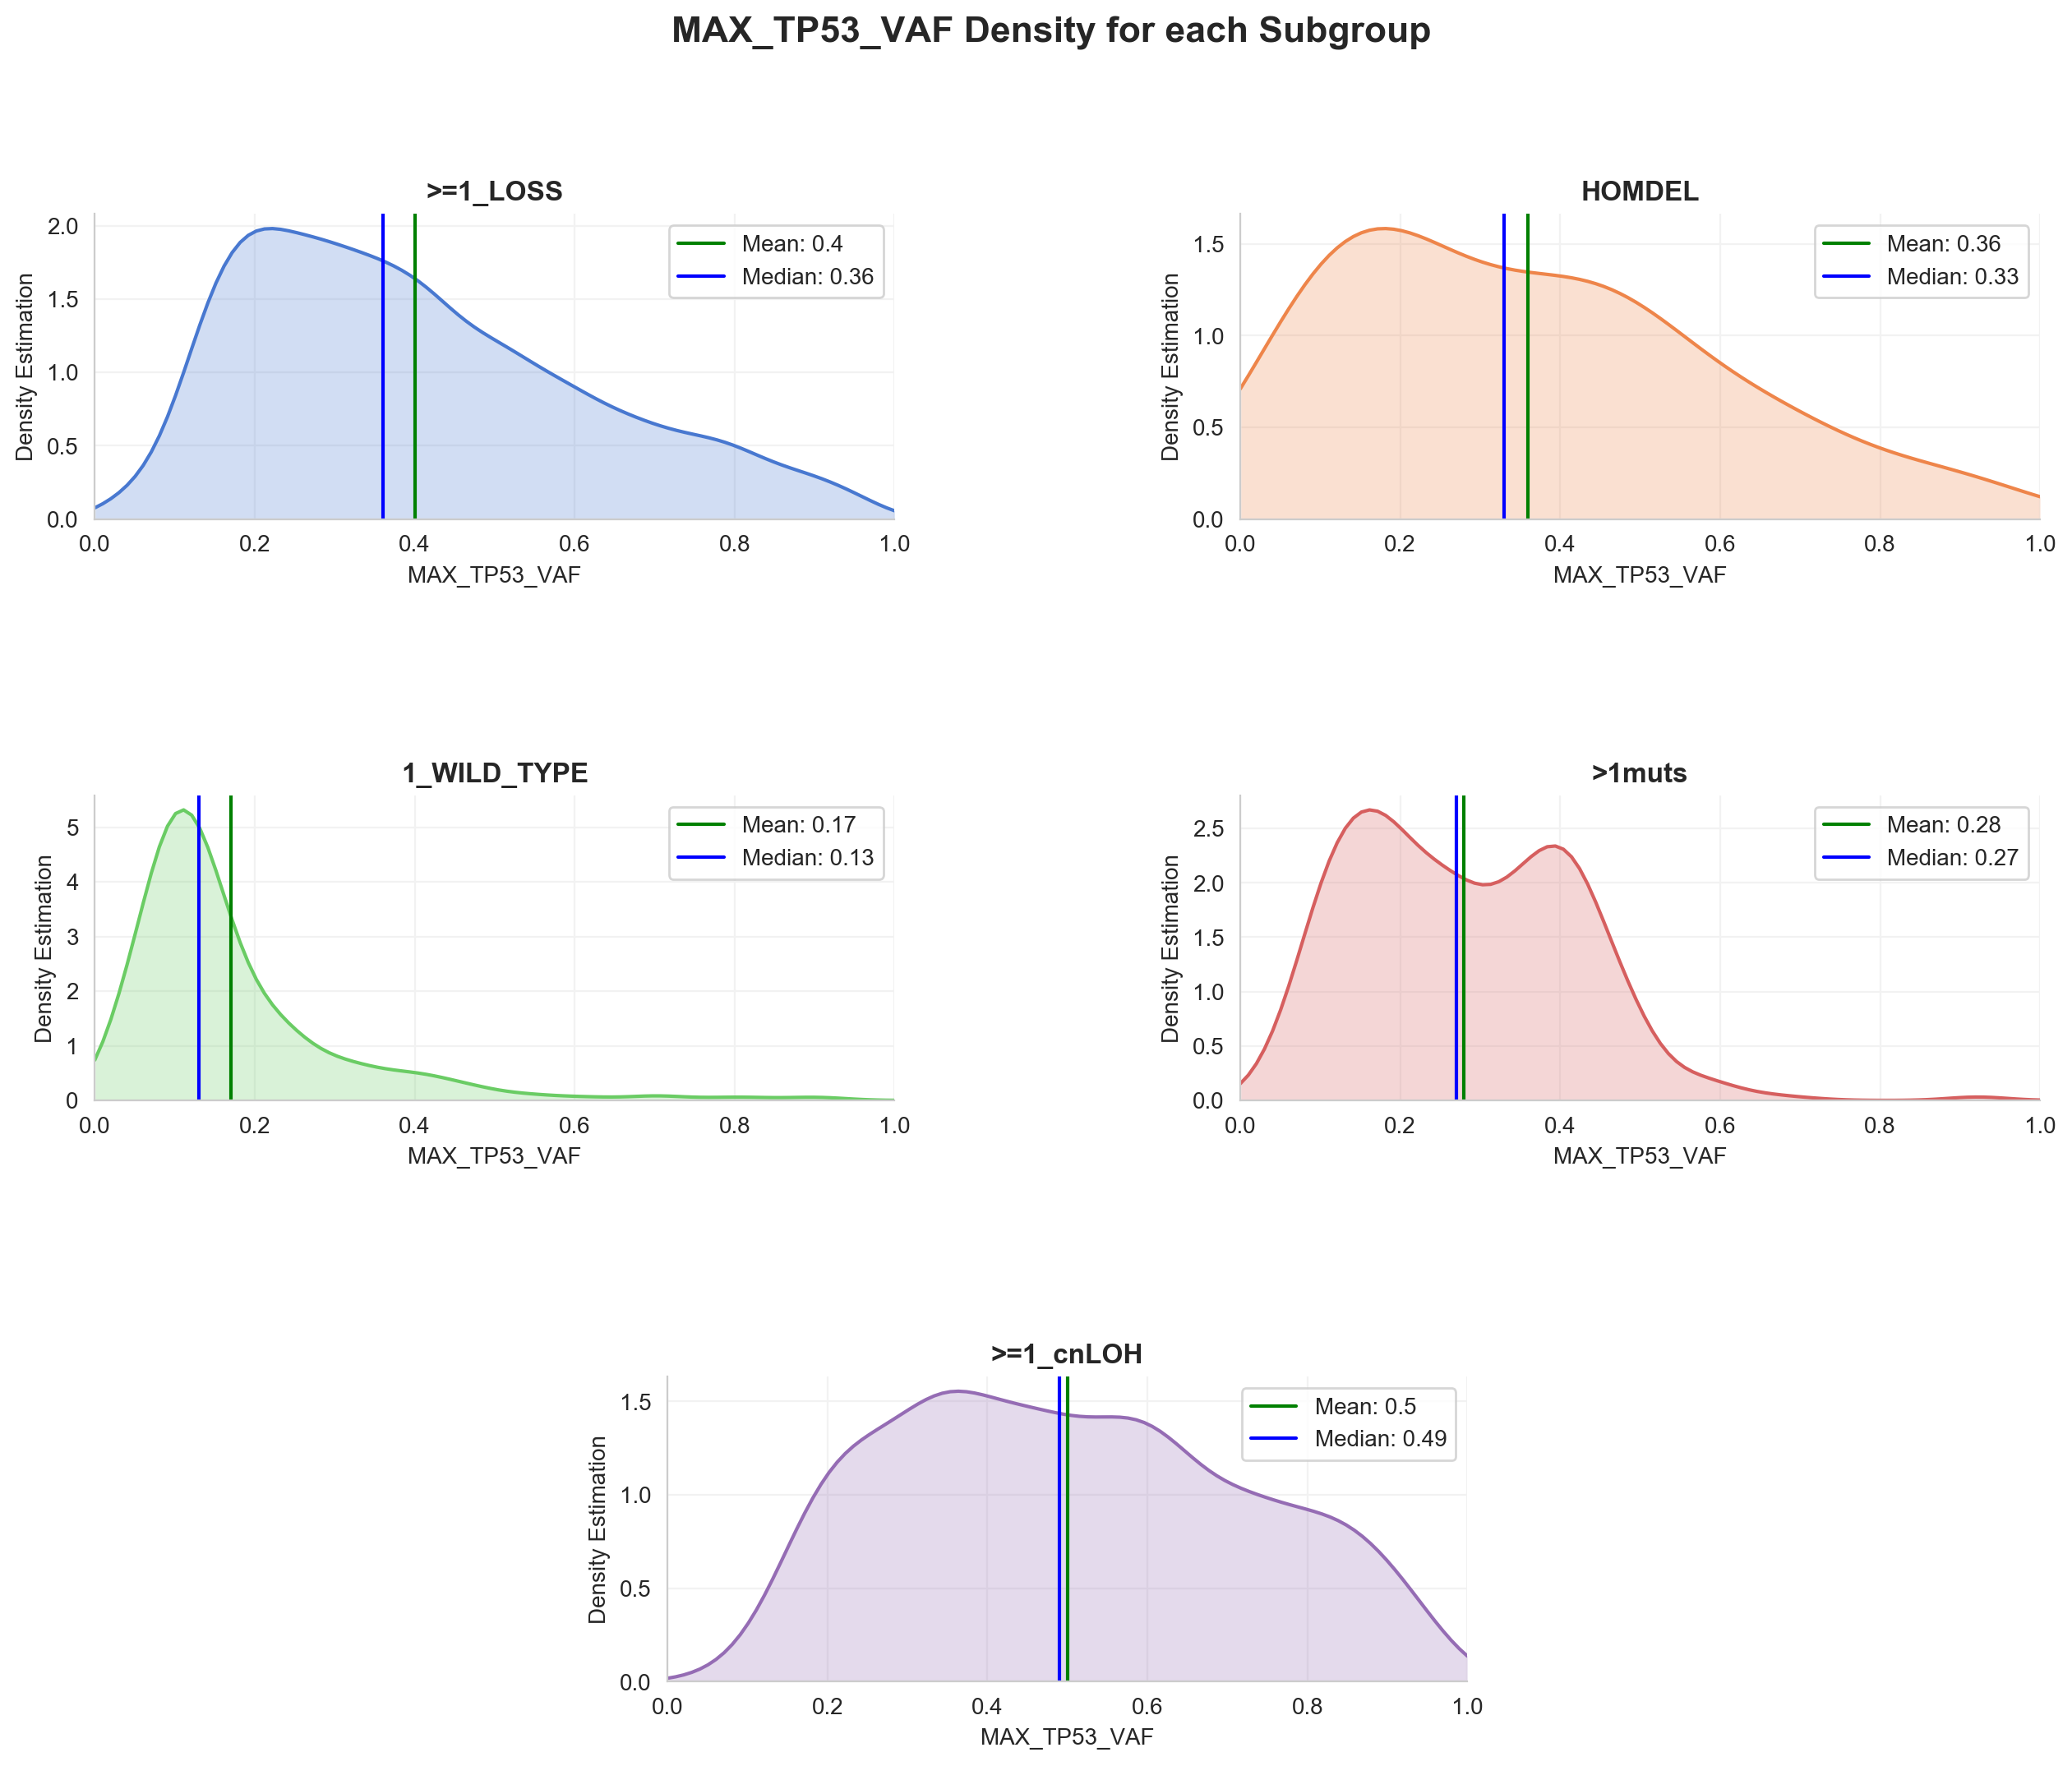

In [148]:
# MAX_VAF Density Comparison for all samples
get_densities(max_table_vaf, 'largest', fig_title='MAX_TP53_VAF Density for each Subgroup', xlabel='MAX_TP53_VAF', ylabel='Density Estimation',  number=5)

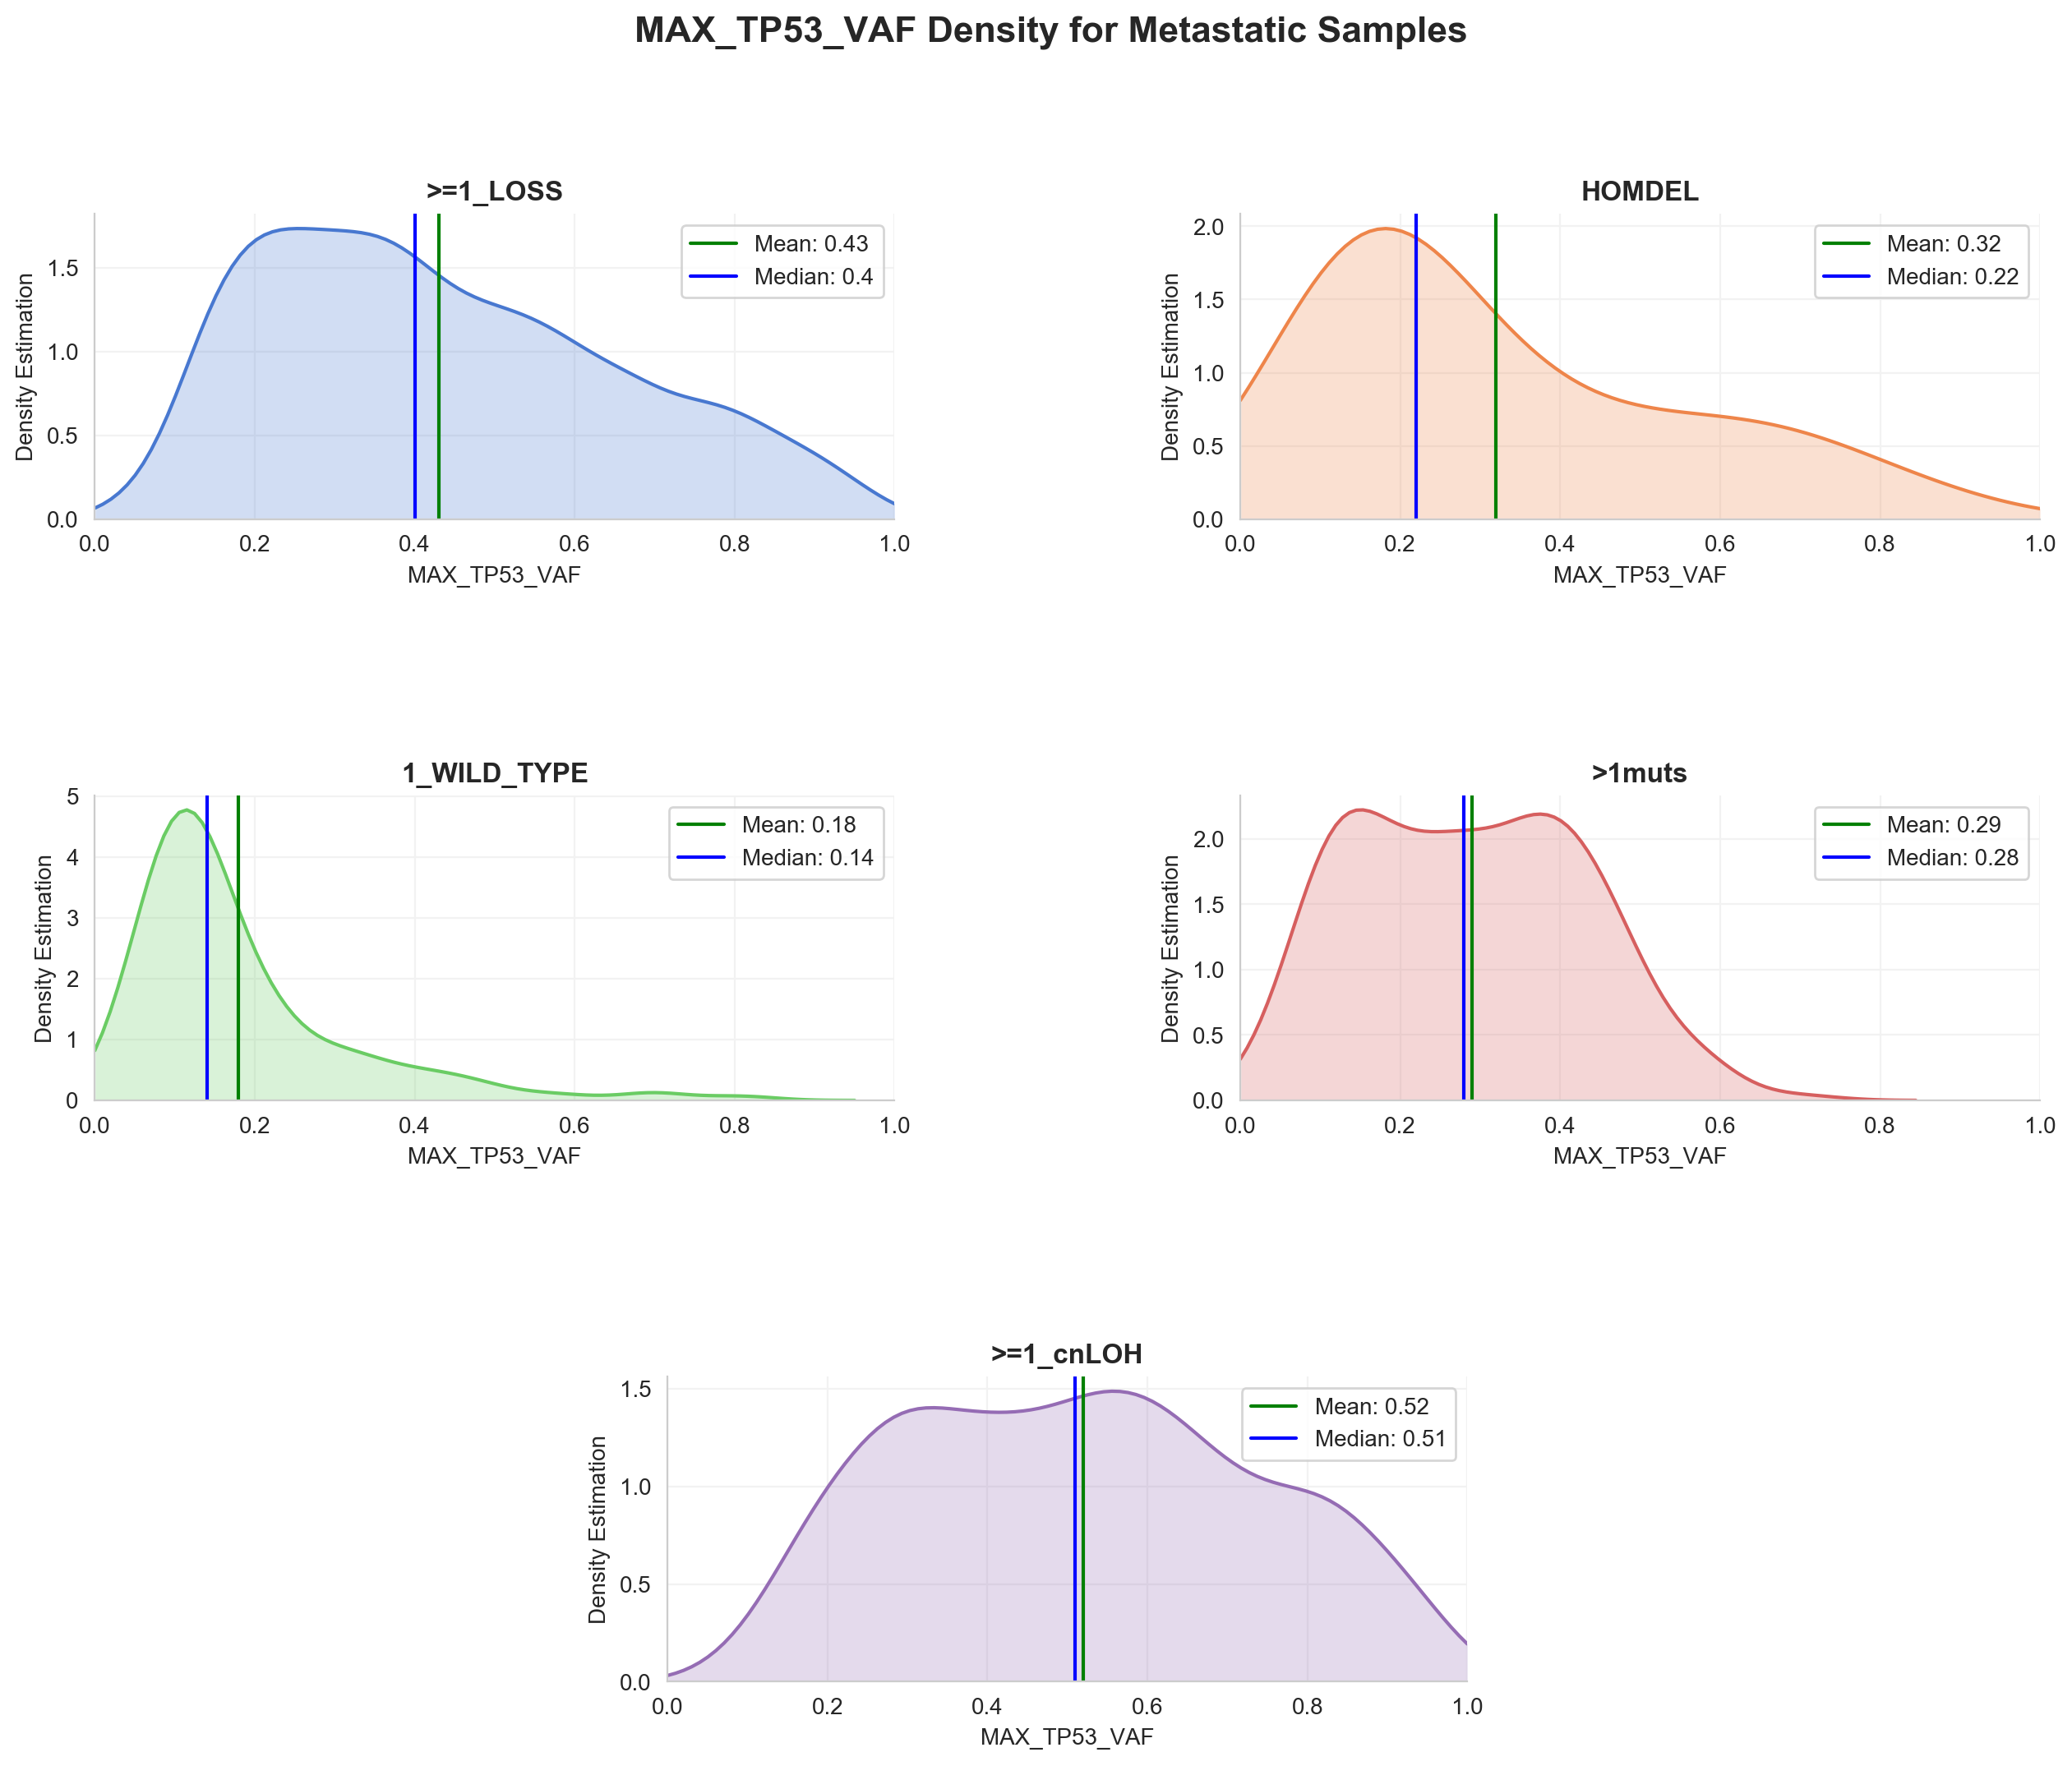

In [149]:
# MAX_VAF Density Comparison for Metastatic samples
get_densities(max_table_vaf, 'largest', fig_title='MAX_TP53_VAF Density for Metastatic Samples', xlabel='MAX_TP53_VAF', ylabel='Density Estimation',  number=5, met_prim='Metastasis')

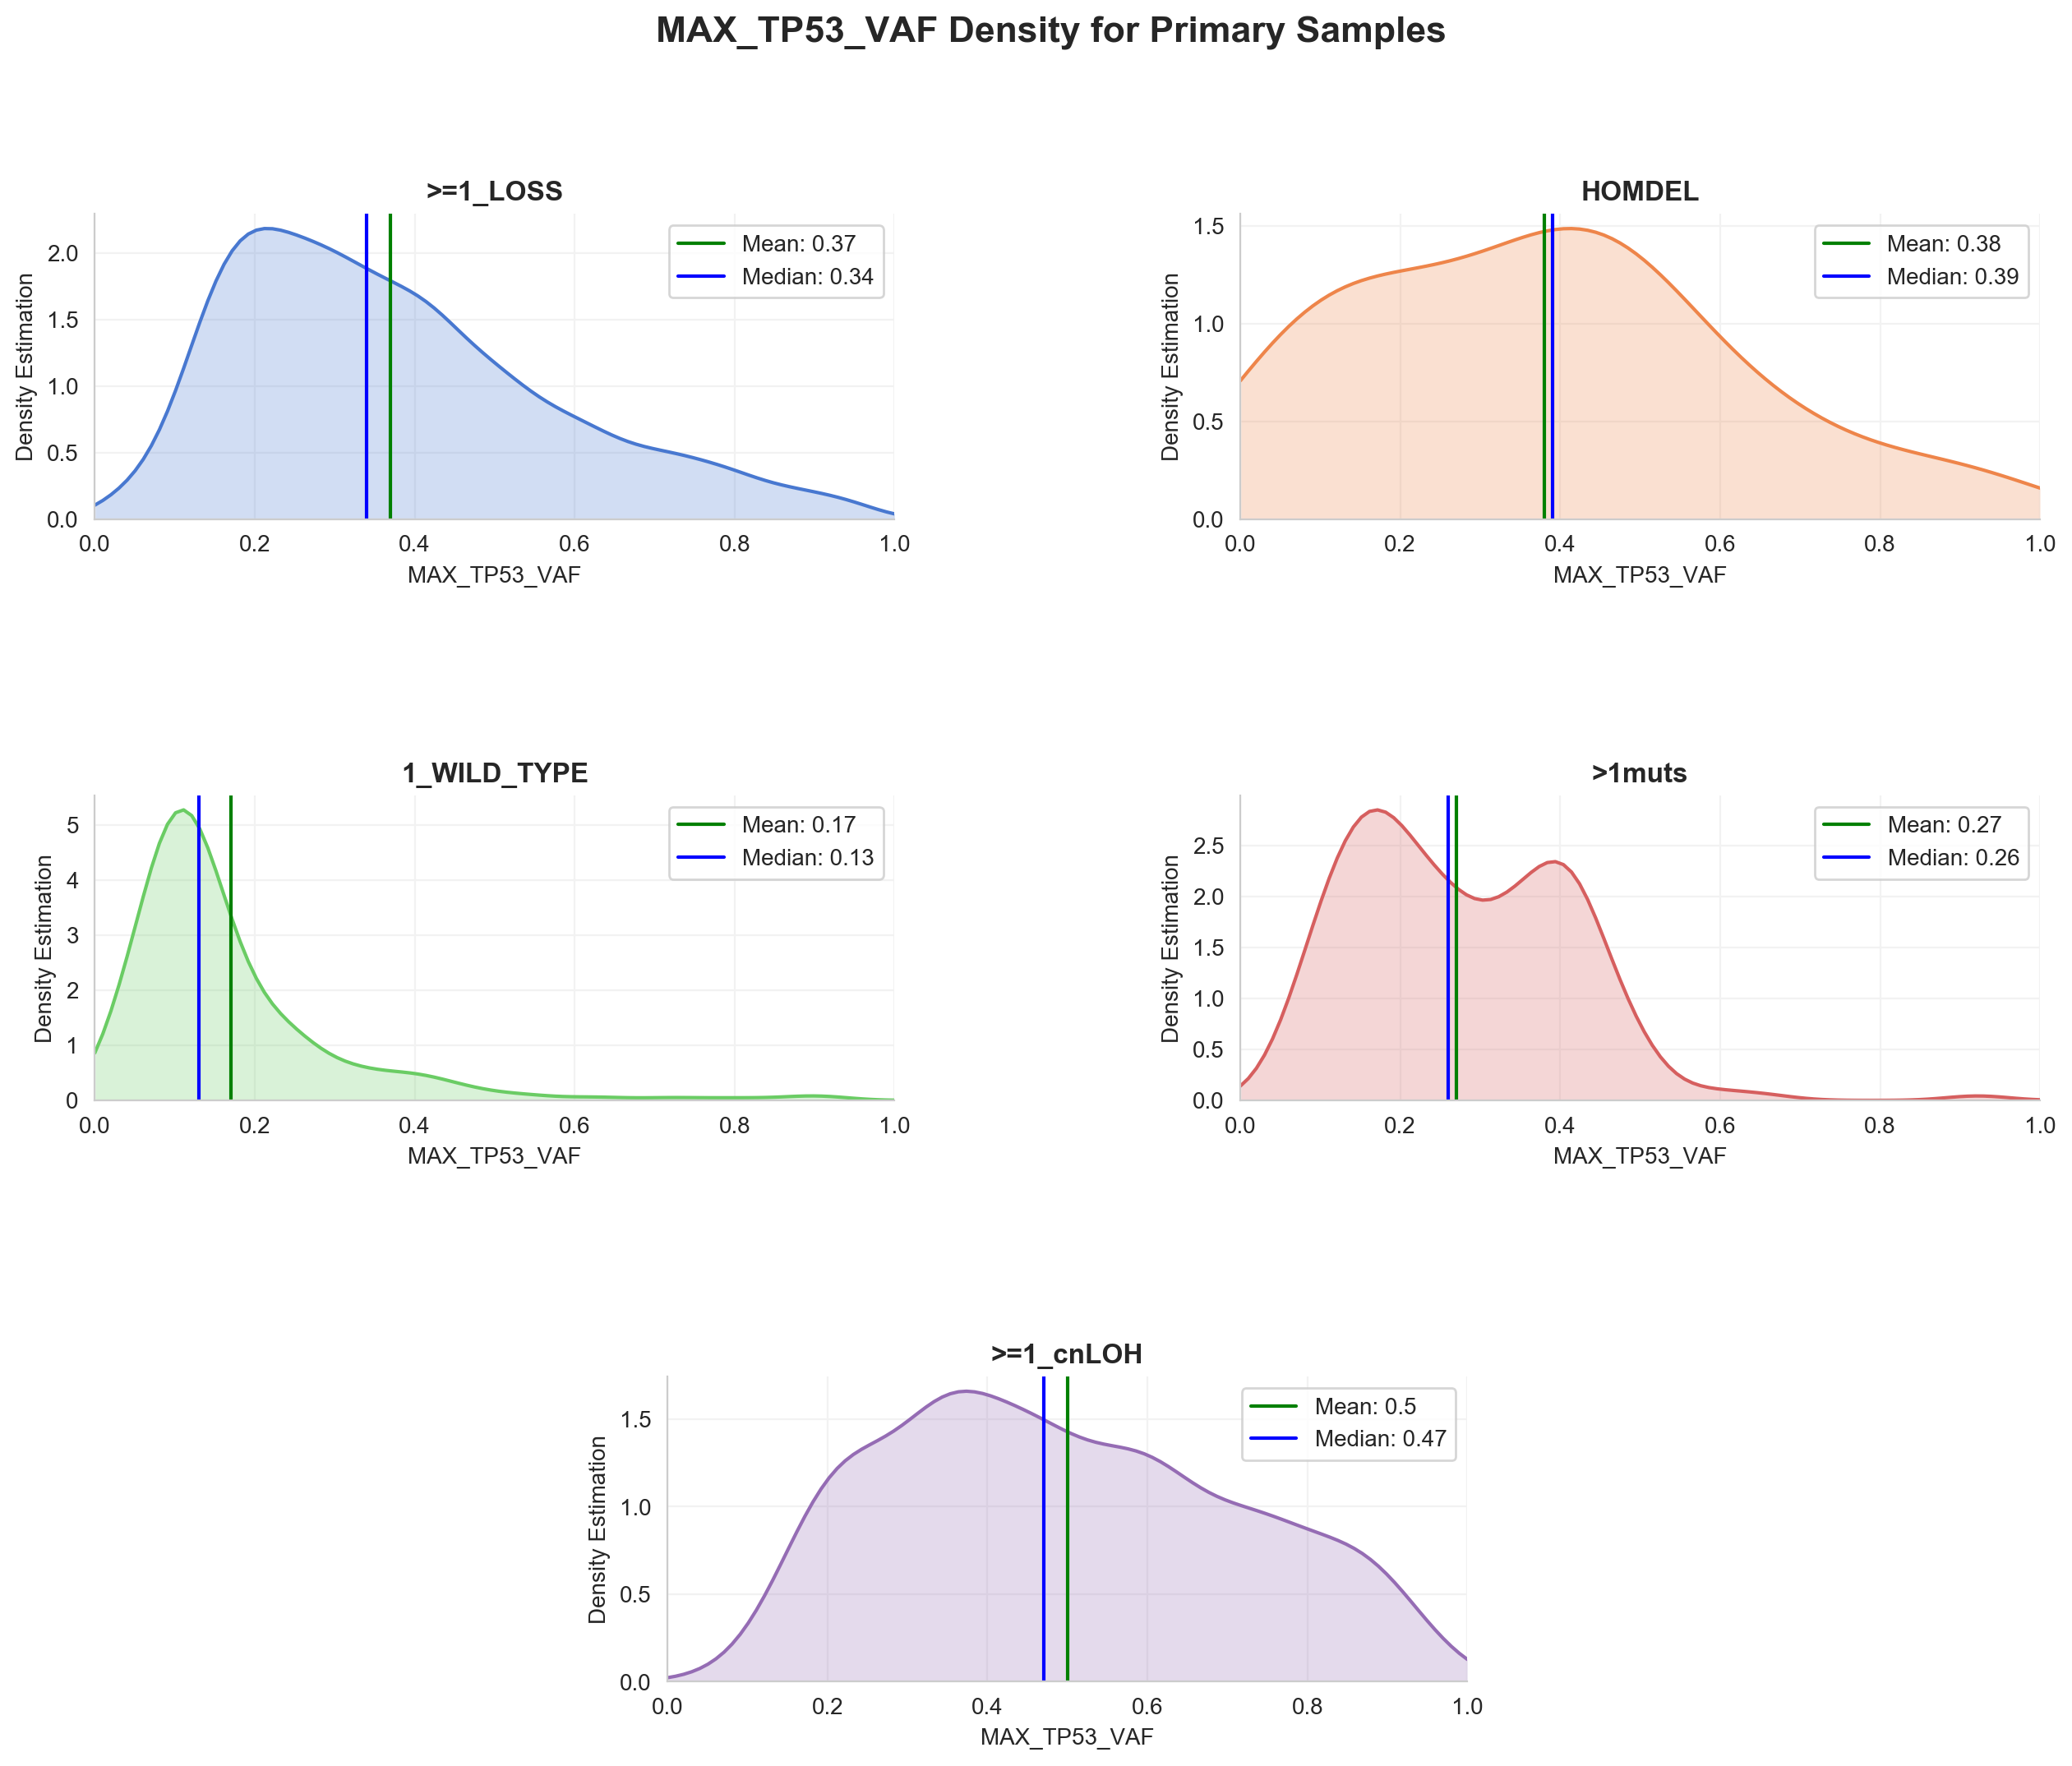

In [150]:
# MAX_VAF Density Comparison for Primary samples
get_densities(max_table_vaf, 'largest', fig_title='MAX_TP53_VAF Density for Primary Samples', xlabel='MAX_TP53_VAF', ylabel='Density Estimation',  number=5, met_prim='Primary')

---
# 1. Scatter Plots

In [ ]:
data_vaf = data[['vaf_1', 'vaf_2', 'vaf_3']]
max_table_vaf = pd.DataFrame(np.sort(data_vaf.fillna(0).values)[:,-2:], columns=['2nd-largest','largest'])
max_table_vaf = pd.concat([max_table_vaf, data.reset_index().cn_state], axis=1)
sns.scatterplot(x='largest', y='2nd-largest', data=max_table_vaf, hue='cn_state',hue_order=group, ax=ax1, palette="muted")
ax1.plot([0,1], [0,1], linewidth=0.5, color='grey')
ax1.set_ylabel('VAF_2')
ax1.set_xlabel('VAF_1')
ax1.set_title('VAF' + txt, weight = 'bold') 

In [189]:
def get_scatters(master:pd.DataFrame, metrics:str, fig_title:str, xlabel, ylabel,  number=6, met_prim:str = None, figsize=(15,12)):
    # We initialize the figure
    fig = def_fig_set(figsize=figsize,number = number)
    fig.tight_layout(pad=10, w_pad=0.5, h_pad=10)
    fig.suptitle(fig_title, fontsize=16, weight='bold')
    
    # We differentiate the groups if we have 
    if number==6: groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH', '0_HETLOSS']
    if number==5: groups = ['>=1_LOSS', 'HOMDEL', '1_WILD_TYPE', '>1muts', '>=1_cnLOH']
    if number==4: groups = ['>=1_LOSS', 'HOMDEL', '>1muts', '>=1_cnLOH']
        
    for ax, group,i in zip(fig.axes, groups, range(len(groups))):
        if i == 3 : i+=1
        if i == 2 : i+=1
        data = master[master['mut_cn_group'] == group][master['tp53_count'].isin([2,3,4,5])]
        if met_prim:
            data = data[data['Sample_Type'] == met_prim]
        
        data_metrics= data[[metrics+'_1', metrics+'_2',metrics+'_3',metrics+'_4',metrics+'_5']]
        max_table_metrics = pd.DataFrame(np.sort(data_metrics.fillna(0).values)[:,-2:], columns=['2nd-largest','largest'])
        max_table_metrics = pd.concat([max_table_metrics, data.reset_index().cn_state], axis=1)
        sns.scatterplot(x='largest', y='2nd-largest', data=max_table_metrics, ax=ax, color=my_colors[i])
        ax.plot([0,1], [0,1], linewidth=0.5, color='grey')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
            
        ax.set_title(group, weight = 'bold')

### VAF1 / VAF2

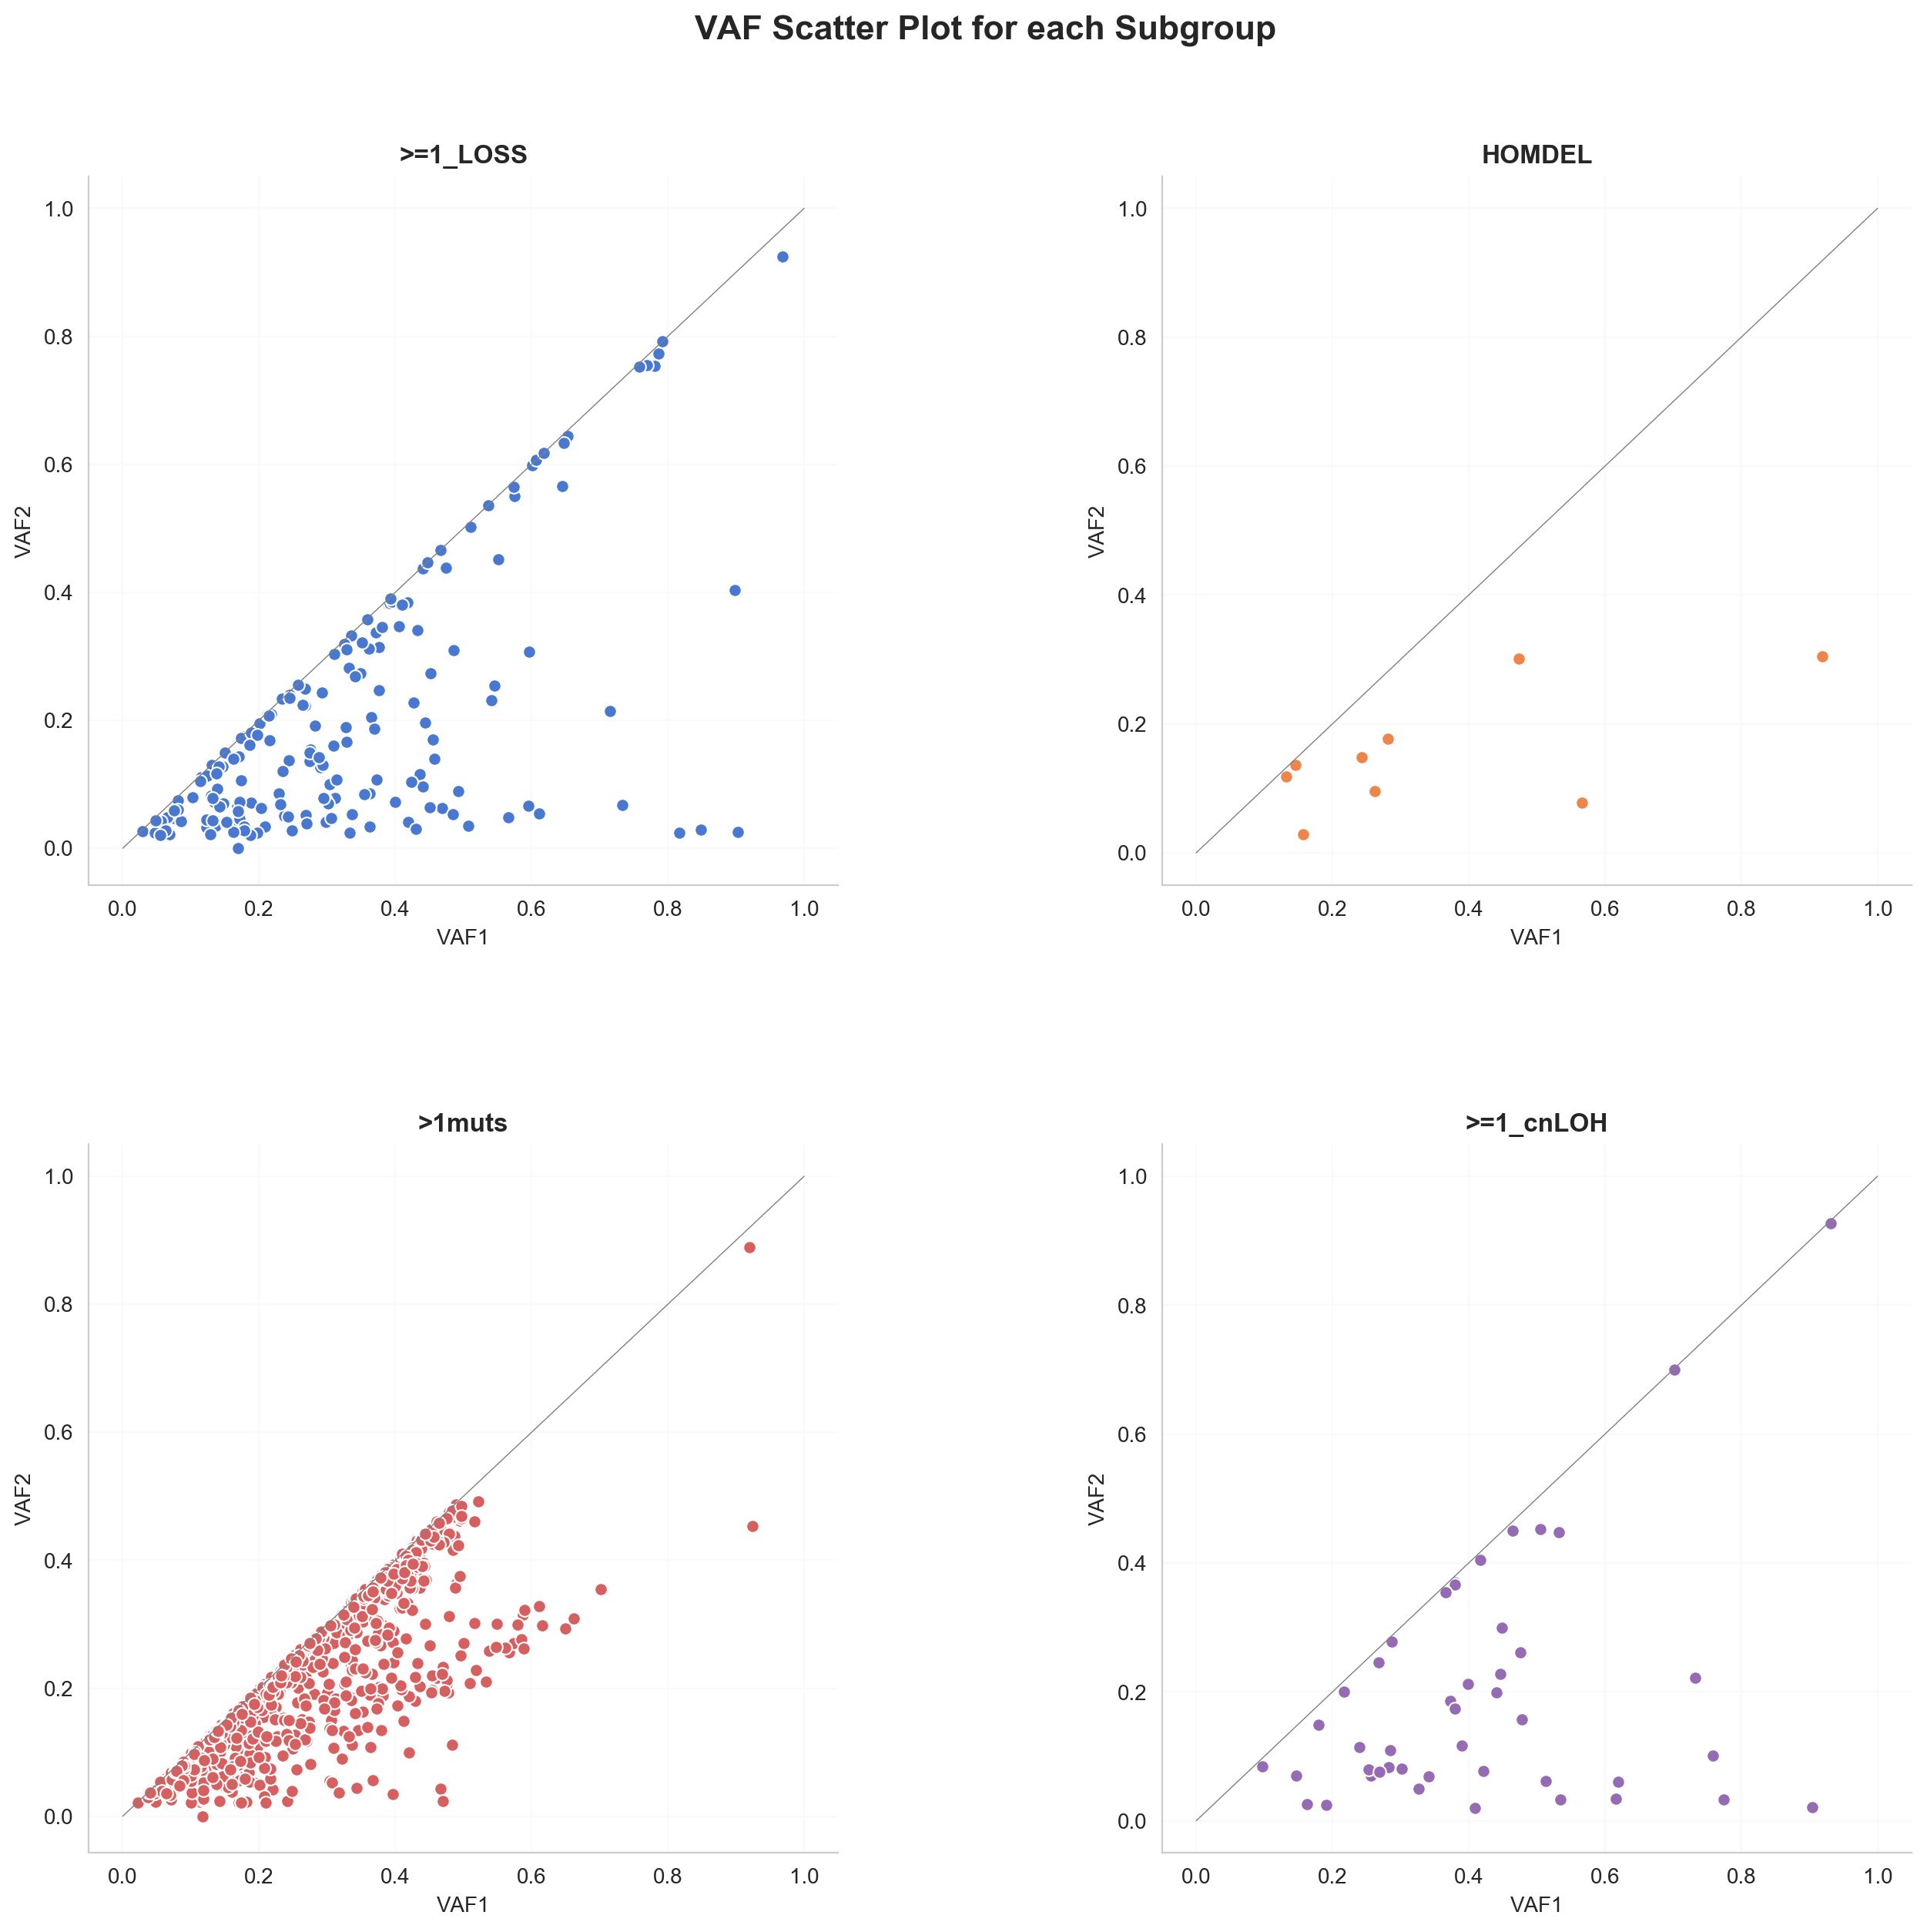

In [190]:
# VAF Plot for all Samples
get_scatters(master, metrics='vaf', fig_title='VAF Scatter Plot for each Subgroup', xlabel='VAF1', ylabel='VAF2',  number=4 ,figsize=(15,20), met_prim = None)

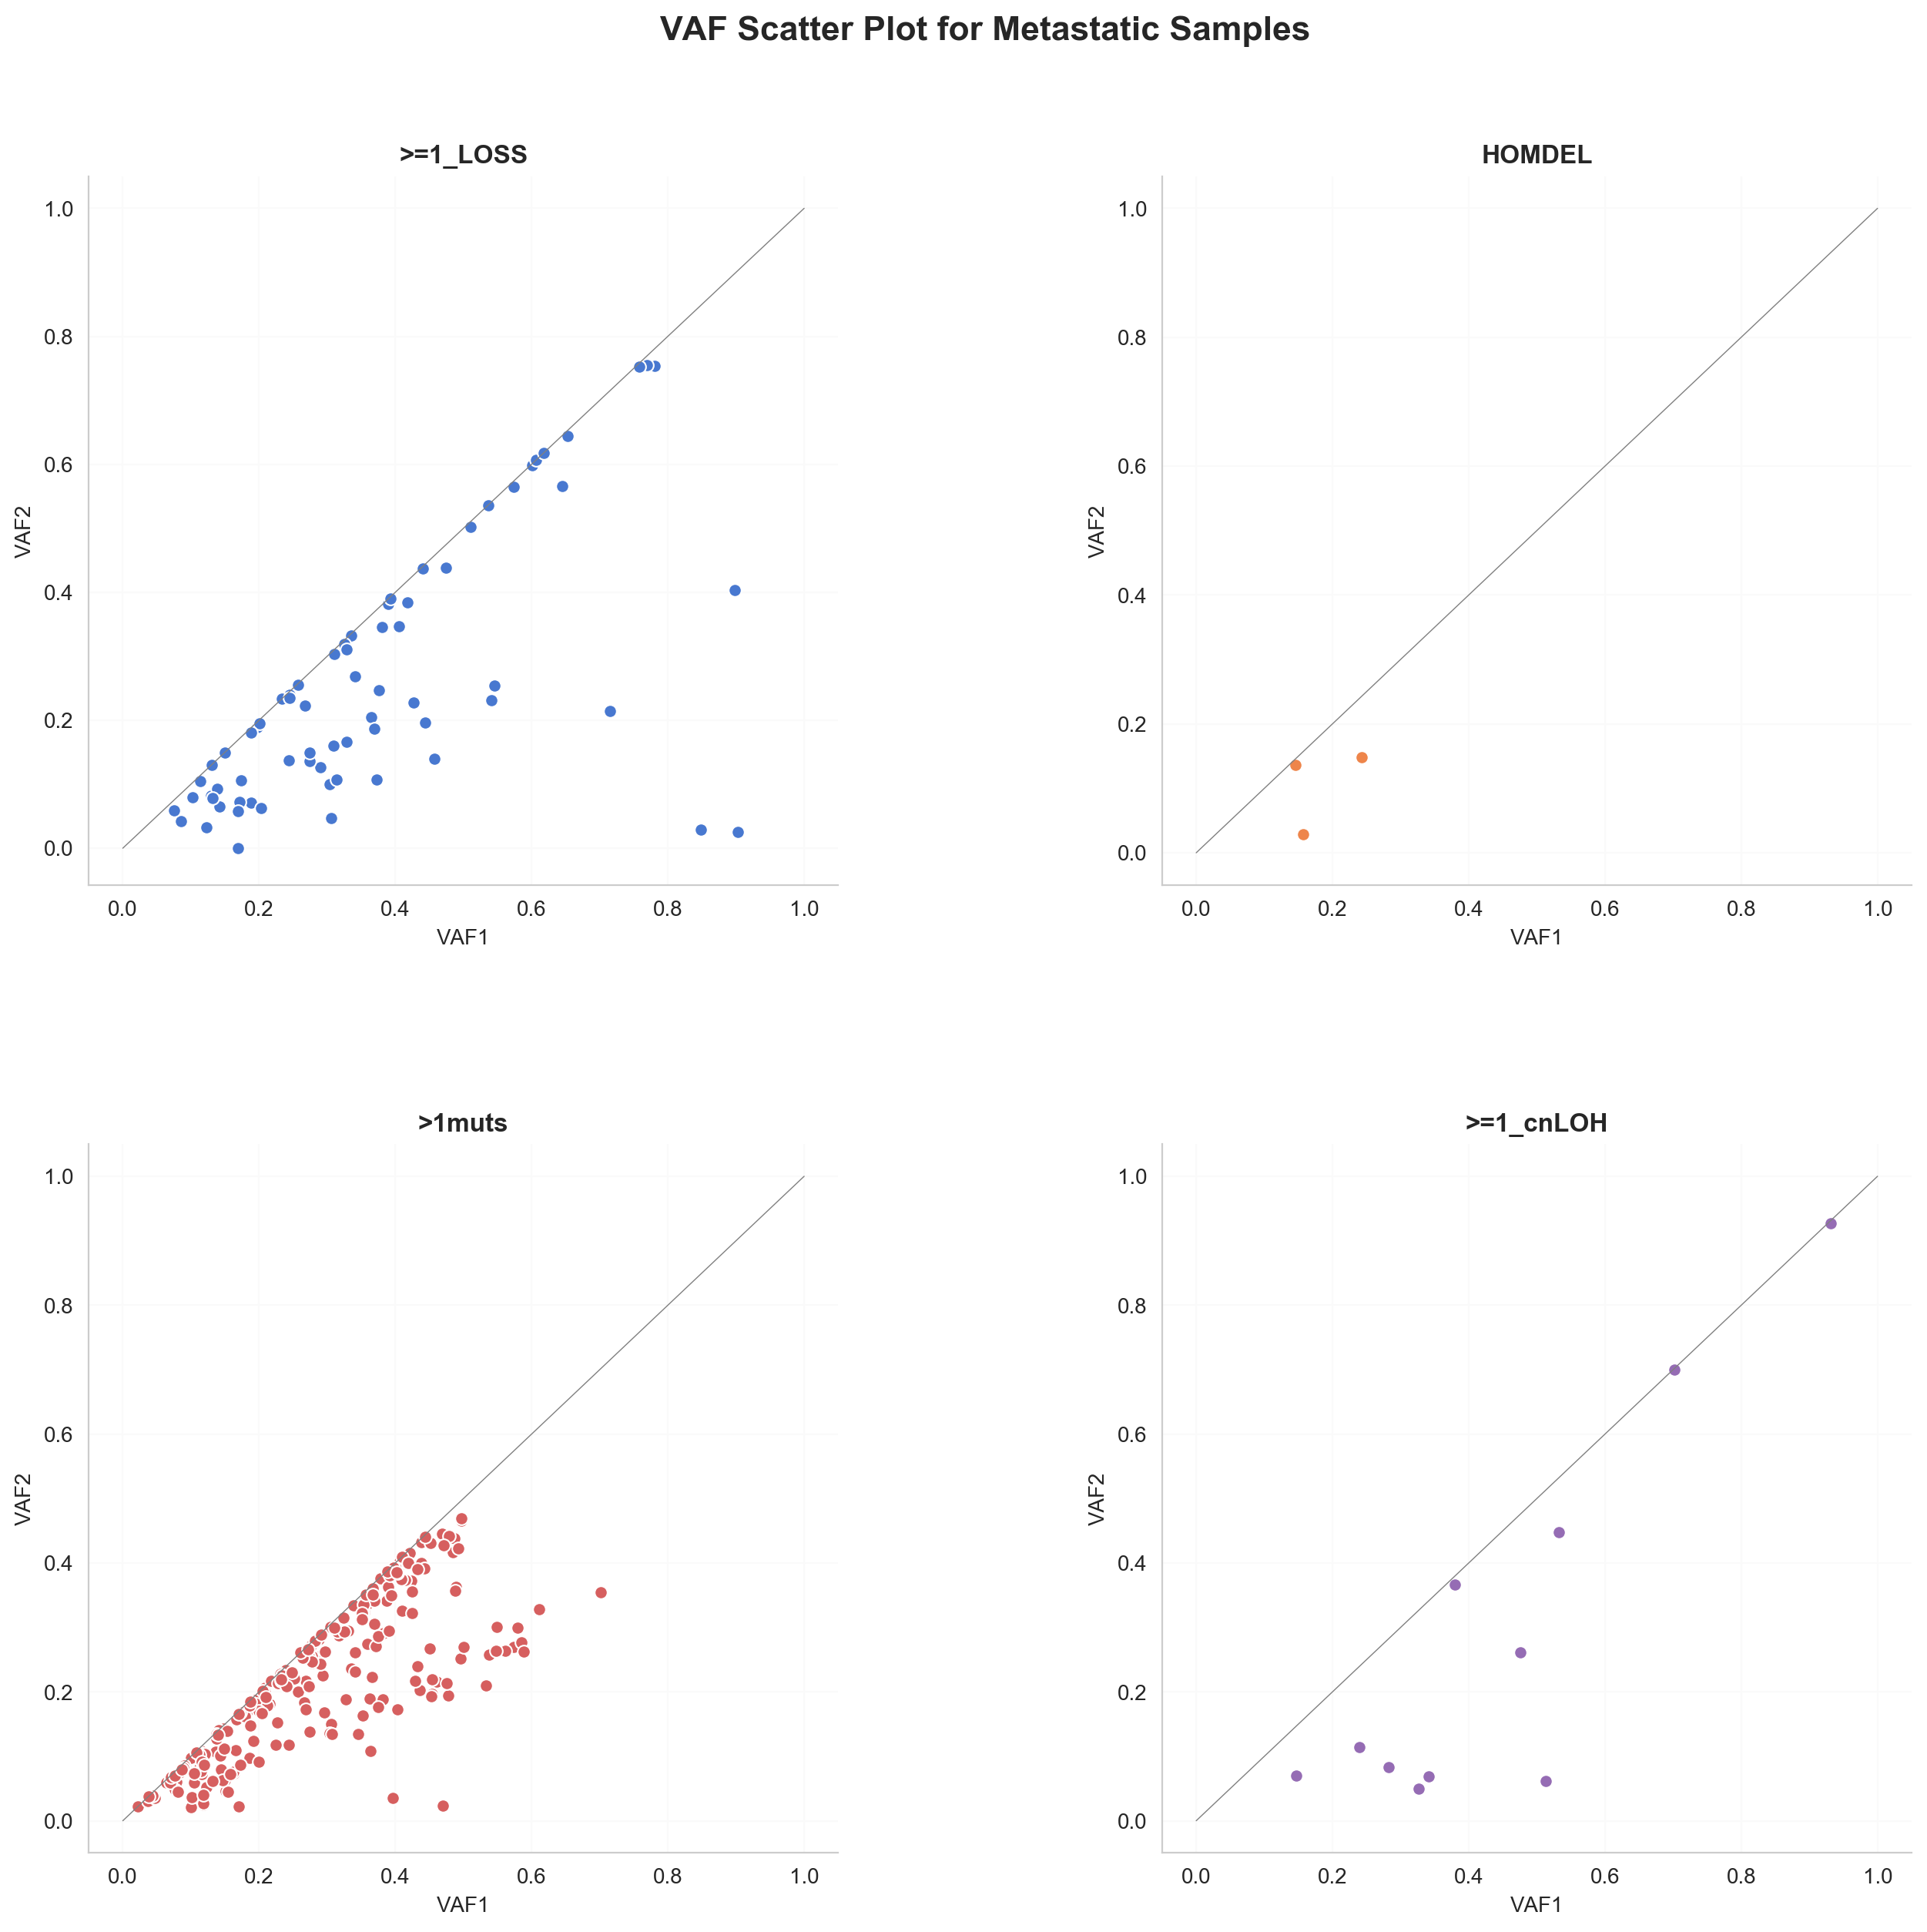

In [191]:
# VAF Plot for Metastatic Samples
get_scatters(master, metrics='vaf', fig_title='VAF Scatter Plot for Metastatic Samples', xlabel='VAF1', ylabel='VAF2',  number=4 ,figsize=(15,20), met_prim = 'Metastasis')

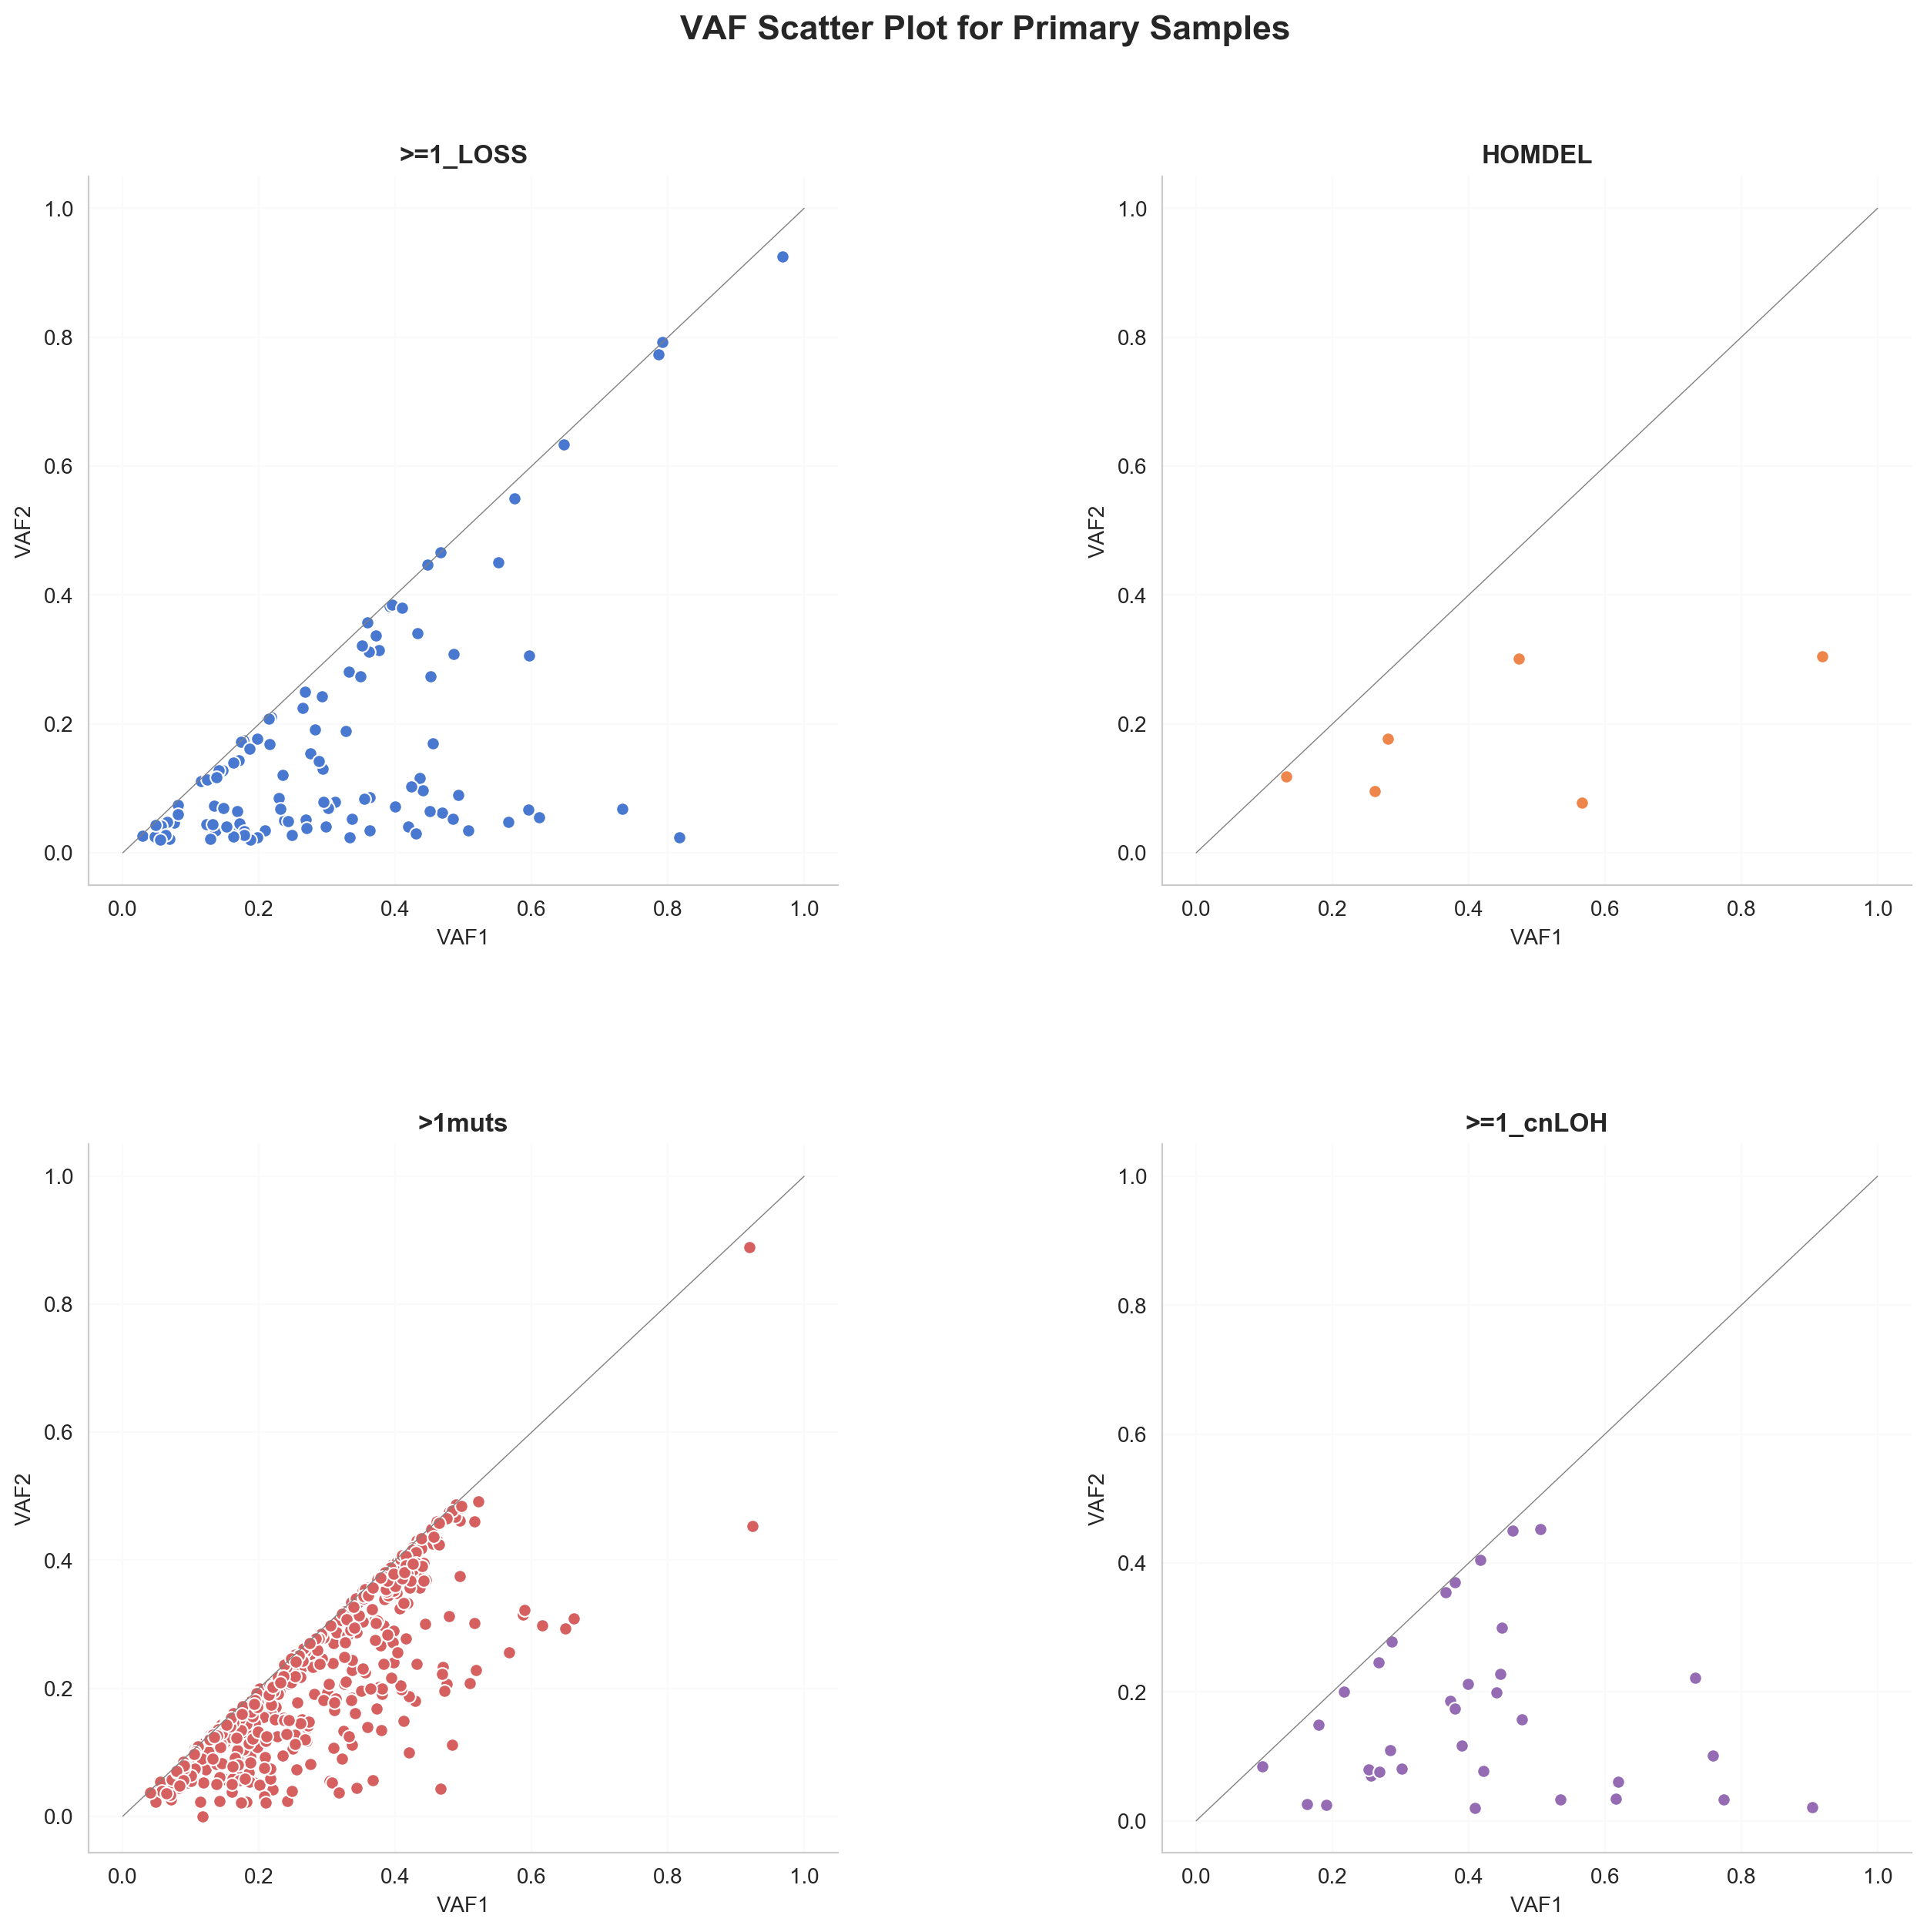

In [192]:
# VAF Plot for Primary Samples
get_scatters(master, metrics='vaf', fig_title='VAF Scatter Plot for Primary Samples', xlabel='VAF1', ylabel='VAF2',  number=4 ,figsize=(15,20), met_prim = 'Primary')

### CCF1 / CCF2

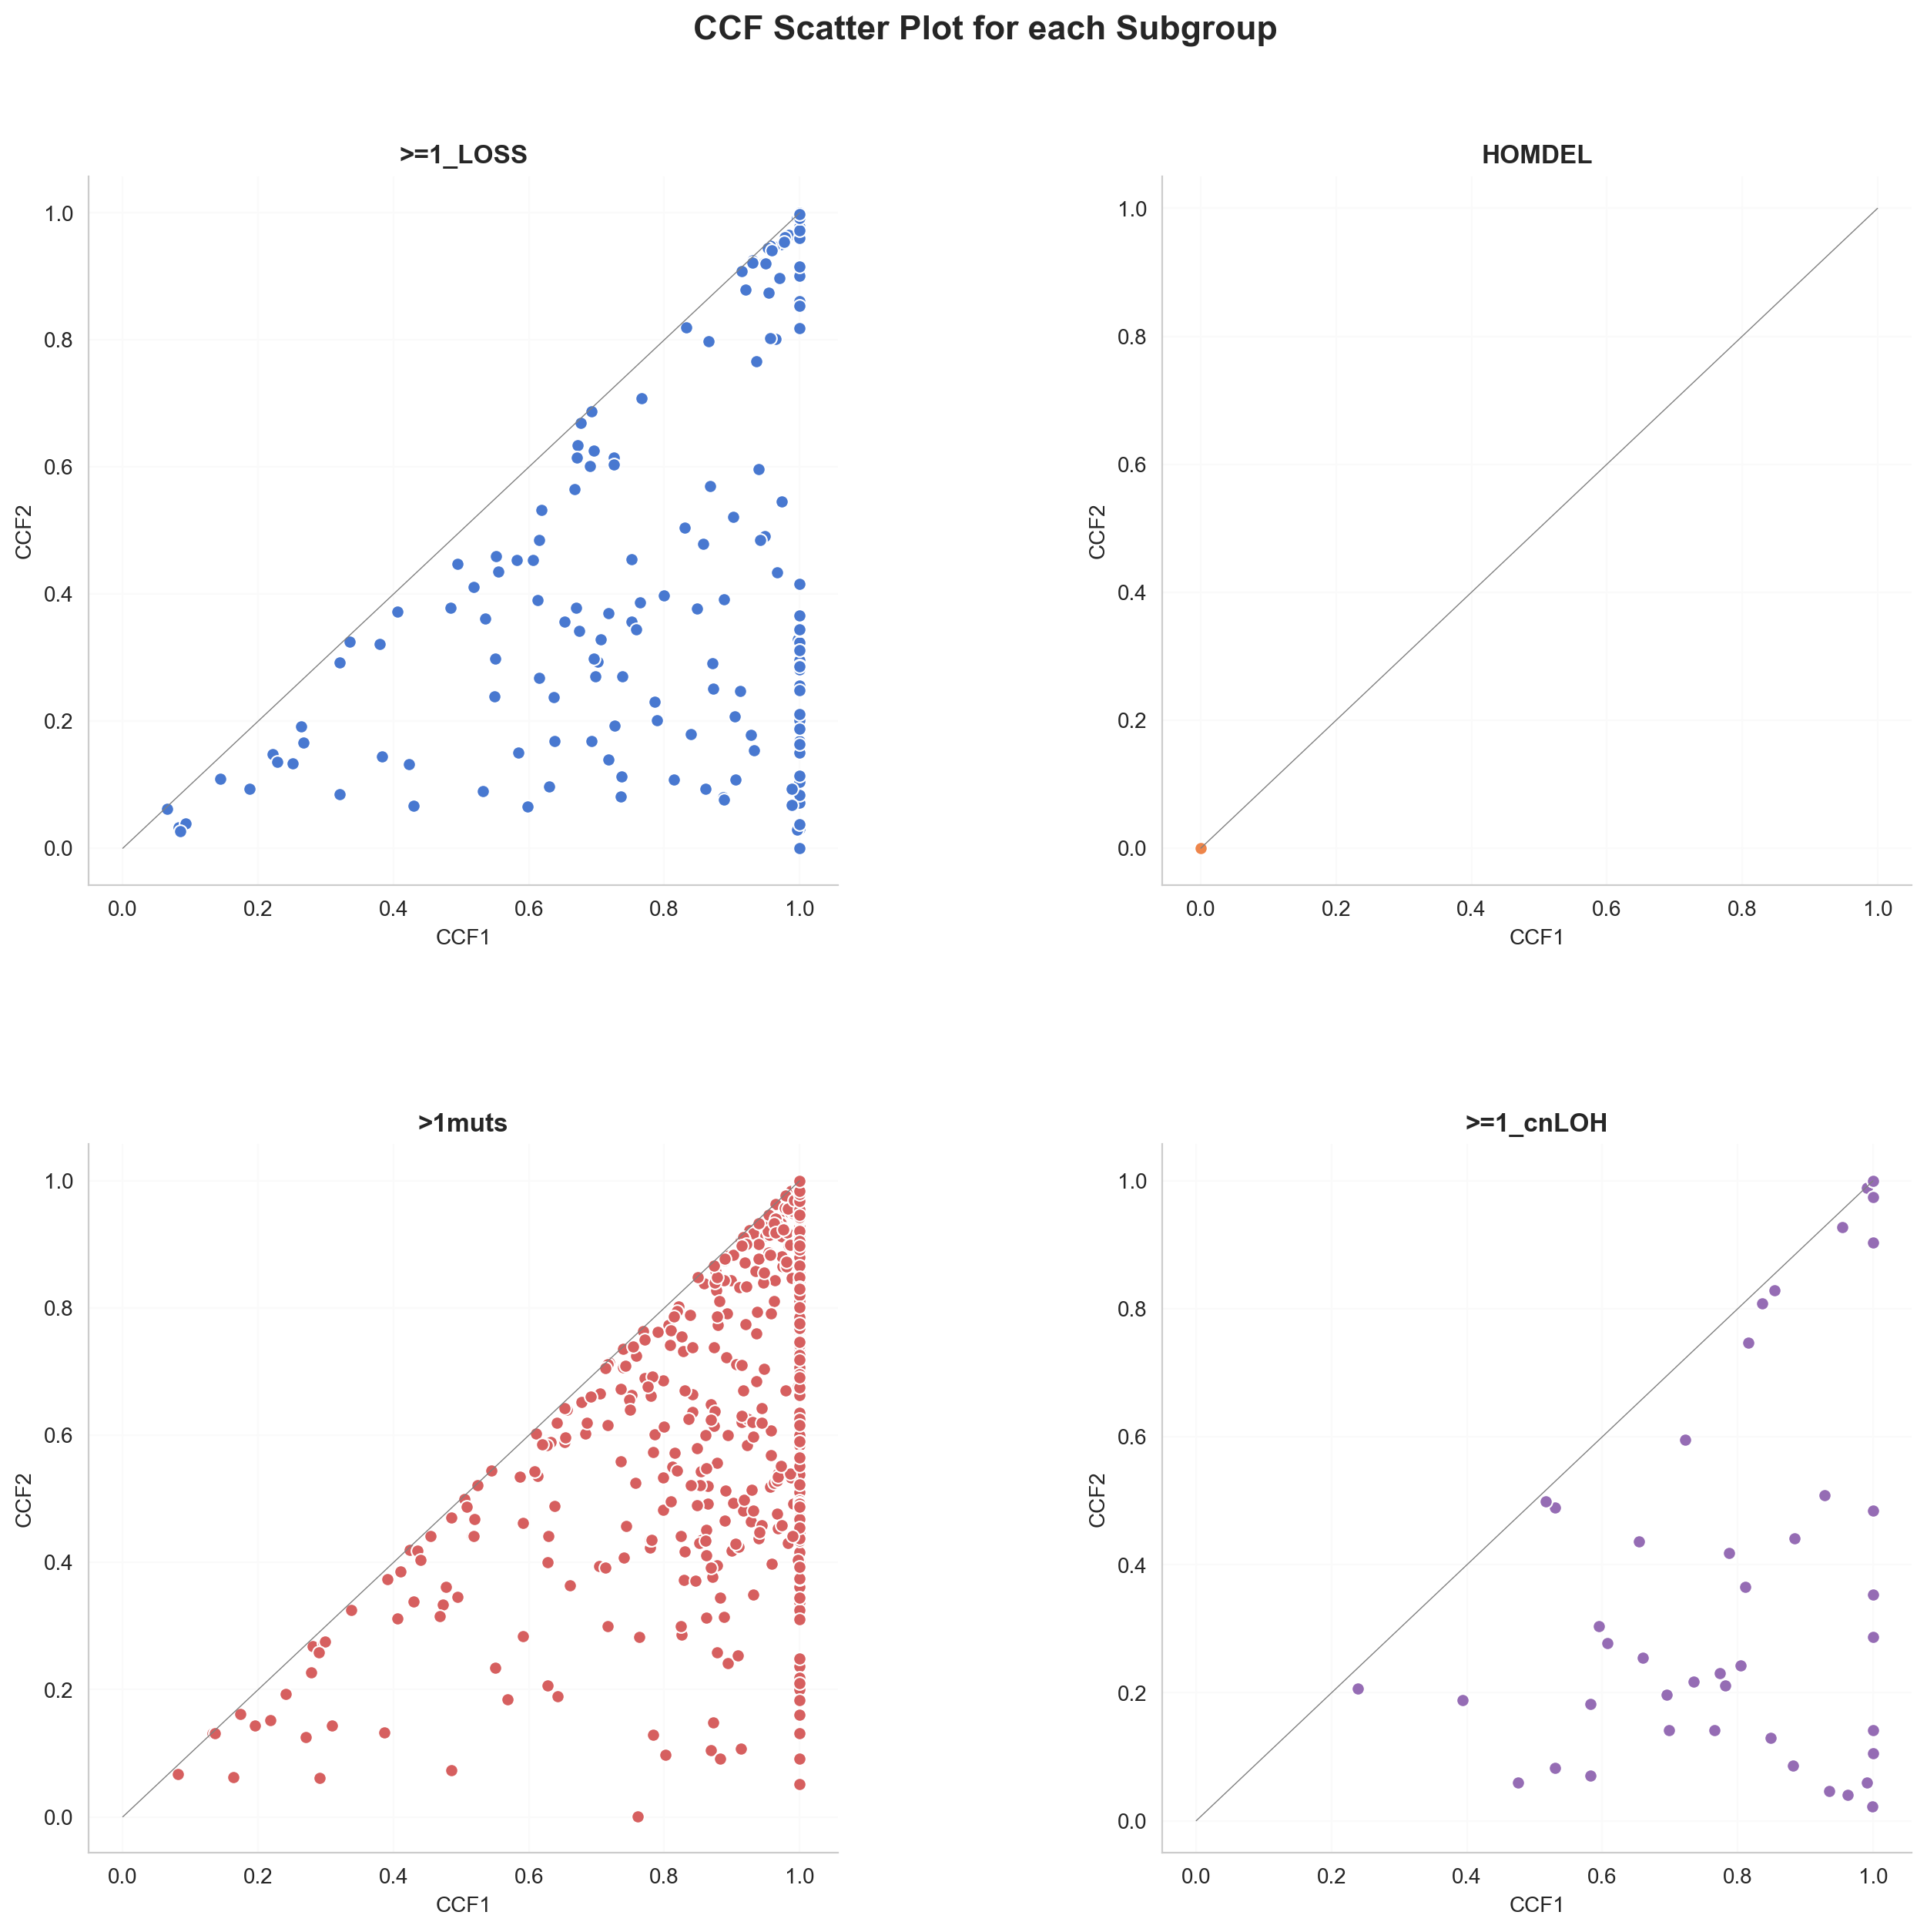

In [193]:
# CCF Plot for all Samples
get_scatters(master, metrics='ccf', fig_title='CCF Scatter Plot for each Subgroup', xlabel='CCF1', ylabel='CCF2',  number=4 ,figsize=(15,20), met_prim = None)

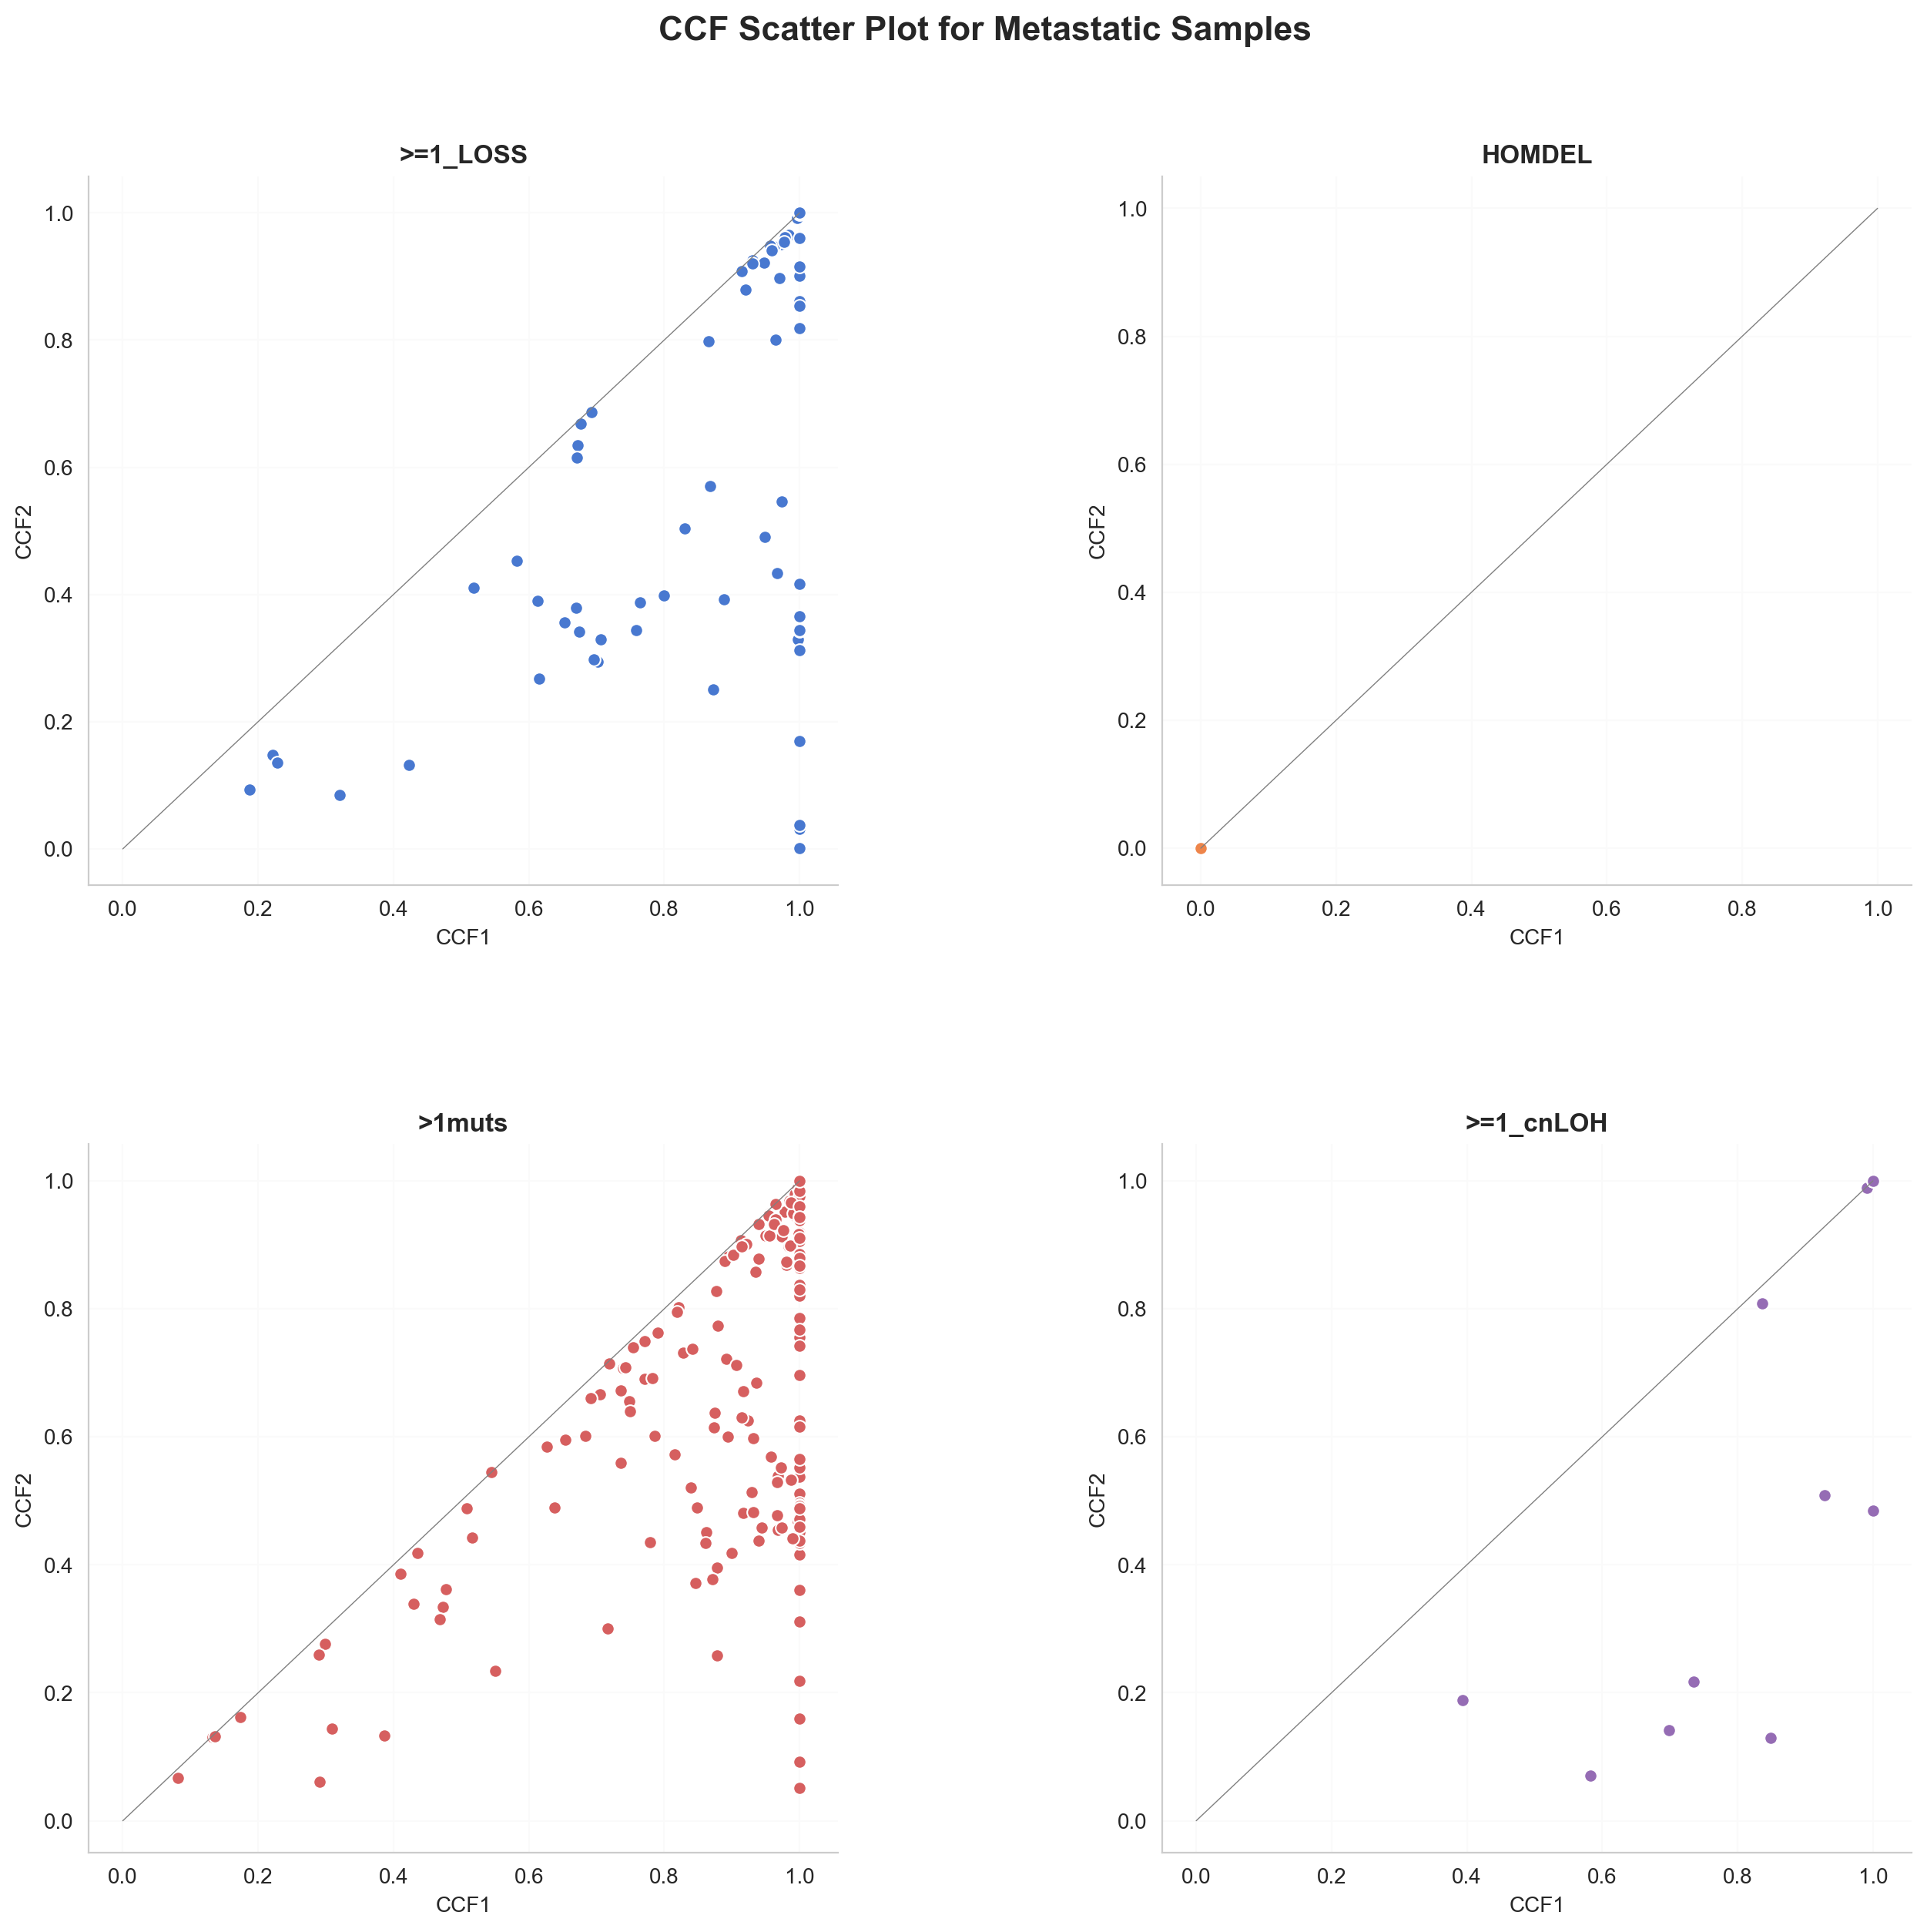

In [194]:
# CCF Plot for Metastatic Samples
get_scatters(master, metrics='ccf', fig_title='CCF Scatter Plot for Metastatic Samples', xlabel='CCF1', ylabel='CCF2',  number=4 ,figsize=(15,20), met_prim = 'Metastasis')

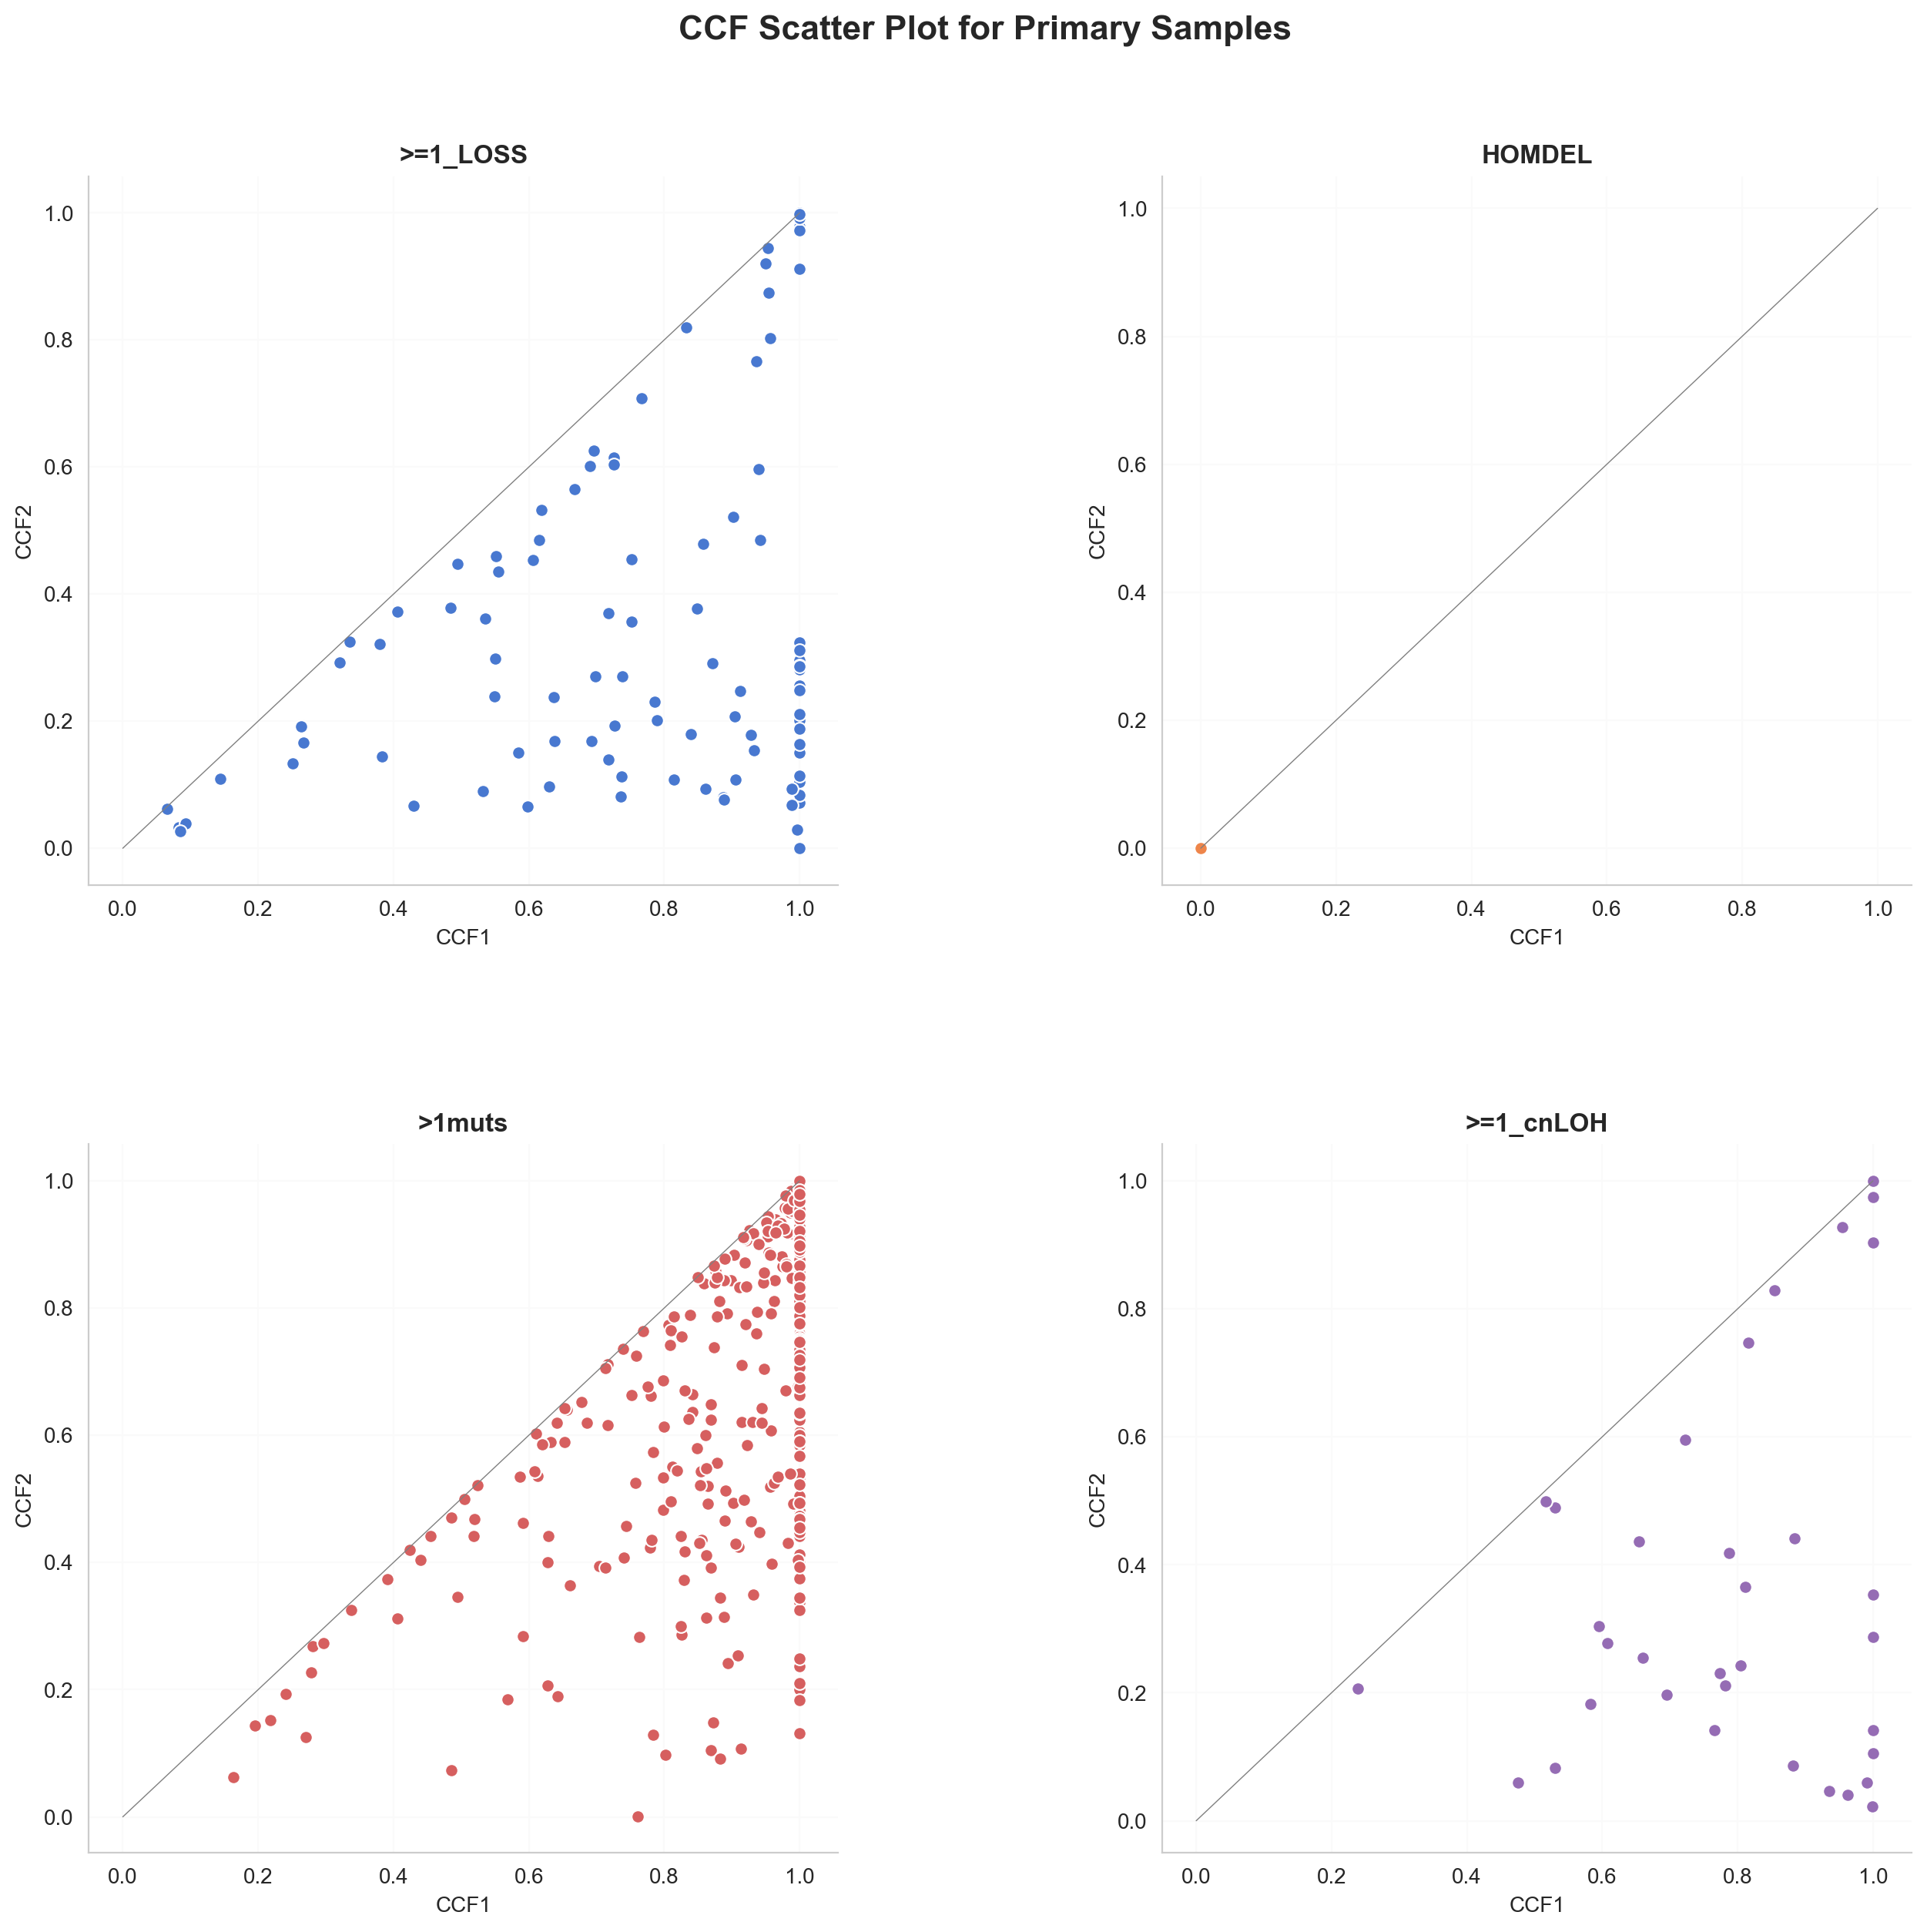

In [195]:
# CCF Plot for Primary Samples
get_scatters(master, metrics='ccf', fig_title='CCF Scatter Plot for Primary Samples', xlabel='CCF1', ylabel='CCF2',  number=4 ,figsize=(15,20), met_prim = 'Primary')

# 4. Survival Analysis

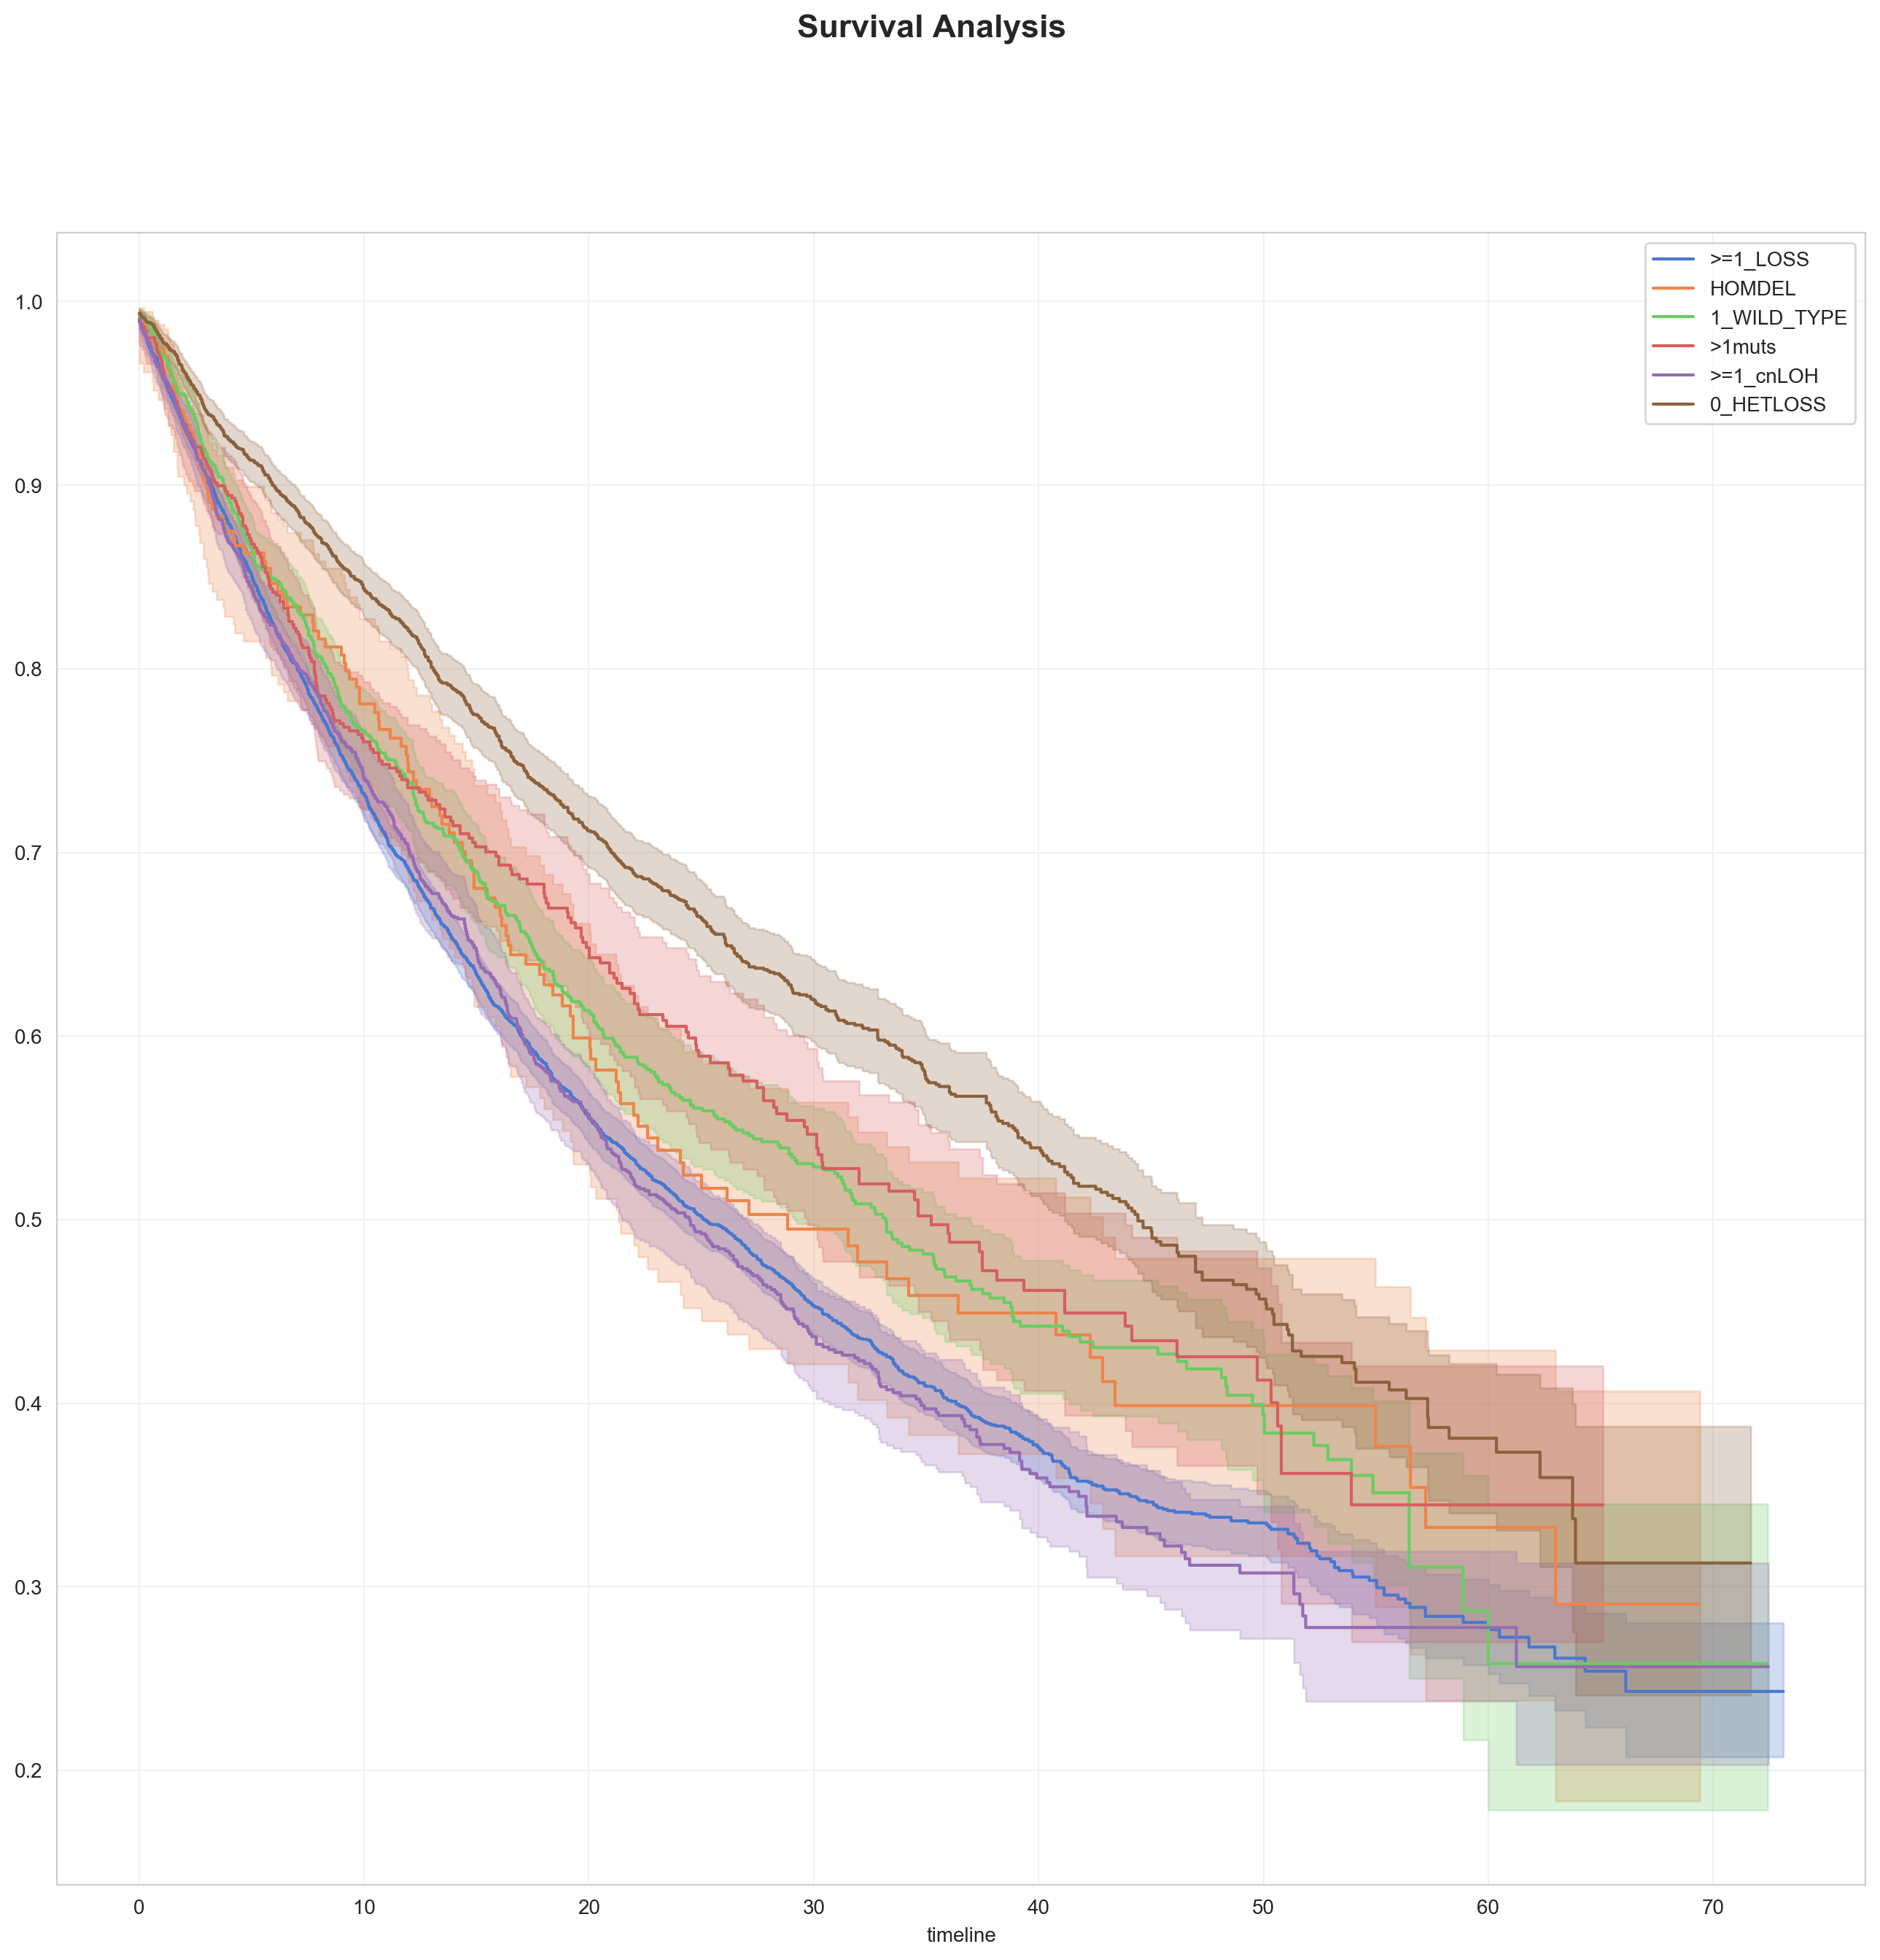

In [224]:
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
fig.suptitle('Survival Analysis', fontsize=16, weight='bold')
kmf = KaplanMeierFitter()

for group,i in zip(subgroups, range(len(subgroups))):
    data = master[master['mut_cn_group'] == group].dropna(subset=['Overall Survival (Months)', 'Overall Survival Status'])
    data['Overall Survival Status 0/1'] = data.apply(lambda x: 1 if x['Overall Survival Status'] == 'DECEASED' else 0, axis=1)
    kmf.fit(np.array(data['Overall Survival (Months)']), event_observed=np.array(data['Overall Survival Status 0/1']),  label= group)
    kmf.plot_survival_function(color = my_colors[i], ax=ax)
plt.show()